In [ ]:
## For colab usage
from google.colab import drive
drive.mount('/content/drive')

%cd drive/My Drive/Colab Notebooks/project

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/project


## Data cleaning and formatting

In [ ]:
import pandas as pd
import datetime
data = pd.read_csv('export.csv')
data.head()

<ipython-input-2-e6791f0507e5>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('export.csv')


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4


In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 user_id                 0
age                309226
sex                132135
country            297985
checkin_date            0
trackable_id            0
trackable_type          0
trackable_name          4
trackable_value    926884
dtype: int64


Due the richness of the dataset, I removed the missing values in `age`, `sex`, and `country`, and replace the missing value in `trackable_name` as `unknown`. Also because there seems to have some mistype `age`, so I focus on the `age` between 18 to 60 years old.

In [ ]:
data_cleaned = data.dropna(subset=['age','sex' ,'country'])
#data_cleaned['trackable_name'].fillna('unknown', inplace=True)
data_cleaned['trackable_name'] = data_cleaned['trackable_name'].fillna('unknown')
#print("Shape of the cleaned data:", data_cleaned.shape)
missing_after_replacement = data_cleaned['trackable_name'].isnull().sum()
#print("Missing values in 'trackable_name' after replacement:", missing_after_replacement)

data_filtered = data_cleaned[(data_cleaned['age'] >= 18) & (data_cleaned['age'] <= 60)]
print("Shape of the cleaned data:", data_filtered.shape)

<ipython-input-4-2bc0a5093a33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['trackable_name'] = data_cleaned['trackable_name'].fillna('unknown')


Shape of the cleaned data: (7023742, 9)


In [ ]:
country_mapping = {
    'US': 'United States',
    'GB': 'United Kingdom',
    'AU': 'Australia',
    'CA': 'Canada',
    'unknown': 'Unknown',
    'DE': 'Germany',
    'NZ': 'New Zealand',
    'NL': 'Netherlands',
    'SE': 'Sweden',
    'FR': 'France',
    'ZA': 'South Africa',
    'NO': 'Norway',
    'FI': 'Finland',
    'BE': 'Belgium',
    'IE': 'Ireland',
    'CH': 'Switzerland',
    'DK': 'Denmark',
    'UM': 'United States Minor Outlying Islands',
    'IL': 'Israel',
    'AT': 'Austria',
    'UY': 'Uruguay',
    'GI': 'Gibraltar',
    'SG': 'Singapore',
    'ES': 'Spain',
    'AF': 'Afghanistan',
    'BR': 'Brazil',
    'MY': 'Malaysia',
    'TT': 'Trinidad and Tobago',
    'SI': 'Slovenia',
    'IS': 'Iceland',
    'JP': 'Japan',
    'IN': 'India',
    'MX': 'Mexico',
    'RU': 'Russia',
    'AR': 'Argentina',
    'PL': 'Poland',
    'PT': 'Portugal',
    'IT': 'Italy',
    'PE': 'Peru',
    'CZ': 'Czechia',
    'HK': 'Hong Kong',
    'DZ': 'Algeria',
    'MK': 'North Macedonia',
    'PK': 'Pakistan',
    'AE': 'United Arab Emirates',
    'JE': 'Jersey',
    'GR': 'Greece',
    'PR': 'Puerto Rico',
    'PH': 'Philippines',
    'RS': 'Serbia',
    'LB': 'Lebanon',
    'UA': 'Ukraine',
    'HR': 'Croatia',
    'AS': 'American Samoa',
    'CL': 'Chile',
    'GD': 'Grenada',
    'EE': 'Estonia',
    'SK': 'Slovakia',
    'CO': 'Colombia',
    'DO': 'Dominican Republic',
    'HU': 'Hungary',
    'RO': 'Romania',
    'KR': 'South Korea',
    'AQ': 'Antarctica',
    'ID': 'Indonesia',
    'VE': 'Venezuela',
    'LT': 'Lithuania',
    'TH': 'Thailand',
    'JM': 'Jamaica',
    'NG': 'Nigeria',
    'CN': 'China',
    'TR': 'Turkey',
    'IR': 'Iran',
    'LU': 'Luxembourg',
    'CR': 'Costa Rica',
    'AX': 'Åland Islands',
    'AL': 'Albania',
    'JO': 'Jordan',
    'SV': 'El Salvador',
    'SA': 'Saudi Arabia',
    'KH': 'Cambodia',
    'MU': 'Mauritius',
    'VI': 'Virgin Islands (U.S.)',
    'GT': 'Guatemala',
    'IM': 'Isle of Man',
    'VG': 'British Virgin Islands',
    'HN': 'Honduras',
    'EG': 'Egypt',
    'BG': 'Bulgaria',
    'NP': 'Nepal',
    'TW': 'Taiwan',
    'BH': 'Bahrain',
    'AG': 'Antigua and Barbuda',
    'LV': 'Latvia',
    'LR': 'Liberia',
    'PA': 'Panama',
    'BB': 'Barbados',
    'BD': 'Bangladesh',
    'FK': 'Falkland Islands',
    'AD': 'Andorra',
    'RE': 'Réunion',
    'NI': 'Nicaragua',
    'BM': 'Bermuda',
    'AW': 'Aruba',
    'ZW': 'Zimbabwe',
    'GG': 'Guernsey',
    'BZ': 'Belize',
    'CU': 'Cuba',
    'PG': 'Papua New Guinea',
    'QA': 'Qatar',
    'CV': 'Cape Verde',
    'KY': 'Cayman Islands',
    'PY': 'Paraguay',
    'ZM': 'Zambia',
    'FO': 'Faroe Islands',
    'KE': 'Kenya',
    'KW': 'Kuwait',
    'LC': 'Saint Lucia',
    'EC': 'Ecuador',
    'LK': 'Sri Lanka',
    'BQ': 'Bonaire, Sint Eustatius and Saba',
    'MA': 'Morocco',
    'BA': 'Bosnia and Herzegovina',
    'IO': 'British Indian Ocean Territory',
    'ST': 'Sao Tome and Principe',
    'SC': 'Seychelles',
    'MD': 'Moldova',
    'MT': 'Malta',
    'GP': 'Guadeloupe',
    'BS': 'The Bahamas',
    'SX': 'Sint Maarten',
    'BY': 'Belarus',
    'GY': 'Guyana',
    'GH': 'Ghana',
    'HT': 'Haiti',
    'PF': 'French Polynesia',
    'WS': 'Samoa',
    'MO': 'Macau',
    'TV': 'Tuvalu',
    'BN': 'Brunei',
    'GE': 'Georgia',
    'SZ': 'Eswatini',
    'BF': 'Burkina Faso',
    'YE': 'Yemen',
    'BW': 'Botswana',
    'MG': 'Madagascar',
    'VN': 'Vietnam',
    'TN': 'Tunisia',
    'BT': 'Bhutan',
    'TF': 'French Southern and Antarctic Lands',
    'ME': 'Montenegro',
    'TZ': 'Tanzania',
    'CI': 'Côte d\'Ivoire',
    'UG': 'Uganda',
    'SO': 'Somalia',
    'KZ': 'Kazakhstan',
    'UZ': 'Uzbekistan',
    'VU': 'Vanuatu',
    'SD': 'Sudan',
    'ET': 'Ethiopia',
    'LY': 'Libya',
    'LR': 'Liberia',
    'OM': 'Oman',
    'IQ': 'Iraq',
    'MV': 'Maldives'
}
data_filtered['country'] = data_filtered['country'].map(country_mapping)

# Check the first few rows to verify the country names have been updated
print("\nUpdated data with full country names:\n", data_filtered[['country']].head())


Updated data with full country names:
           country
1   United States
65  United States
66  United States
67  United States
68  United States


<ipython-input-5-9d74da3cdd30>:168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['country'] = data_filtered['country'].map(country_mapping)


In [ ]:
data_filtered.head()
data_filtered.to_csv('data_filtered.csv')

## Descriptive Statictics

In [ ]:
import pandas as pd
import datetime
data = pd.read_csv('data_filtered.csv')

<ipython-input-3-ece23da22409>:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_filtered.csv')


#### Country


In [ ]:
data_country = data[['user_id','country']]
# Keep only unique rows
data_country = data_country.drop_duplicates()
data_country.shape
data_country.head()
continent_mapping = {
    'North America': ['United States', 'Canada', 'Mexico', 'United States Minor Outlying Islands',
                      'Puerto Rico', 'Trinidad and Tobago', 'Jamaica', 'Guatemala', 'Honduras',
                      'Antigua and Barbuda', 'Barbados', 'Bermuda'],
    'South America': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Uruguay', 'Venezuela',
                      'Paraguay', 'Peru', 'Guyana', 'Bolivia'],
    'Europe': ['United Kingdom', 'Germany', 'France', 'Netherlands', 'Sweden', 'Norway',
               'Denmark', 'Finland', 'Belgium', 'Switzerland', 'Austria', 'Ireland', 'Spain',
               'Portugal', 'Italy', 'Poland', 'Russia', 'Czechia', 'Hungary', 'Greece',
               'Slovakia', 'Croatia', 'Slovenia', 'Romania', 'Ukraine', 'Lithuania', 'Latvia',
               'Estonia'],
    'Asia': ['China', 'India', 'Japan', 'South Korea', 'Singapore', 'Malaysia', 'Pakistan',
             'Afghanistan', 'Bangladesh', 'Thailand', 'Indonesia', 'Philippines', 'Israel',
             'Iran', 'Saudi Arabia', 'United Arab Emirates'],
    'Oceania': ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Samoa', 'Vanuatu',
                'Tuvalu', 'Tonga'],
    'Africa': ['South Africa', 'Nigeria', 'Kenya', 'Egypt', 'Morocco', 'Ghana', 'Algeria',
               'Tunisia', 'Sudan', 'Ethiopia', 'Zambia', 'Zimbabwe'],
    'Unknown': ['Unknown']
}

def map_to_continent(country):
    for continent, countries in continent_mapping.items():
        if country in countries:
            return continent
    return 'Other'  # For countries not in the mapping

data_country['continent'] = data_country['country'].apply(map_to_continent)

data_country.head(3)

<ipython-input-4-54acbf10bdd2>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_country['continent'] = data_country['country'].apply(map_to_continent)


,user_id,country,continent
0,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,United States,North America
1,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,United States,North America
71,QEVuQwEAkEzdSCGIT4aSMUGksMXjug==,United Kingdom,Europe


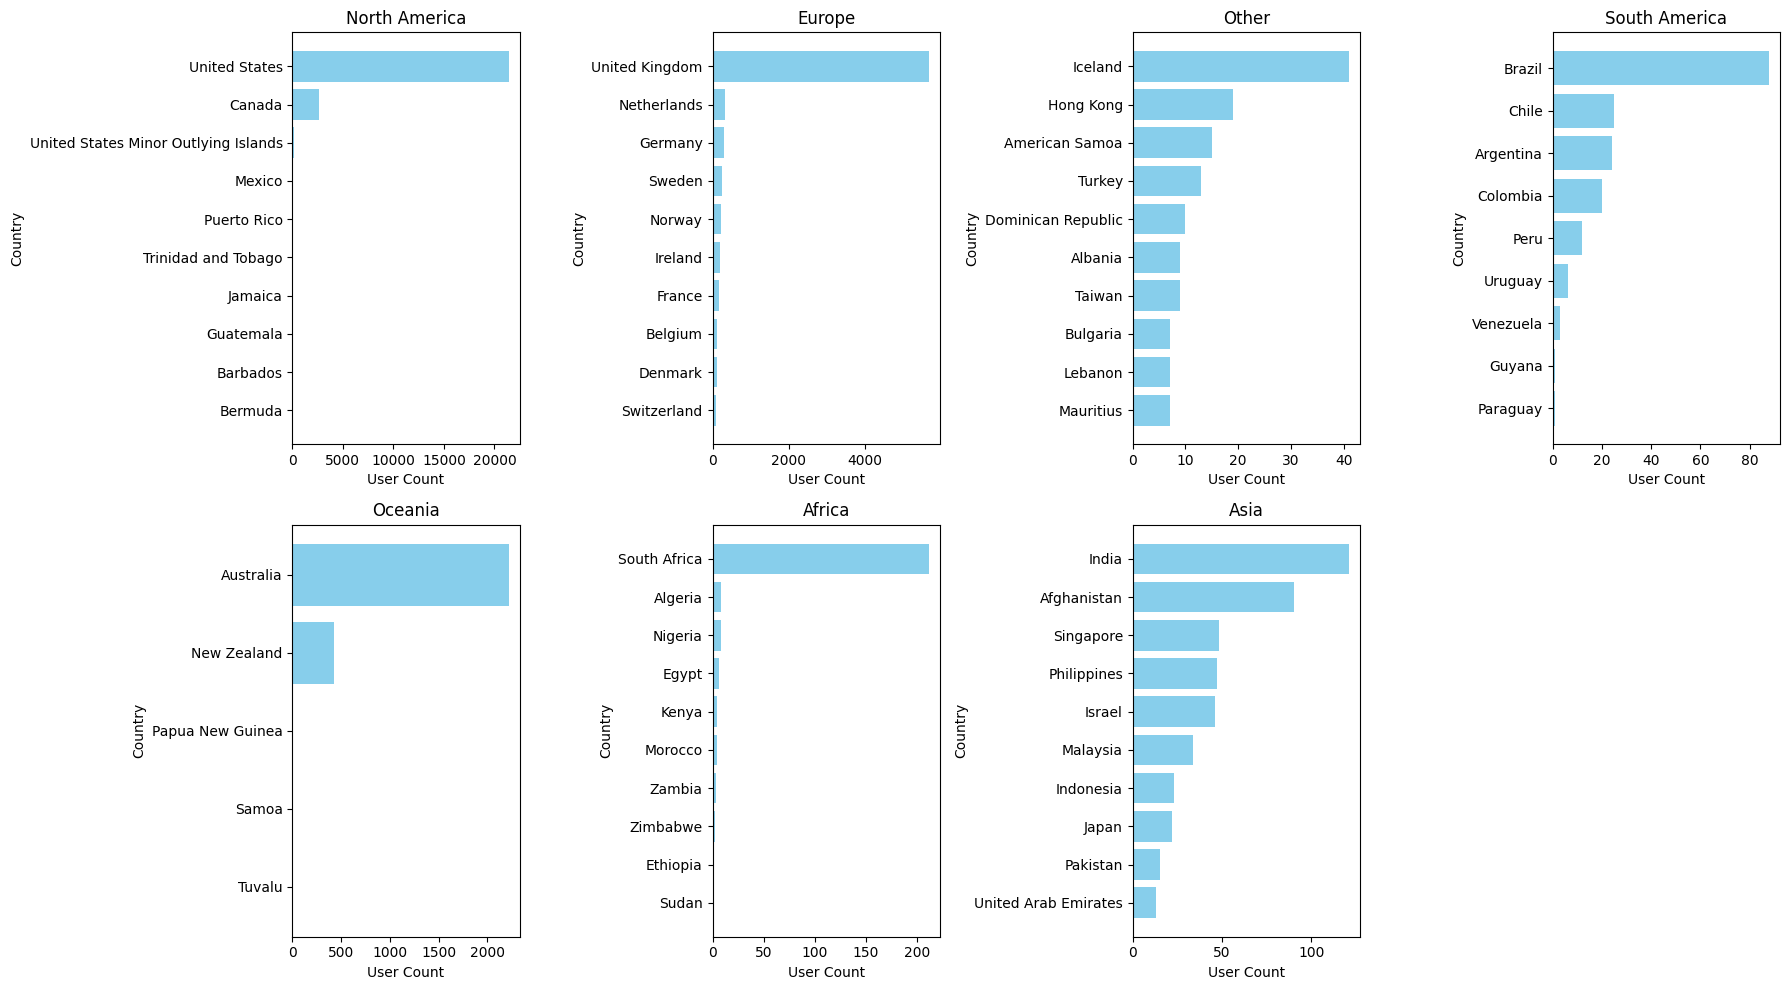

In [ ]:
import matplotlib.pyplot as plt

# Group by continent and country and count the number of user_ids
continent_country_counts = data_country.groupby(['continent','country']).size().reset_index(name='user_count')

# Function to plot the top 10 countries for each continent
def plot_top_countries_by_continent(ax, continent, data):
    top_countries = data[data['continent'] == continent].nlargest(10, 'user_count')
    ax.barh(top_countries['country'], top_countries['user_count'], color='skyblue')
    ax.set_title(continent)
    ax.set_xlabel('User Count')
    ax.set_ylabel('Country')
    ax.invert_yaxis()  # To display the largest at the top

# Plotting the subplots
continents = data_country['continent'].unique()
num_continents = len(continents)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))  # Adjust the subplot grid if needed

# Flatten axes for easy iteration
axes = axes.flatten()

for i, continent in enumerate(continents):
    plot_top_countries_by_continent(axes[i], continent, continent_country_counts)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('user_counts_by_continent.pdf', format='pdf')

plt.show()

#### Condition

In [ ]:
data_trackable = data[['user_id','trackable_type','trackable_name']]
# Keep only unique rows
data_trackable = data_trackable.drop_duplicates()
data_condition = data_trackable[data_trackable['trackable_type']=='Condition']
data_condition.head()

,user_id,trackable_type,trackable_name
0,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,Condition,Ulcerative colitis
1,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,Condition,Obsessive-compulsive disorder
2,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,Condition,Ovarian cysts
3,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,Condition,Sinus headaches
4,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,Condition,Temporal lobe seizure


<Figure size 1000x600 with 0 Axes>

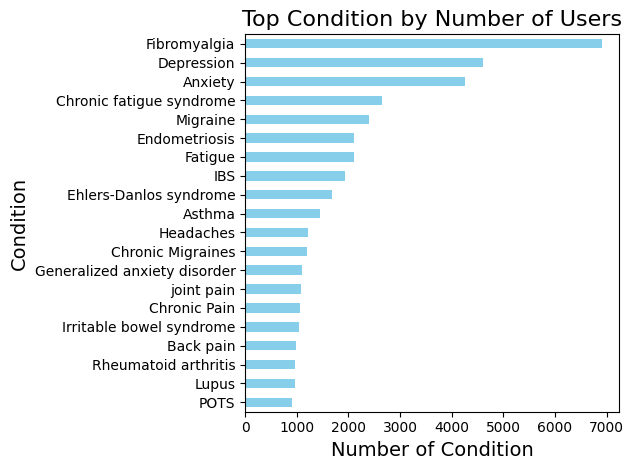

In [ ]:
from pickle import FALSE
import matplotlib.pyplot as plt
# Group by continent and country and count the number of user_ids
condition_counts = data_condition.groupby(['trackable_name']).size().reset_index(name='counts')

# Select top N counts
top_condition = condition_counts.sort_values(by='counts', ascending=False).head(20)

top_condition100 = condition_counts.sort_values(by='counts', ascending=False).head(100)
# Plotting the bar plot
plt.figure(figsize=(10,6))
top_condition.plot(kind='barh', color='skyblue',x='trackable_name', y='counts', legend=False)
plt.title('Top Condition by Number of Users', fontsize=16)
plt.xlabel('Number of Condition', fontsize=14)
plt.ylabel('Condition', fontsize=14)  # Y-axis label for condition
# Invert the y-axis so that the most frequent condition is at the top
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('codition_counts_all_countries.pdf', format='pdf')
plt.show()

###### Condition counts by continent

<ipython-input-31-05766d49b214>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_condition['continent'] = data_condition['country'].apply(map_to_continent)


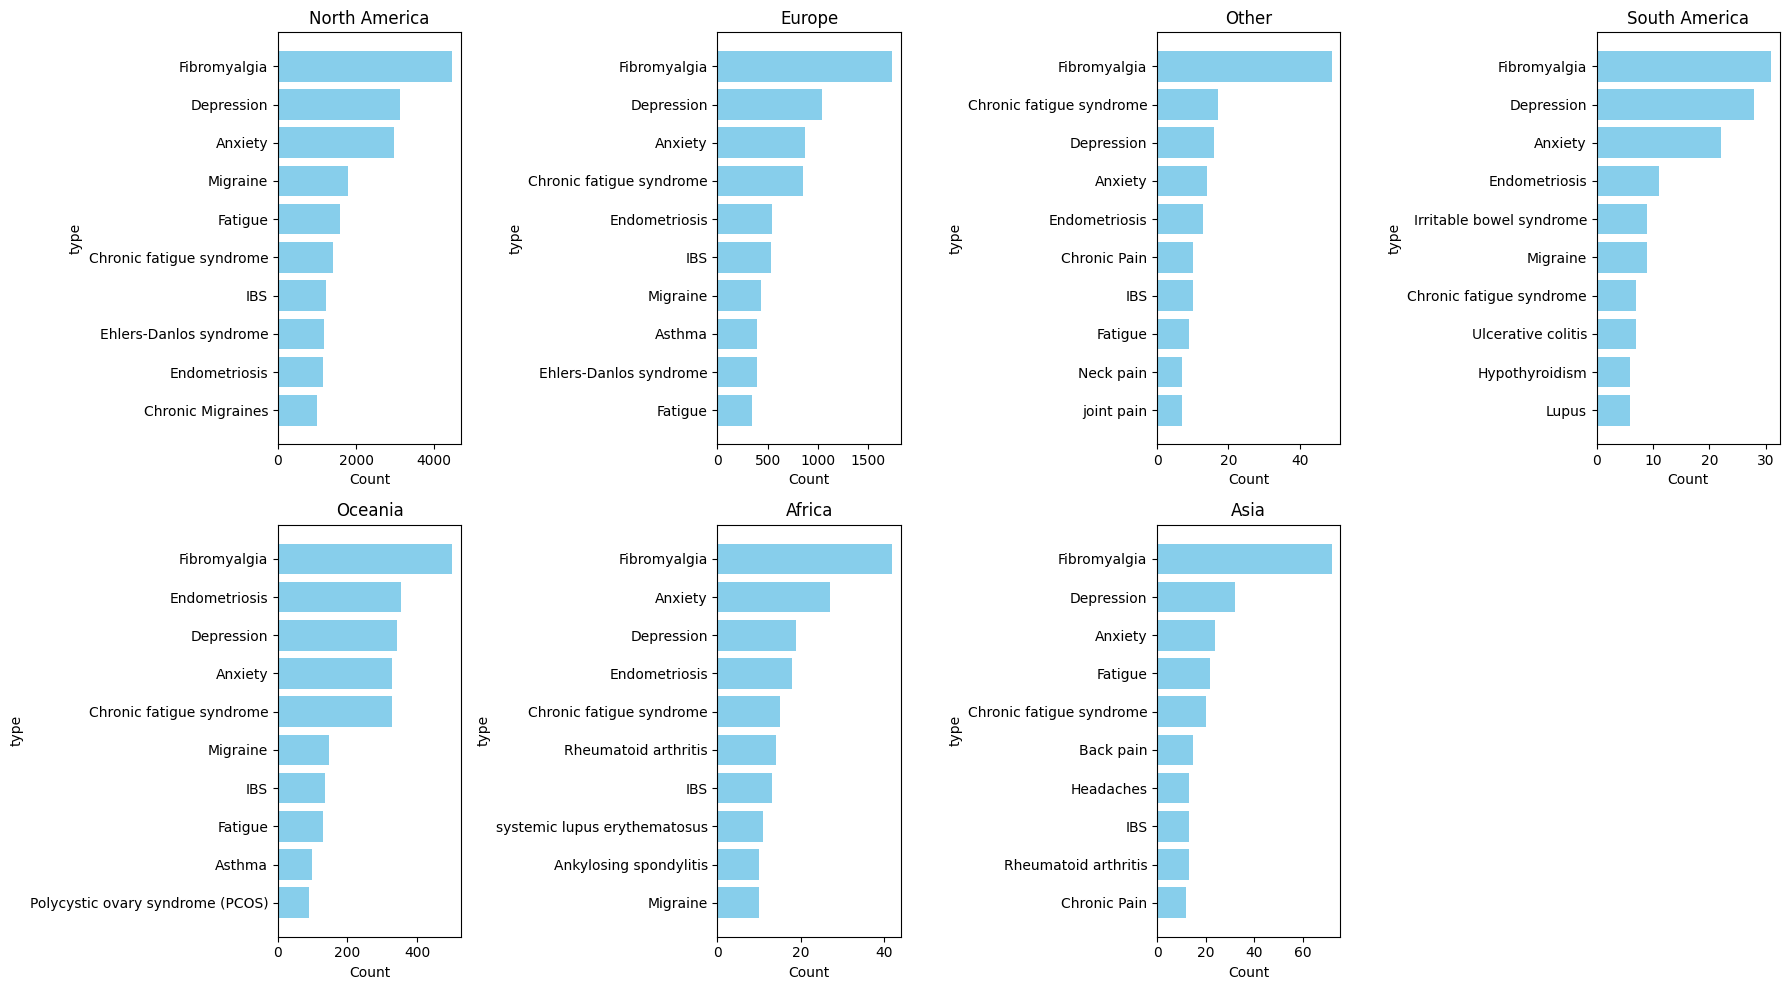

In [ ]:
data_condition = data[['user_id','trackable_type','trackable_name','country']]
data_condition['continent'] = data_condition['country'].apply(map_to_continent)
data_condition = data_condition.drop_duplicates()
data_condition = data_condition[data_condition['trackable_type']=='Condition']
#########
# Group by continent and country and count the number of user_ids
condition_country_counts = data_condition.groupby(['continent','trackable_name']).size().reset_index(name='count')

# Function to plot the top 10 countries for each continent
def plot_top_condition_by_continent(ax, continent, data):
    top_condition = data[data['continent'] == continent].nlargest(10, 'count')
    ax.barh(top_condition['trackable_name'], top_condition['count'], color='skyblue')
    ax.set_title(continent)
    ax.set_xlabel('Count')
    ax.set_ylabel('type')
    ax.invert_yaxis()  # To display the largest at the top

# Plotting the subplots
continents = data_condition['continent'].unique()
num_continents = len(continents)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))  # Adjust the subplot grid if needed

# Flatten axes for easy iteration
axes = axes.flatten()

for i, continent in enumerate(continents):
    plot_top_condition_by_continent(axes[i], continent, condition_country_counts)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('condition_type_counts_by_continent.pdf', format='pdf')

plt.show()

##### In the US

<ipython-input-8-11ef2cd324b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_condition['continent'] = data_condition['country'].apply(map_to_continent)


<Figure size 1000x600 with 0 Axes>

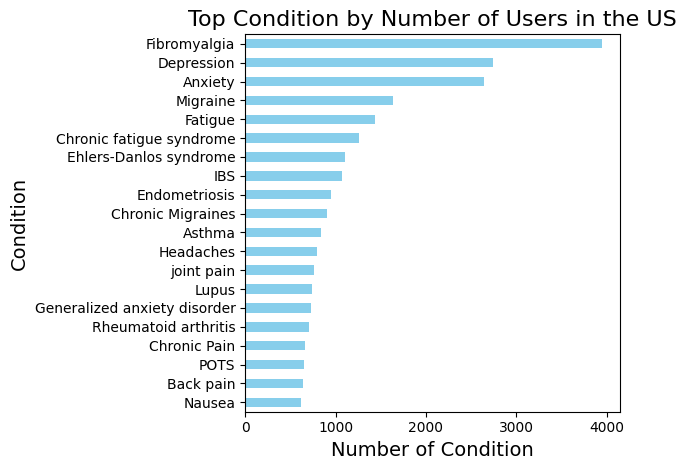

In [ ]:
data_condition = data[['user_id','trackable_type','trackable_name','country']]
data_condition['continent'] = data_condition['country'].apply(map_to_continent)
data_condition = data_condition.drop_duplicates()
data_condition = data_condition[(data_condition['trackable_type']=='Condition') & (data_condition['country']=='United States')]
# Group by continent and country and count the number of user_ids
condition_country_UScounts = data_condition.groupby(['trackable_name']).size().reset_index(name='counts')
# Select top N counts
top_condition_US = condition_country_UScounts.sort_values(by='counts', ascending=False).head(20)
top_condition_US100 = condition_country_UScounts.sort_values(by='counts', ascending=False).head(100)
# Plotting the bar plot
plt.figure(figsize=(10,6))
top_condition_US.plot(kind='barh', color='skyblue',x='trackable_name', y='counts', legend=False)
plt.title('Top Condition by Number of Users in the US', fontsize=16)
plt.xlabel('Number of Condition', fontsize=14)
plt.ylabel('Condition', fontsize=14)  # Y-axis label for condition
# Invert the y-axis so that the most frequent condition is at the top
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('codition_counts_US.pdf', format='pdf')
plt.show()

#### Treatment

<ipython-input-9-ea2f5154ef31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_treatment['continent'] = data_treatment['country'].apply(map_to_continent)


<Figure size 1000x600 with 0 Axes>

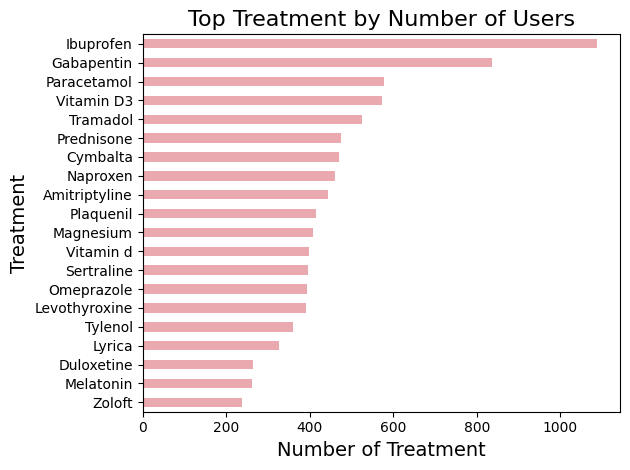

In [ ]:
data_treatment = data[['user_id','trackable_type','trackable_name','country']]
data_treatment['continent'] = data_treatment['country'].apply(map_to_continent)
data_treatment = data_treatment.drop_duplicates()
data_treatment = data_treatment[data_treatment['trackable_type']=='Treatment']
# Group by continent and country and count the number of user_ids
treatment_counts = data_treatment.groupby(['trackable_name']).size().reset_index(name='counts')

# Select top N counts
top_treatment = treatment_counts.sort_values(by='counts', ascending=False).head(20)
top_treatment100 = treatment_counts.sort_values(by='counts', ascending=False).head(100)
# Plotting the bar plot
plt.figure(figsize=(10,6))
top_treatment.plot(kind='barh', color='#eaa9af',x='trackable_name', y='counts', legend=False)
plt.title('Top Treatment by Number of Users', fontsize=16)
plt.xlabel('Number of Treatment', fontsize=14)
plt.ylabel('Treatment', fontsize=14)  # Y-axis label for condition
# Invert the y-axis so that the most frequent condition is at the top
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('treatment_counts_all_countries.pdf', format='pdf')
plt.show()

##### Treatment counts by continent

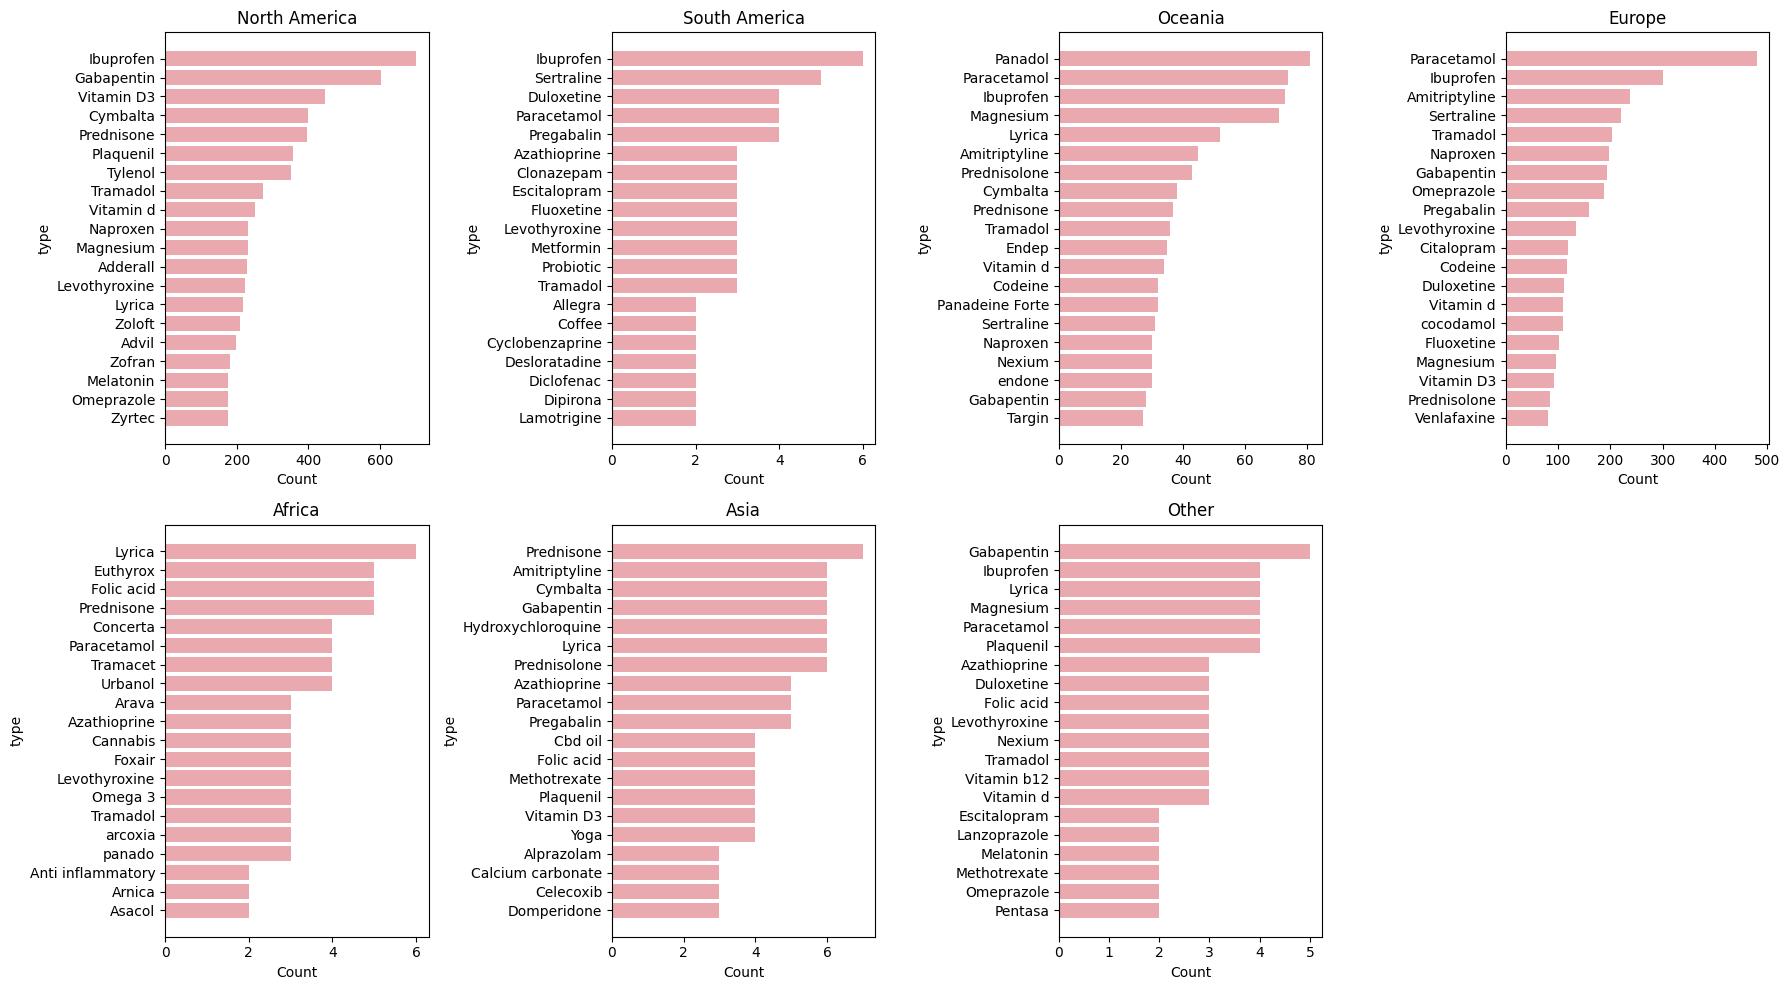

In [ ]:
# Group by continent and country and count the number of user_ids
treatment_country_counts = data_treatment.groupby(['continent','trackable_name']).size().reset_index(name='count')

# Function to plot the top 10 countries for each continent
def plot_top_treatment_by_continent(ax, continent, data):
    top_treatment = data[data['continent'] == continent].nlargest(20, 'count')
    ax.barh(top_treatment['trackable_name'], top_treatment['count'], color='#eaa9af')
    ax.set_title(continent)
    ax.set_xlabel('Count')
    ax.set_ylabel('type')
    ax.invert_yaxis()  # To display the largest at the top

# Plotting the subplots
continents = data_treatment['continent'].unique()
num_continents = len(continents)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))  # Adjust the subplot grid if needed

# Flatten axes for easy iteration
axes = axes.flatten()

for i, continent in enumerate(continents):
    plot_top_treatment_by_continent(axes[i], continent, treatment_country_counts)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('treatment_type_counts_by_continent.pdf', format='pdf')

plt.show()

##### In the US

<ipython-input-10-34fae0dc2c02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_treatment['continent'] = data_treatment['country'].apply(map_to_continent)


<Figure size 1000x600 with 0 Axes>

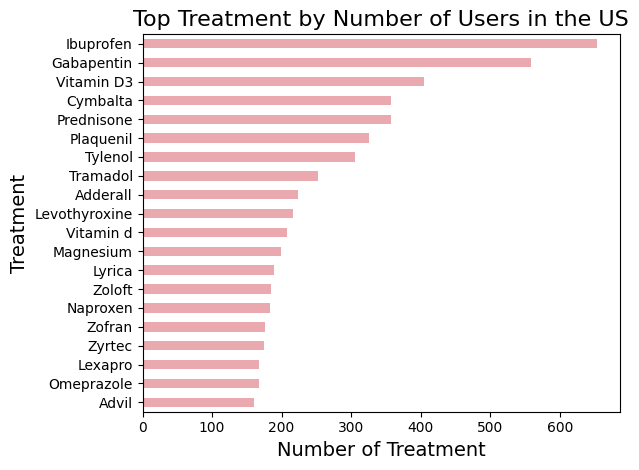

In [ ]:
data_treatment = data[['user_id','trackable_type','trackable_name','country']]
data_treatment['continent'] = data_treatment['country'].apply(map_to_continent)
data_treatment = data_treatment.drop_duplicates()
data_treatment = data_treatment[(data_treatment['trackable_type']=='Treatment') & (data_treatment['country']=='United States')]
# Group by continent and country and count the number of user_ids
treatment_country_UScounts = data_treatment.groupby(['trackable_name']).size().reset_index(name='counts')
# Select top N counts
top_treatment_US = treatment_country_UScounts.sort_values(by='counts', ascending=False).head(20)
top_treatment_US100 = treatment_country_UScounts.sort_values(by='counts', ascending=False).head(100)
# Plotting the bar plot
plt.figure(figsize=(10,6))
top_treatment_US.plot(kind='barh', color='#eaa9af',x='trackable_name', y='counts', legend=False)
plt.title('Top Treatment by Number of Users in the US', fontsize=16)
plt.xlabel('Number of Treatment', fontsize=14)
plt.ylabel('Treatment', fontsize=14)  # Y-axis label for condition
# Invert the y-axis so that the most frequent condition is at the top
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('treatment_counts_US.pdf', format='pdf')
plt.show()

#### Symptoms

<ipython-input-11-8d2aef7ff3c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_symptom['continent'] = data_symptom['country'].apply(map_to_continent)


<Figure size 1000x600 with 0 Axes>

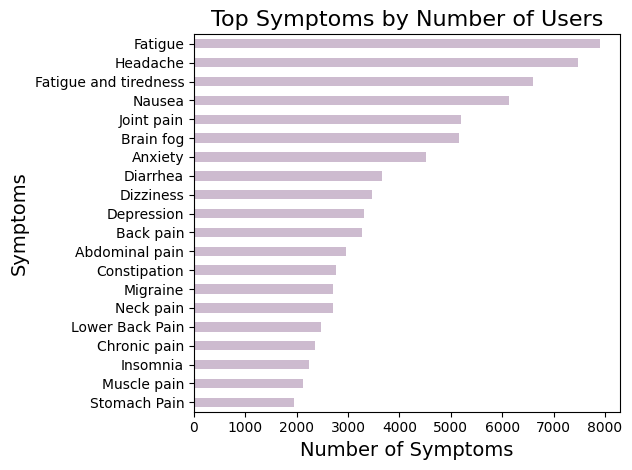

In [ ]:
data_symptom = data[['user_id','trackable_type','trackable_name','country']]
data_symptom['continent'] = data_symptom['country'].apply(map_to_continent)
data_symptom = data_symptom.drop_duplicates()
data_symptom = data_symptom[data_symptom['trackable_type']=='Symptom']
# Group by continent and country and count the number of user_ids
symptom_counts = data_symptom.groupby(['trackable_name']).size().reset_index(name='counts')

# Select top N counts
top_symptom = symptom_counts.sort_values(by='counts', ascending=False).head(20)
top_symptom100 = symptom_counts.sort_values(by='counts', ascending=False).head(100)
# Plotting the bar plot
plt.figure(figsize=(10,6))
top_symptom.plot(kind='barh', color='#cdbbcf',x='trackable_name', y='counts', legend=False)
plt.title('Top Symptoms by Number of Users', fontsize=16)
plt.xlabel('Number of Symptoms', fontsize=14)
plt.ylabel('Symptoms', fontsize=14)  # Y-axis label for condition
# Invert the y-axis so that the most frequent condition is at the top
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('symptom_counts_all_countries.pdf', format='pdf')
plt.show()

##### Symptoms by continent

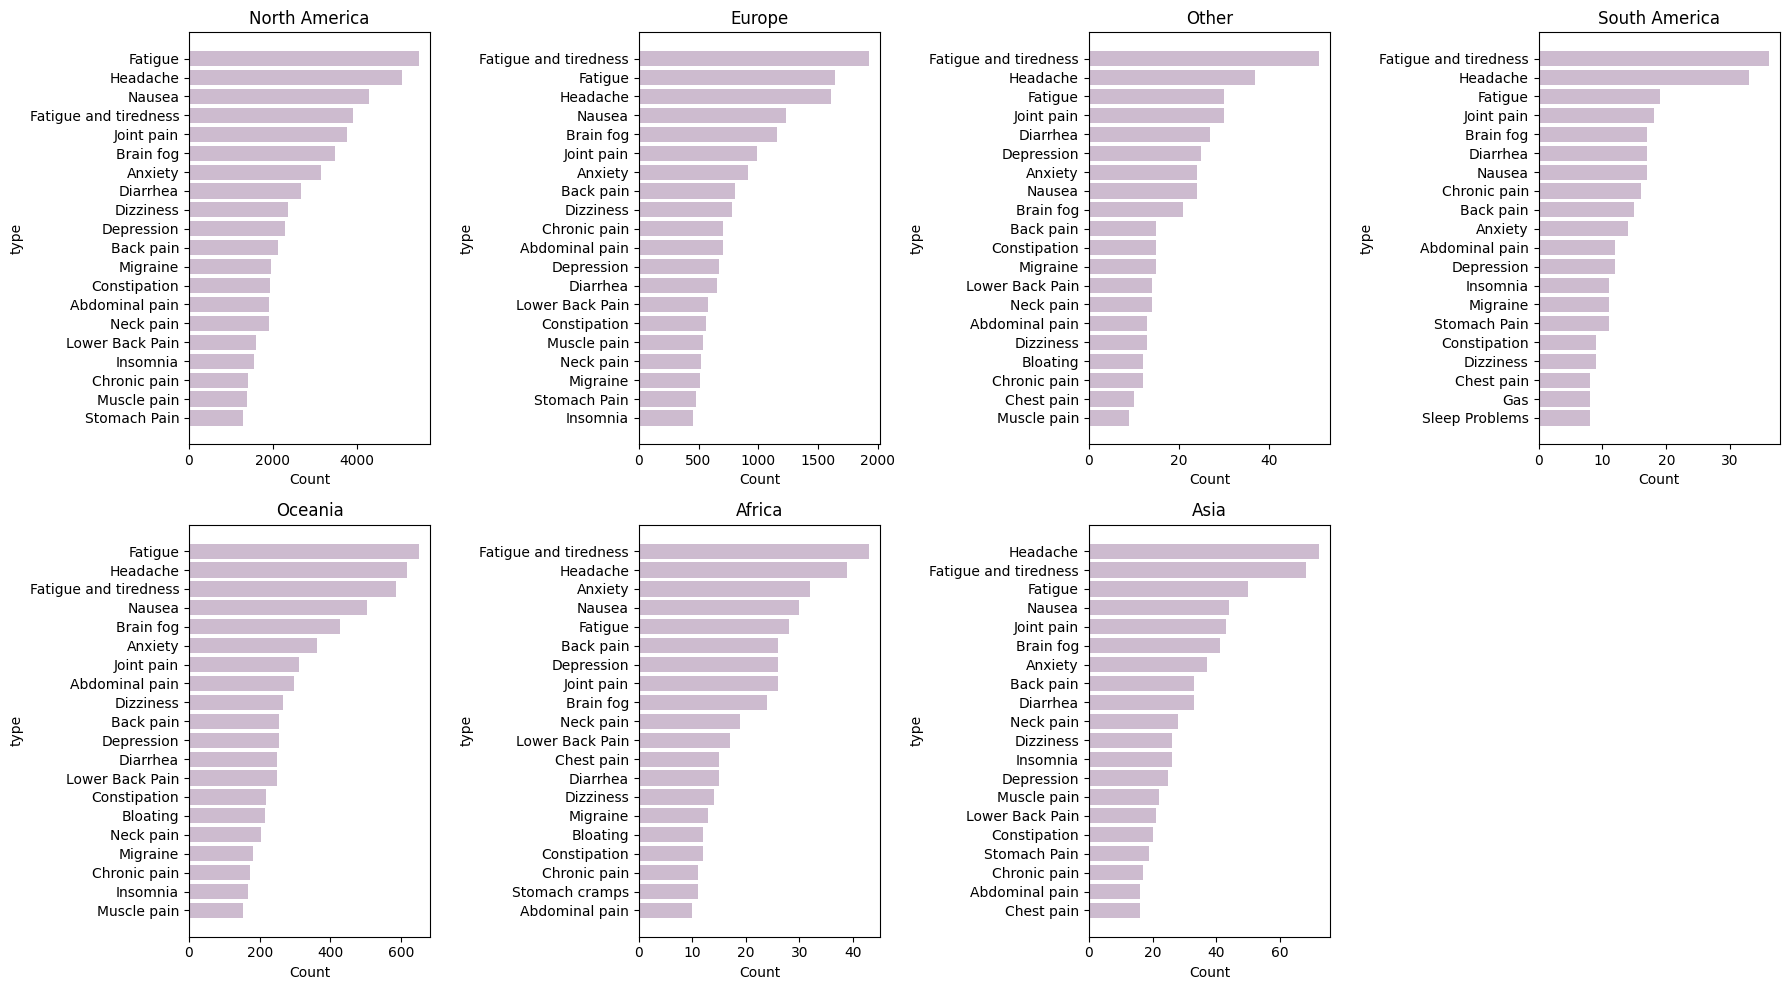

In [ ]:
# Group by continent and country and count the number of user_ids
symptom_country_counts = data_symptom.groupby(['continent','trackable_name']).size().reset_index(name='count')

# Function to plot the top 10 countries for each continent
def plot_top_symptom_by_continent(ax, continent, data):
    top_symptom = data[data['continent'] == continent].nlargest(20, 'count')
    ax.barh(top_symptom['trackable_name'], top_symptom['count'], color='#cdbbcf')
    ax.set_title(continent)
    ax.set_xlabel('Count')
    ax.set_ylabel('type')
    ax.invert_yaxis()  # To display the largest at the top

# Plotting the subplots
continents = data_symptom['continent'].unique()
num_continents = len(continents)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))  # Adjust the subplot grid if needed

# Flatten axes for easy iteration
axes = axes.flatten()

for i, continent in enumerate(continents):
    plot_top_symptom_by_continent(axes[i], continent, symptom_country_counts)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('symptom_type_counts_by_continent.pdf', format='pdf')
plt.show()

##### In the US

<ipython-input-12-362b8520dbbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_symptom['continent'] = data_symptom['country'].apply(map_to_continent)


<Figure size 1000x600 with 0 Axes>

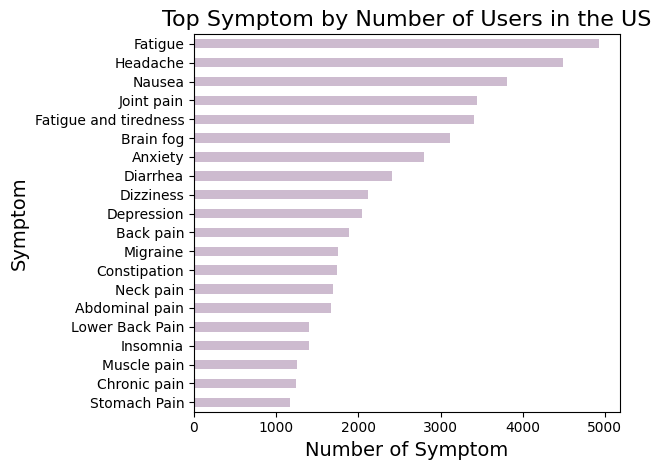

In [ ]:
data_symptom = data[['user_id','trackable_type','trackable_name','country']]
data_symptom['continent'] = data_symptom['country'].apply(map_to_continent)
data_symptom = data_symptom.drop_duplicates()
data_symptom = data_symptom[(data_symptom['trackable_type']=='Symptom') & (data_symptom['country']=='United States')]
# Group by continent and country and count the number of user_ids
symptom_country_UScounts = data_symptom.groupby(['trackable_name']).size().reset_index(name='counts')
# Select top N counts
top_symptom_US = symptom_country_UScounts.sort_values(by='counts', ascending=False).head(20)
top_symptom_US100 = symptom_country_UScounts.sort_values(by='counts', ascending=False).head(100)
# Plotting the bar plot
plt.figure(figsize=(10,6))
top_symptom_US.plot(kind='barh', color='#cdbbcf',x='trackable_name', y='counts', legend=False)
plt.title('Top Symptom by Number of Users in the US', fontsize=16)
plt.xlabel('Number of Symptom', fontsize=14)
plt.ylabel('Symptom', fontsize=14)  # Y-axis label for condition
# Invert the y-axis so that the most frequent condition is at the top
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('symptom_counts_US.pdf', format='pdf')
plt.show()

#### Sex

In [ ]:
# Pie Chart


#### Age

In [ ]:
## Pie Chart

#### HBI

<ipython-input-63-8676324ea45f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_HBI['continent'] = data_HBI['country'].apply(map_to_continent)
<ipython-input-63-8676324ea45f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_HBI['trackable_value'] = pd.to_numeric(data_HBI['trackable_value'], errors='coerce')
<ipython-input-63-8676324ea45f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

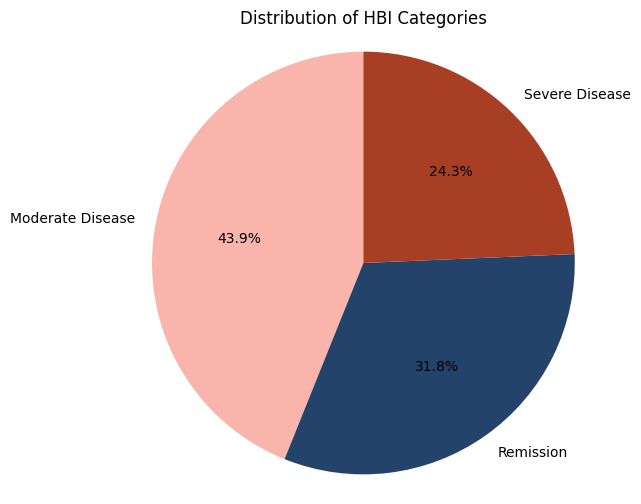

In [ ]:
### need to look at the last column of the original data
### Remission: <=3
### Moderate Disease: 4-7
### Severe Disease: >=8


data_HBI = data[['user_id','trackable_type','trackable_name','trackable_value','country']]
data_HBI['continent'] = data_HBI['country'].apply(map_to_continent)
data_HBI = data_HBI[data_HBI['trackable_type']=='HBI']
# Convert 'trackable_value' to numeric, forcing errors to NaN
data_HBI['trackable_value'] = pd.to_numeric(data_HBI['trackable_value'], errors='coerce')
data_HBI.loc[data_HBI['trackable_value'] <=3, 'HBI_category'] = 'Remission'
data_HBI.loc[ (data_HBI['trackable_value'] <8) & (data_HBI['trackable_value'] > 3), 'HBI_category'] = 'Moderate Disease'
data_HBI.loc[data_HBI['trackable_value'] >=8 , 'HBI_category'] = 'Severe Disease'


#data_HBI = data_HBI.drop_duplicates()
# Group by continent and country and count the number of user_ids
HBI_counts = data_HBI.groupby(['HBI_category']).size().reset_index(name='counts')
HBI_counts.head()

color_map = {
    "Remission": '#24436b' ,
    "Moderate Disease": '#f9b5ac',
    "Severe Disease": '#a83e24'
}

# Get the colors based on the category names
colors = [color_map[category] for category in HBI_counts['HBI_category'] ]

# Plot the pie chart with specified colors
plt.figure(figsize=(6, 6))
plt.pie(HBI_counts['counts'], labels=HBI_counts['HBI_category'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of HBI Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.savefig('HBI_distribution_all_countries.pdf', format='pdf')
plt.show()



#### Weather

<ipython-input-15-5d7f9e6b70e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_weather['continent'] = data_weather['country'].apply(map_to_continent)


,trackable_name,counts
0,humidity,10305
1,icon,10305
2,precip_intensity,10305
3,pressure,10305
4,temperature_max,10305
5,temperature_min,10305


#### Tag

#### Food

### Main question1: Can we predict the onset of future Treatment based on past symptom and condition data

In [ ]:
import pandas as pd
import datetime
data_filtered = pd.read_csv('data_filtered.csv')

<ipython-input-269-a9c87e5f0286>:3: DtypeWarning:

Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
## Only keep the condition and symtoms with 100 highest of US
top_conditions = top_condition_US100['trackable_name'].tolist()
data1 = data_filtered[~((data_filtered['trackable_type'] == 'Condition') & (~data_filtered['trackable_name'].isin(top_conditions)))]
top_symptoms = top_symptom_US100['trackable_name'].tolist()
data = data1[~((data1['trackable_type']=='Symptom') & (~data1['trackable_name'].isin(top_symptoms)))]
top_treatment = top_treatment_US100['trackable_name'].tolist()
data1 = data[~((data['trackable_type']=='Treatment') & (~data['trackable_name'].isin(top_treatment)))]
data = data1[data1['trackable_type'].isin(['Condition', 'Symptom', 'Weather','Treatment'])]
data.to_csv('data_top100US_CSWT.csv')

In [ ]:
import pandas as pd
import datetime
data = pd.read_csv('data_top100US_CSWT.csv')
# Step 1: find what trackable_type for each user_id
condition_and_symptom_users = data.groupby('user_id')['trackable_type'].apply(lambda x: set(x)).reset_index()
# Step2: select those user_id has both Condition and Symtoms
valid_user_ids = condition_and_symptom_users[
    condition_and_symptom_users['trackable_type'].apply(lambda x: {'Condition', 'Symptom'}.issubset(x))]['user_id']
# Step 3: only keep the dataframe with these selcted user_id
data = data[data['user_id'].isin(valid_user_ids)]
## User-level aggregation
data_US = data[data['country']=='United States']
# Filter out weather entries that are not 'icon'
data_filtered = data_US[
    ~((data_US['trackable_type'] == 'Weather') & (data_US['trackable_name'] != 'icon'))
]
data_filtered.loc[data_filtered['trackable_type'] == 'Weather', 'trackable_name'] = \
    data_filtered.loc[data_filtered['trackable_type'] == 'Weather', 'trackable_value'].astype(str)

## Select the user_id with date that has all {'Symptom', 'Treatment', 'Condition', 'Weather'}
required_types = {'Symptom', 'Treatment', 'Condition', 'Weather'}
grouped = data_filtered.groupby(['user_id', 'checkin_date'])['trackable_type'].apply(set).reset_index()
#Filter groups where all required trackable types are present
valid_dates = grouped[grouped['trackable_type'].apply(lambda x: required_types.issubset(x))]
#Filter the original data to keep only the valid user_id and checkin_date combinations
filtered_data = data_filtered.merge(valid_dates[['user_id', 'checkin_date']], on=['user_id', 'checkin_date'])

aggregated_data_per_day = filtered_data.groupby( ['user_id', 'trackable_type', 'trackable_name', 'checkin_date'])['trackable_name'].count().reset_index(name='count')

# Pivot the data to create one row per user with frequencies as values
aggregated_data_pivot = aggregated_data_per_day.pivot_table(
    index=['user_id','checkin_date'],
    columns=['trackable_type', 'trackable_name'],
    values='count',
    fill_value=0  # Fill missing values with 0
).reset_index()

# Flatten multi-level columns
aggregated_data_pivot.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in aggregated_data_pivot.columns]




In [ ]:
aggregated_data_pivot.head()

,user_id_,Condition_ADHD,Condition_Abdominal pain,Condition_Acid Reflux,Condition_Acne,Condition_Adult ADHD,Condition_Allergies,Condition_Anemia,Condition_Ankylosing spondylitis,Condition_Anxiety,...,Weather_clear-day,Weather_cloudy,Weather_fog,Weather_nan,Weather_partly-cloudy-day,Weather_partly-cloudy-night,Weather_rain,Weather_sleet,Weather_snow,Weather_wind
0,QEVuQwEA+/8U9sSEAu2aU82/7GWTfQ==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,QEVuQwEA+/8cAMqcEbJf+cmhGnPXqw==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,QEVuQwEA+/WWv2EpSyctc64BtIuDnQ==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,QEVuQwEA+/gllBhhcqr2iAESqNOeUA==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,QEVuQwEA+/tEquKas1s6wFVgiluL5A==,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
aggregated_data_pivot.to_csv('Day_aggregated_data_pivot.csv')

In [ ]:
import pandas as pd
import datetime
aggregated_data_pivot = pd.read_csv('Day_aggregated_data_pivot.csv')

In [ ]:
# Identify feature columns
symptom_cols = [col for col in aggregated_data_pivot.columns if col.startswith('Symptom_')]
treatment_cols = [col for col in aggregated_data_pivot.columns if col.startswith('Treatment_')]
weather_cols = [col for col in aggregated_data_pivot.columns if col.startswith('Weather_')]

# Identify target columns
condition_cols = [col for col in aggregated_data_pivot.columns if col.startswith('Condition_')]

####Predict Treatments by Conditions, Symptoms, and Weather
# Define X and y
X_treatments = aggregated_data_pivot[condition_cols + symptom_cols ] # top_condition100
y_treatments = aggregated_data_pivot[treatment_cols].idxmax(axis=1)  # Choose the treatment with the highest value


In [ ]:
# TabNet requires numeric targets, so use LabelEncoder to encode y (which currently contains column names as strings) into numeric values.
from sklearn.preprocessing import LabelEncoder
label_encoder_treatments = LabelEncoder()
y_treatments_encoded = label_encoder_treatments.fit_transform(y_treatments)

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 607.5 kB/s eta 0:00:00


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split

## becuase of the imbalnce we use train_test_split with stratify
# Split into training and temporary sets (70% train, 30% temp)
X_train_treat, X_temp_treat, y_train_treat, y_temp_treat = train_test_split(
    X_treatments, y_treatments_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_treatments_encoded
)

# Split temporary set into validation and test sets (50% each of temp set)
X_valid_treat, X_test_treat, y_valid_treat, y_test_treat = train_test_split(
    X_temp_treat, y_temp_treat,
    test_size=0.5,
    random_state=42,
    stratify=y_temp_treat
)

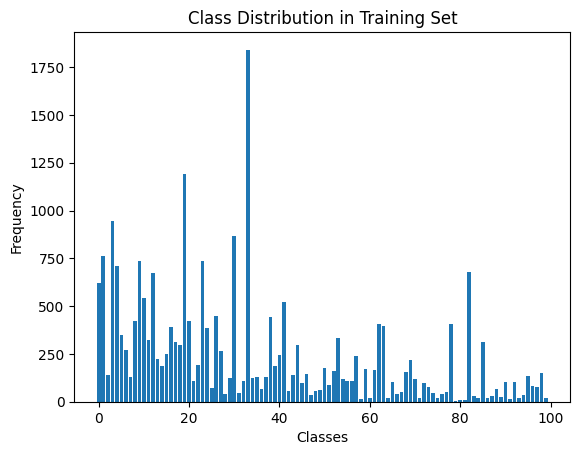

In [ ]:
from collections import Counter

import matplotlib.pyplot as plt

# Plot class distribution
class_counts = Counter(y_train_treat)
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Class Distribution in Training Set")
#plt.savefig('tabnet/train_treat_imbalance.pdf')
plt.show()

In [ ]:
import torch
import optuna
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def objective(trial):
    # Sample hyperparameters
    n_d = trial.suggest_categorical("n_d", [128, 256])
    n_a = trial.suggest_categorical("n_a", [128, 256])
    n_steps = trial.suggest_int("n_steps", 3, 10)
    gamma = trial.suggest_float("gamma", 1.0, 2.0, step=0.1)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-5, 1e-3, log=True)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [1024,2048,4096, 8192])
    virtual_batch_size = trial.suggest_categorical("virtual_batch_size", [64, 128, 512, 1024])
    scheduler_gamma = trial.suggest_float("scheduler_gamma", 0.8, 0.99, step=0.01)
    step_size = trial.suggest_int("step_size", 10, 50)

    # Initialize TabNetClassifier with sampled hyperparameters
    clf = TabNetClassifier(
        n_d=n_d, n_a=n_a, n_steps=n_steps, gamma=gamma,
        lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=learning_rate),
        scheduler_params={"gamma": scheduler_gamma, "step_size": step_size},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        epsilon=1e-15
    )

    # Train the model with the sampled batch_size and virtual_batch_size
    clf.fit(
        X_train=X_train_treat.values, y_train=y_train_treat,
        eval_set=[(X_valid_treat.values, y_valid_treat)],
        eval_name=["valid"],
        max_epochs=20, patience=5,
        batch_size=batch_size, virtual_batch_size=virtual_batch_size
    )

    # Predict and evaluate performance
    y_pred = clf.predict(X_valid_treat.values)
    accuracy = accuracy_score(y_valid_treat, y_pred)

    return accuracy  # Return validation accuracy as the objective


In [ ]:
# Create a study and optimize the objective function
study = optuna.create_study(direction="maximize")  # Maximize accuracy
study.optimize(objective, n_trials= 50)  # Try 20 different hyperparameter combinations
# Print the best hyperparameters
print("Best Hyperparameters:", study.best_params)


[I 2024-11-29 22:22:59,774] A new study created in memory with name: no-name-da757d0c-843a-4295-959b-5657a7aeb272
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.37813 | valid_accuracy: 0.02534 |  0:00:02s
epoch 1  | loss: 8.36506 | valid_accuracy: 0.04381 |  0:00:03s
epoch 2  | loss: 7.41701 | valid_accuracy: 0.03831 |  0:00:04s
epoch 3  | loss: 6.77362 | valid_accuracy: 0.04204 |  0:00:05s
epoch 4  | loss: 6.16923 | valid_accuracy: 0.05737 |  0:00:06s
epoch 5  | loss: 5.98258 | valid_accuracy: 0.07682 |  0:00:08s
epoch 6  | loss: 5.84594 | valid_accuracy: 0.07525 |  0:00:09s
epoch 7  | loss: 5.80535 | valid_accuracy: 0.06857 |  0:00:10s
epoch 8  | loss: 5.58849 | valid_accuracy: 0.06955 |  0:00:10s
epoch 9  | loss: 5.48209 | valid_accuracy: 0.07191 |  0:00:11s
epoch 10 | loss: 5.36721 | valid_accuracy: 0.09096 |  0:00:12s
epoch 11 | loss: 5.16817 | valid_accuracy: 0.08507 |  0:00:13s
epoch 12 | loss: 5.05633 | valid_accuracy: 0.09057 |  0:00:14s
epoch 13 | loss: 4.95212 | valid_accuracy: 0.08978 |  0:00:15s
epoch 14 | loss: 4.84831 | valid_accuracy: 0.11945 |  0:00:16s
epoch 15 | loss: 4.7172  | valid_accuracy: 0.12495 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:23:28,316] Trial 0 finished with value: 0.13831041257367388 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 8, 'gamma': 1.5, 'lambda_sparse': 0.0001420604969186578, 'learning_rate': 0.0008083621953199731, 'batch_size': 2048, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.8500000000000001, 'step_size': 15}. Best is trial 0 with value: 0.13831041257367388.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 12.88196| valid_accuracy: 0.01336 |  0:00:01s
epoch 1  | loss: 11.83514| valid_accuracy: 0.02888 |  0:00:02s
epoch 2  | loss: 11.12218| valid_accuracy: 0.02004 |  0:00:03s
epoch 3  | loss: 10.39541| valid_accuracy: 0.0391  |  0:00:04s
epoch 4  | loss: 9.79085 | valid_accuracy: 0.03418 |  0:00:05s
epoch 5  | loss: 9.33559 | valid_accuracy: 0.05914 |  0:00:07s
epoch 6  | loss: 9.04308 | valid_accuracy: 0.06503 |  0:00:08s
epoch 7  | loss: 8.79218 | valid_accuracy: 0.05481 |  0:00:09s
epoch 8  | loss: 8.48827 | valid_accuracy: 0.06523 |  0:00:11s
epoch 9  | loss: 8.1827  | valid_accuracy: 0.0501  |  0:00:12s
epoch 10 | loss: 8.06007 | valid_accuracy: 0.04499 |  0:00:14s
epoch 11 | loss: 8.04333 | valid_accuracy: 0.05737 |  0:00:15s
epoch 12 | loss: 7.87797 | valid_accuracy: 0.05796 |  0:00:16s
epoch 13 | loss: 7.71417 | valid_accuracy: 0.04931 |  0:00:17s

Early stopping occurred at epoch 13 with best_epoch = 8 and best_valid_accuracy = 0.06523


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:23:47,449] Trial 1 finished with value: 0.06522593320235756 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 8, 'gamma': 1.1, 'lambda_sparse': 0.0003667365093444224, 'learning_rate': 0.00120469464788185, 'batch_size': 8192, 'virtual_batch_size': 128, 'scheduler_gamma': 0.99, 'step_size': 42}. Best is trial 0 with value: 0.13831041257367388.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.88276 | valid_accuracy: 0.04676 |  0:00:00s
epoch 1  | loss: 8.16472 | valid_accuracy: 0.07603 |  0:00:01s
epoch 2  | loss: 6.84763 | valid_accuracy: 0.07898 |  0:00:02s
epoch 3  | loss: 5.95233 | valid_accuracy: 0.07957 |  0:00:03s
epoch 4  | loss: 5.27887 | valid_accuracy: 0.07859 |  0:00:04s
epoch 5  | loss: 4.97682 | valid_accuracy: 0.07741 |  0:00:05s
epoch 6  | loss: 4.73411 | valid_accuracy: 0.08291 |  0:00:06s
epoch 7  | loss: 4.46438 | valid_accuracy: 0.07289 |  0:00:07s
epoch 8  | loss: 4.21006 | valid_accuracy: 0.05717 |  0:00:08s
epoch 9  | loss: 4.17374 | valid_accuracy: 0.07917 |  0:00:09s
epoch 10 | loss: 3.84545 | valid_accuracy: 0.0943  |  0:00:10s
epoch 11 | loss: 3.70124 | valid_accuracy: 0.11218 |  0:00:11s
epoch 12 | loss: 3.41929 | valid_accuracy: 0.11257 |  0:00:12s
epoch 13 | loss: 3.1823  | valid_accuracy: 0.11297 |  0:00:12s
epoch 14 | loss: 2.99883 | valid_accuracy: 0.11395 |  0:00:13s
epoch 15 | loss: 2.91655 | valid_accuracy: 0.11631 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:24:07,741] Trial 2 finished with value: 0.12357563850687622 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 6, 'gamma': 1.0, 'lambda_sparse': 0.0001494176929754079, 'learning_rate': 0.0023654389660576454, 'batch_size': 8192, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.88, 'step_size': 26}. Best is trial 0 with value: 0.13831041257367388.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 14.41083| valid_accuracy: 0.00707 |  0:00:01s
epoch 1  | loss: 14.27187| valid_accuracy: 0.00511 |  0:00:03s
epoch 2  | loss: 14.28005| valid_accuracy: 0.00688 |  0:00:04s
epoch 3  | loss: 14.16746| valid_accuracy: 0.00766 |  0:00:06s
epoch 4  | loss: 14.21257| valid_accuracy: 0.0057  |  0:00:08s
epoch 5  | loss: 14.00343| valid_accuracy: 0.00491 |  0:00:09s
epoch 6  | loss: 13.94655| valid_accuracy: 0.00511 |  0:00:11s
epoch 7  | loss: 13.94798| valid_accuracy: 0.00904 |  0:00:13s
epoch 8  | loss: 13.77733| valid_accuracy: 0.00491 |  0:00:15s
epoch 9  | loss: 13.79695| valid_accuracy: 0.0057  |  0:00:17s
epoch 10 | loss: 13.87037| valid_accuracy: 0.00609 |  0:00:18s
epoch 11 | loss: 13.56715| valid_accuracy: 0.00648 |  0:00:20s
epoch 12 | loss: 13.62961| valid_accuracy: 0.01041 |  0:00:22s
epoch 13 | loss: 13.55978| valid_accuracy: 0.0057  |  0:00:23s
epoch 14 | loss: 13.46016| valid_accuracy: 0.00629 |  0:00:26s
epoch 15 | loss: 13.431  | valid_accuracy: 0.0057  |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:24:42,200] Trial 3 finished with value: 0.010412573673870334 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 9, 'gamma': 1.7000000000000002, 'lambda_sparse': 0.00041866321900414007, 'learning_rate': 0.00013849644403103064, 'batch_size': 4096, 'virtual_batch_size': 128, 'scheduler_gamma': 0.89, 'step_size': 48}. Best is trial 0 with value: 0.13831041257367388.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 11.22096| valid_accuracy: 0.02083 |  0:00:01s
epoch 1  | loss: 11.11005| valid_accuracy: 0.02338 |  0:00:02s
epoch 2  | loss: 10.9811 | valid_accuracy: 0.02358 |  0:00:03s
epoch 3  | loss: 10.91096| valid_accuracy: 0.01356 |  0:00:04s
epoch 4  | loss: 10.76292| valid_accuracy: 0.0165  |  0:00:05s
epoch 5  | loss: 10.71864| valid_accuracy: 0.01473 |  0:00:06s
epoch 6  | loss: 10.59343| valid_accuracy: 0.01631 |  0:00:07s
epoch 7  | loss: 10.5618 | valid_accuracy: 0.0169  |  0:00:08s

Early stopping occurred at epoch 7 with best_epoch = 2 and best_valid_accuracy = 0.02358


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:24:52,167] Trial 4 finished with value: 0.023575638506876228 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 7, 'gamma': 1.2, 'lambda_sparse': 3.162545061465903e-05, 'learning_rate': 0.00013014412276453753, 'batch_size': 8192, 'virtual_batch_size': 512, 'scheduler_gamma': 0.8400000000000001, 'step_size': 21}. Best is trial 0 with value: 0.13831041257367388.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.31351 | valid_accuracy: 0.03792 |  0:00:00s
epoch 1  | loss: 5.09306 | valid_accuracy: 0.07859 |  0:00:01s
epoch 2  | loss: 4.32599 | valid_accuracy: 0.078   |  0:00:02s
epoch 3  | loss: 3.77888 | valid_accuracy: 0.10491 |  0:00:03s
epoch 4  | loss: 3.32513 | valid_accuracy: 0.11591 |  0:00:04s
epoch 5  | loss: 2.99863 | valid_accuracy: 0.13163 |  0:00:04s
epoch 6  | loss: 2.76145 | valid_accuracy: 0.14028 |  0:00:05s
epoch 7  | loss: 2.54316 | valid_accuracy: 0.19253 |  0:00:06s
epoch 8  | loss: 2.37263 | valid_accuracy: 0.2387  |  0:00:07s
epoch 9  | loss: 2.23677 | valid_accuracy: 0.29941 |  0:00:09s
epoch 10 | loss: 2.11586 | valid_accuracy: 0.3444  |  0:00:09s
epoch 11 | loss: 1.99998 | valid_accuracy: 0.39352 |  0:00:10s
epoch 12 | loss: 1.92933 | valid_accuracy: 0.45737 |  0:00:11s
epoch 13 | loss: 1.85391 | valid_accuracy: 0.49862 |  0:00:12s
epoch 14 | loss: 1.78039 | valid_accuracy: 0.51788 |  0:00:13s
epoch 15 | loss: 1.71941 | valid_accuracy: 0.5721  |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:25:10,658] Trial 5 finished with value: 0.6530451866404715 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.2, 'lambda_sparse': 0.0001961967422040883, 'learning_rate': 0.00038346452141580645, 'batch_size': 1024, 'virtual_batch_size': 512, 'scheduler_gamma': 0.9500000000000001, 'step_size': 25}. Best is trial 5 with value: 0.6530451866404715.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 13.57497| valid_accuracy: 0.01297 |  0:00:01s
epoch 1  | loss: 12.71681| valid_accuracy: 0.011   |  0:00:02s
epoch 2  | loss: 12.33486| valid_accuracy: 0.0224  |  0:00:03s
epoch 3  | loss: 11.76588| valid_accuracy: 0.02475 |  0:00:05s
epoch 4  | loss: 11.10439| valid_accuracy: 0.01945 |  0:00:06s
epoch 5  | loss: 10.49702| valid_accuracy: 0.03045 |  0:00:07s
epoch 6  | loss: 10.06542| valid_accuracy: 0.03497 |  0:00:08s
epoch 7  | loss: 9.65092 | valid_accuracy: 0.03635 |  0:00:10s
epoch 8  | loss: 9.07902 | valid_accuracy: 0.02672 |  0:00:11s
epoch 9  | loss: 8.71343 | valid_accuracy: 0.03949 |  0:00:12s
epoch 10 | loss: 8.3709  | valid_accuracy: 0.04853 |  0:00:13s
epoch 11 | loss: 8.06964 | valid_accuracy: 0.0556  |  0:00:15s
epoch 12 | loss: 7.72104 | valid_accuracy: 0.06012 |  0:00:16s
epoch 13 | loss: 7.55761 | valid_accuracy: 0.0666  |  0:00:17s
epoch 14 | loss: 7.36142 | valid_accuracy: 0.07033 |  0:00:19s
epoch 15 | loss: 7.10755 | valid_accuracy: 0.07682 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:25:37,706] Trial 6 finished with value: 0.07681728880157171 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 9, 'gamma': 1.1, 'lambda_sparse': 0.0005498749172620181, 'learning_rate': 0.0007305659989068686, 'batch_size': 8192, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.88, 'step_size': 13}. Best is trial 5 with value: 0.6530451866404715.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8.64482 | valid_accuracy: 0.0611  |  0:00:01s
epoch 1  | loss: 6.05595 | valid_accuracy: 0.078   |  0:00:02s
epoch 2  | loss: 5.06324 | valid_accuracy: 0.07701 |  0:00:03s
epoch 3  | loss: 4.61521 | valid_accuracy: 0.08821 |  0:00:05s
epoch 4  | loss: 4.18741 | valid_accuracy: 0.09312 |  0:00:06s
epoch 5  | loss: 3.94357 | valid_accuracy: 0.08703 |  0:00:07s
epoch 6  | loss: 3.66107 | valid_accuracy: 0.11218 |  0:00:08s
epoch 7  | loss: 3.35155 | valid_accuracy: 0.14695 |  0:00:09s
epoch 8  | loss: 3.10026 | valid_accuracy: 0.20354 |  0:00:10s
epoch 9  | loss: 2.86218 | valid_accuracy: 0.23143 |  0:00:11s
epoch 10 | loss: 2.61732 | valid_accuracy: 0.19568 |  0:00:13s
epoch 11 | loss: 2.46118 | valid_accuracy: 0.23281 |  0:00:14s
epoch 12 | loss: 2.27103 | valid_accuracy: 0.2947  |  0:00:15s
epoch 13 | loss: 2.12095 | valid_accuracy: 0.31532 |  0:00:17s
epoch 14 | loss: 1.98757 | valid_accuracy: 0.36542 |  0:00:18s
epoch 15 | loss: 1.86598 | valid_accuracy: 0.36994 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:26:03,226] Trial 7 finished with value: 0.48958742632612967 and parameters: {'n_d': 128, 'n_a': 256, 'n_steps': 7, 'gamma': 1.0, 'lambda_sparse': 8.631080228165678e-05, 'learning_rate': 0.0021164701348772037, 'batch_size': 2048, 'virtual_batch_size': 512, 'scheduler_gamma': 0.9400000000000001, 'step_size': 34}. Best is trial 5 with value: 0.6530451866404715.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 11.51358| valid_accuracy: 0.02043 |  0:00:01s
epoch 1  | loss: 10.69464| valid_accuracy: 0.04185 |  0:00:02s
epoch 2  | loss: 10.12846| valid_accuracy: 0.0391  |  0:00:03s
epoch 3  | loss: 9.56472 | valid_accuracy: 0.03418 |  0:00:05s
epoch 4  | loss: 9.10828 | valid_accuracy: 0.02652 |  0:00:07s
epoch 5  | loss: 8.60727 | valid_accuracy: 0.0387  |  0:00:08s
epoch 6  | loss: 8.19658 | valid_accuracy: 0.04519 |  0:00:09s
epoch 7  | loss: 7.95604 | valid_accuracy: 0.0391  |  0:00:10s
epoch 8  | loss: 7.60398 | valid_accuracy: 0.03831 |  0:00:11s
epoch 9  | loss: 7.45348 | valid_accuracy: 0.03949 |  0:00:13s
epoch 10 | loss: 7.37693 | valid_accuracy: 0.03104 |  0:00:14s
epoch 11 | loss: 7.16263 | valid_accuracy: 0.03301 |  0:00:15s

Early stopping occurred at epoch 11 with best_epoch = 6 and best_valid_accuracy = 0.04519


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:26:20,517] Trial 8 finished with value: 0.04518664047151277 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 10, 'gamma': 1.2, 'lambda_sparse': 0.0003620149622652704, 'learning_rate': 0.00043156091921697255, 'batch_size': 2048, 'virtual_batch_size': 512, 'scheduler_gamma': 0.81, 'step_size': 44}. Best is trial 5 with value: 0.6530451866404715.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.25181 | valid_accuracy: 0.01081 |  0:00:01s
epoch 1  | loss: 5.86892 | valid_accuracy: 0.02515 |  0:00:02s
epoch 2  | loss: 5.50903 | valid_accuracy: 0.03595 |  0:00:03s
epoch 3  | loss: 5.10442 | valid_accuracy: 0.04833 |  0:00:03s
epoch 4  | loss: 4.8458  | valid_accuracy: 0.05697 |  0:00:04s
epoch 5  | loss: 4.52199 | valid_accuracy: 0.06935 |  0:00:05s
epoch 6  | loss: 4.24023 | valid_accuracy: 0.07308 |  0:00:06s
epoch 7  | loss: 3.94555 | valid_accuracy: 0.09745 |  0:00:07s
epoch 8  | loss: 3.67546 | valid_accuracy: 0.13242 |  0:00:08s
epoch 9  | loss: 3.45733 | valid_accuracy: 0.17642 |  0:00:08s
epoch 10 | loss: 3.30612 | valid_accuracy: 0.21159 |  0:00:09s
epoch 11 | loss: 3.17544 | valid_accuracy: 0.24401 |  0:00:10s
epoch 12 | loss: 3.059   | valid_accuracy: 0.27328 |  0:00:11s
epoch 13 | loss: 2.95806 | valid_accuracy: 0.30452 |  0:00:12s
epoch 14 | loss: 2.85823 | valid_accuracy: 0.33733 |  0:00:13s
epoch 15 | loss: 2.76296 | valid_accuracy: 0.35992 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:26:40,014] Trial 9 finished with value: 0.45284872298624756 and parameters: {'n_d': 128, 'n_a': 256, 'n_steps': 3, 'gamma': 1.3, 'lambda_sparse': 0.00014260657063341211, 'learning_rate': 0.0001457043778395806, 'batch_size': 1024, 'virtual_batch_size': 512, 'scheduler_gamma': 0.9600000000000001, 'step_size': 42}. Best is trial 5 with value: 0.6530451866404715.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.001   | valid_accuracy: 0.09548 |  0:00:02s
epoch 1  | loss: 3.59082 | valid_accuracy: 0.09804 |  0:00:04s
epoch 2  | loss: 2.9371  | valid_accuracy: 0.14008 |  0:00:05s
epoch 3  | loss: 2.45562 | valid_accuracy: 0.2442  |  0:00:07s
epoch 4  | loss: 2.10592 | valid_accuracy: 0.34145 |  0:00:09s
epoch 5  | loss: 1.88048 | valid_accuracy: 0.41788 |  0:00:11s
epoch 6  | loss: 1.68084 | valid_accuracy: 0.48487 |  0:00:13s
epoch 7  | loss: 1.55291 | valid_accuracy: 0.50432 |  0:00:14s
epoch 8  | loss: 1.44074 | valid_accuracy: 0.5776  |  0:00:16s
epoch 9  | loss: 1.35531 | valid_accuracy: 0.61454 |  0:00:17s
epoch 10 | loss: 1.27706 | valid_accuracy: 0.6446  |  0:00:19s
epoch 11 | loss: 1.19923 | valid_accuracy: 0.689   |  0:00:21s
epoch 12 | loss: 1.13982 | valid_accuracy: 0.7     |  0:00:23s
epoch 13 | loss: 1.08605 | valid_accuracy: 0.71454 |  0:00:25s
epoch 14 | loss: 1.02649 | valid_accuracy: 0.73458 |  0:00:26s
epoch 15 | loss: 0.99334 | valid_accuracy: 0.7442  |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:27:17,520] Trial 10 finished with value: 0.7836935166994106 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 2.0, 'lambda_sparse': 1.793363114654944e-05, 'learning_rate': 0.00835852430560468, 'batch_size': 1024, 'virtual_batch_size': 64, 'scheduler_gamma': 0.93, 'step_size': 33}. Best is trial 10 with value: 0.7836935166994106.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.91549 | valid_accuracy: 0.10255 |  0:00:01s
epoch 1  | loss: 3.79708 | valid_accuracy: 0.12633 |  0:00:03s
epoch 2  | loss: 3.21306 | valid_accuracy: 0.1277  |  0:00:04s
epoch 3  | loss: 2.72386 | valid_accuracy: 0.19509 |  0:00:06s
epoch 4  | loss: 2.32101 | valid_accuracy: 0.27171 |  0:00:07s
epoch 5  | loss: 2.02185 | valid_accuracy: 0.33477 |  0:00:09s
epoch 6  | loss: 1.8191  | valid_accuracy: 0.39018 |  0:00:11s
epoch 7  | loss: 1.6561  | valid_accuracy: 0.42986 |  0:00:13s
epoch 8  | loss: 1.52689 | valid_accuracy: 0.51375 |  0:00:15s
epoch 9  | loss: 1.41704 | valid_accuracy: 0.56208 |  0:00:16s
epoch 10 | loss: 1.33683 | valid_accuracy: 0.60373 |  0:00:18s
epoch 11 | loss: 1.27319 | valid_accuracy: 0.64695 |  0:00:19s
epoch 12 | loss: 1.19024 | valid_accuracy: 0.65442 |  0:00:21s
epoch 13 | loss: 1.1334  | valid_accuracy: 0.69587 |  0:00:23s
epoch 14 | loss: 1.08553 | valid_accuracy: 0.71591 |  0:00:25s
epoch 15 | loss: 1.02952 | valid_accuracy: 0.72299 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:27:52,975] Trial 11 finished with value: 0.7711198428290766 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 2.0, 'lambda_sparse': 1.2587330803603916e-05, 'learning_rate': 0.009063281366907336, 'batch_size': 1024, 'virtual_batch_size': 64, 'scheduler_gamma': 0.93, 'step_size': 32}. Best is trial 10 with value: 0.7836935166994106.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.2762  | valid_accuracy: 0.06857 |  0:00:02s
epoch 1  | loss: 4.72145 | valid_accuracy: 0.08212 |  0:00:05s
epoch 2  | loss: 4.23588 | valid_accuracy: 0.11572 |  0:00:07s
epoch 3  | loss: 3.97567 | valid_accuracy: 0.12417 |  0:00:10s
epoch 4  | loss: 3.85876 | valid_accuracy: 0.16326 |  0:00:12s
epoch 5  | loss: 3.6269  | valid_accuracy: 0.20982 |  0:00:14s
epoch 6  | loss: 3.39632 | valid_accuracy: 0.19136 |  0:00:18s
epoch 7  | loss: 3.26269 | valid_accuracy: 0.26071 |  0:00:20s
epoch 8  | loss: 2.98583 | valid_accuracy: 0.32495 |  0:00:22s
epoch 9  | loss: 2.68194 | valid_accuracy: 0.38291 |  0:00:25s
epoch 10 | loss: 2.42698 | valid_accuracy: 0.43399 |  0:00:27s
epoch 11 | loss: 2.23043 | valid_accuracy: 0.47721 |  0:00:30s
epoch 12 | loss: 2.06238 | valid_accuracy: 0.52534 |  0:00:33s
epoch 13 | loss: 1.95796 | valid_accuracy: 0.5389  |  0:00:35s
epoch 14 | loss: 1.84008 | valid_accuracy: 0.57132 |  0:00:37s
epoch 15 | loss: 1.77384 | valid_accuracy: 0.59607 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:28:45,749] Trial 12 finished with value: 0.6636542239685658 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 5, 'gamma': 2.0, 'lambda_sparse': 1.0034075683039858e-05, 'learning_rate': 0.009071066211933525, 'batch_size': 1024, 'virtual_batch_size': 64, 'scheduler_gamma': 0.92, 'step_size': 34}. Best is trial 10 with value: 0.7836935166994106.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.6546  | valid_accuracy: 0.08919 |  0:00:01s
epoch 1  | loss: 4.35552 | valid_accuracy: 0.12181 |  0:00:04s
epoch 2  | loss: 3.76924 | valid_accuracy: 0.12495 |  0:00:06s
epoch 3  | loss: 3.5027  | valid_accuracy: 0.1778  |  0:00:08s
epoch 4  | loss: 3.30586 | valid_accuracy: 0.20452 |  0:00:10s
epoch 5  | loss: 3.03371 | valid_accuracy: 0.24971 |  0:00:12s
epoch 6  | loss: 2.83151 | valid_accuracy: 0.32534 |  0:00:14s
epoch 7  | loss: 2.54653 | valid_accuracy: 0.34656 |  0:00:16s
epoch 8  | loss: 2.30042 | valid_accuracy: 0.42868 |  0:00:19s
epoch 9  | loss: 2.10896 | valid_accuracy: 0.48075 |  0:00:21s
epoch 10 | loss: 1.93589 | valid_accuracy: 0.53713 |  0:00:23s
epoch 11 | loss: 1.80999 | valid_accuracy: 0.56012 |  0:00:25s
epoch 12 | loss: 1.67933 | valid_accuracy: 0.59077 |  0:00:27s
epoch 13 | loss: 1.60714 | valid_accuracy: 0.62338 |  0:00:29s
epoch 14 | loss: 1.53889 | valid_accuracy: 0.64145 |  0:00:32s
epoch 15 | loss: 1.4763  | valid_accuracy: 0.64735 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:29:31,371] Trial 13 finished with value: 0.6980353634577603 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 2.0, 'lambda_sparse': 1.266703643225694e-05, 'learning_rate': 0.005706634592576475, 'batch_size': 1024, 'virtual_batch_size': 64, 'scheduler_gamma': 0.92, 'step_size': 34}. Best is trial 10 with value: 0.7836935166994106.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.00258 | valid_accuracy: 0.07308 |  0:00:02s
epoch 1  | loss: 4.57633 | valid_accuracy: 0.08723 |  0:00:04s
epoch 2  | loss: 4.21439 | valid_accuracy: 0.1055  |  0:00:06s
epoch 3  | loss: 3.82832 | valid_accuracy: 0.13143 |  0:00:08s
epoch 4  | loss: 3.66008 | valid_accuracy: 0.1554  |  0:00:10s
epoch 5  | loss: 3.45644 | valid_accuracy: 0.18782 |  0:00:12s
epoch 6  | loss: 3.23853 | valid_accuracy: 0.23124 |  0:00:15s
epoch 7  | loss: 3.04705 | valid_accuracy: 0.29509 |  0:00:17s
epoch 8  | loss: 2.89751 | valid_accuracy: 0.32475 |  0:00:19s
epoch 9  | loss: 2.63238 | valid_accuracy: 0.39136 |  0:00:20s
epoch 10 | loss: 2.46085 | valid_accuracy: 0.43851 |  0:00:22s
epoch 11 | loss: 2.27135 | valid_accuracy: 0.49961 |  0:00:24s
epoch 12 | loss: 2.07343 | valid_accuracy: 0.53438 |  0:00:27s
epoch 13 | loss: 1.87642 | valid_accuracy: 0.56817 |  0:00:29s
epoch 14 | loss: 1.75579 | valid_accuracy: 0.59096 |  0:00:31s
epoch 15 | loss: 1.63637 | valid_accuracy: 0.6275  |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:30:16,195] Trial 14 finished with value: 0.7007858546168959 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.8, 'lambda_sparse': 2.9417121710987547e-05, 'learning_rate': 0.004233141859775664, 'batch_size': 1024, 'virtual_batch_size': 64, 'scheduler_gamma': 0.98, 'step_size': 30}. Best is trial 10 with value: 0.7836935166994106.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.72902 | valid_accuracy: 0.06012 |  0:00:01s
epoch 1  | loss: 5.92127 | valid_accuracy: 0.08193 |  0:00:03s
epoch 2  | loss: 5.28661 | valid_accuracy: 0.08232 |  0:00:04s
epoch 3  | loss: 4.88006 | valid_accuracy: 0.08998 |  0:00:06s
epoch 4  | loss: 4.62545 | valid_accuracy: 0.08802 |  0:00:08s
epoch 5  | loss: 4.38922 | valid_accuracy: 0.10688 |  0:00:10s
epoch 6  | loss: 4.20298 | valid_accuracy: 0.08546 |  0:00:12s
epoch 7  | loss: 4.08784 | valid_accuracy: 0.10118 |  0:00:13s
epoch 8  | loss: 3.96091 | valid_accuracy: 0.11002 |  0:00:15s
epoch 9  | loss: 3.96229 | valid_accuracy: 0.10472 |  0:00:16s
epoch 10 | loss: 3.87453 | valid_accuracy: 0.10668 |  0:00:18s
epoch 11 | loss: 3.78918 | valid_accuracy: 0.11965 |  0:00:19s
epoch 12 | loss: 3.70845 | valid_accuracy: 0.12574 |  0:00:21s
epoch 13 | loss: 3.64622 | valid_accuracy: 0.12593 |  0:00:24s
epoch 14 | loss: 3.60455 | valid_accuracy: 0.11866 |  0:00:25s
epoch 15 | loss: 3.53074 | valid_accuracy: 0.1169  |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:30:49,678] Trial 15 finished with value: 0.12593320235756386 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 5, 'gamma': 1.8, 'lambda_sparse': 2.346140926516244e-05, 'learning_rate': 0.008288329188516519, 'batch_size': 4096, 'virtual_batch_size': 64, 'scheduler_gamma': 0.92, 'step_size': 38}. Best is trial 10 with value: 0.7836935166994106.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.3175  | valid_accuracy: 0.09921 |  0:00:02s
epoch 1  | loss: 3.94111 | valid_accuracy: 0.10177 |  0:00:04s
epoch 2  | loss: 3.39038 | valid_accuracy: 0.0947  |  0:00:05s
epoch 3  | loss: 2.98807 | valid_accuracy: 0.15933 |  0:00:07s
epoch 4  | loss: 2.66748 | valid_accuracy: 0.1723  |  0:00:09s
epoch 5  | loss: 2.34069 | valid_accuracy: 0.3222  |  0:00:10s
epoch 6  | loss: 2.06382 | valid_accuracy: 0.38291 |  0:00:12s
epoch 7  | loss: 1.85888 | valid_accuracy: 0.45128 |  0:00:13s
epoch 8  | loss: 1.70921 | valid_accuracy: 0.53399 |  0:00:15s
epoch 9  | loss: 1.5714  | valid_accuracy: 0.57898 |  0:00:18s
epoch 10 | loss: 1.4684  | valid_accuracy: 0.63635 |  0:00:19s
epoch 11 | loss: 1.37636 | valid_accuracy: 0.66169 |  0:00:21s
epoch 12 | loss: 1.29025 | valid_accuracy: 0.67544 |  0:00:22s
epoch 13 | loss: 1.23534 | valid_accuracy: 0.70845 |  0:00:24s
epoch 14 | loss: 1.16113 | valid_accuracy: 0.71493 |  0:00:25s
epoch 15 | loss: 1.1074  | valid_accuracy: 0.73261 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:31:26,097] Trial 16 finished with value: 0.768369351669941 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.6, 'lambda_sparse': 5.484036242691411e-05, 'learning_rate': 0.003842964122603758, 'batch_size': 1024, 'virtual_batch_size': 64, 'scheduler_gamma': 0.91, 'step_size': 21}. Best is trial 10 with value: 0.7836935166994106.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.57989 | valid_accuracy: 0.05639 |  0:00:01s
epoch 1  | loss: 5.28722 | valid_accuracy: 0.08821 |  0:00:03s
epoch 2  | loss: 4.80543 | valid_accuracy: 0.09705 |  0:00:06s
epoch 3  | loss: 4.48034 | valid_accuracy: 0.09391 |  0:00:08s
epoch 4  | loss: 4.2396  | valid_accuracy: 0.1224  |  0:00:10s
epoch 5  | loss: 4.03957 | valid_accuracy: 0.12417 |  0:00:12s
epoch 6  | loss: 3.90714 | valid_accuracy: 0.15658 |  0:00:14s
epoch 7  | loss: 3.77839 | valid_accuracy: 0.1943  |  0:00:16s
epoch 8  | loss: 3.70612 | valid_accuracy: 0.20629 |  0:00:18s
epoch 9  | loss: 3.57663 | valid_accuracy: 0.21022 |  0:00:21s
epoch 10 | loss: 3.52181 | valid_accuracy: 0.23595 |  0:00:23s
epoch 11 | loss: 3.40932 | valid_accuracy: 0.27053 |  0:00:25s
epoch 12 | loss: 3.30361 | valid_accuracy: 0.31611 |  0:00:27s
epoch 13 | loss: 3.16129 | valid_accuracy: 0.34853 |  0:00:29s
epoch 14 | loss: 3.02312 | valid_accuracy: 0.36405 |  0:00:32s
epoch 15 | loss: 2.89241 | valid_accuracy: 0.38585 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:32:11,494] Trial 17 finished with value: 0.4868369351669941 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.9, 'lambda_sparse': 1.8658264383140722e-05, 'learning_rate': 0.002125548422721178, 'batch_size': 1024, 'virtual_batch_size': 64, 'scheduler_gamma': 0.9600000000000001, 'step_size': 29}. Best is trial 10 with value: 0.7836935166994106.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.01527 | valid_accuracy: 0.0668  |  0:00:02s
epoch 1  | loss: 4.67128 | valid_accuracy: 0.07348 |  0:00:05s
epoch 2  | loss: 4.126   | valid_accuracy: 0.10039 |  0:00:07s
epoch 3  | loss: 3.82469 | valid_accuracy: 0.10806 |  0:00:10s
epoch 4  | loss: 3.59939 | valid_accuracy: 0.16621 |  0:00:12s
epoch 5  | loss: 3.43538 | valid_accuracy: 0.19194 |  0:00:15s
epoch 6  | loss: 3.28373 | valid_accuracy: 0.22338 |  0:00:18s
epoch 7  | loss: 3.19935 | valid_accuracy: 0.25324 |  0:00:20s
epoch 8  | loss: 3.17474 | valid_accuracy: 0.29096 |  0:00:22s
epoch 9  | loss: 3.01464 | valid_accuracy: 0.30707 |  0:00:25s
epoch 10 | loss: 2.80873 | valid_accuracy: 0.36149 |  0:00:27s
epoch 11 | loss: 2.62856 | valid_accuracy: 0.4112  |  0:00:30s
epoch 12 | loss: 2.42489 | valid_accuracy: 0.47662 |  0:00:33s
epoch 13 | loss: 2.23562 | valid_accuracy: 0.50609 |  0:00:35s
epoch 14 | loss: 2.08969 | valid_accuracy: 0.5446  |  0:00:37s
epoch 15 | loss: 1.90411 | valid_accuracy: 0.58055 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:33:03,767] Trial 18 finished with value: 0.6440078585461689 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.000998380135329725, 'learning_rate': 0.005644813971742806, 'batch_size': 1024, 'virtual_batch_size': 64, 'scheduler_gamma': 0.8600000000000001, 'step_size': 38}. Best is trial 10 with value: 0.7836935166994106.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.86071 | valid_accuracy: 0.0279  |  0:00:02s
epoch 1  | loss: 7.74069 | valid_accuracy: 0.03635 |  0:00:04s
epoch 2  | loss: 6.85661 | valid_accuracy: 0.03163 |  0:00:06s
epoch 3  | loss: 6.39457 | valid_accuracy: 0.04931 |  0:00:08s
epoch 4  | loss: 6.1249  | valid_accuracy: 0.06031 |  0:00:10s
epoch 5  | loss: 5.91603 | valid_accuracy: 0.0723  |  0:00:12s
epoch 6  | loss: 5.54918 | valid_accuracy: 0.06523 |  0:00:13s
epoch 7  | loss: 5.27019 | valid_accuracy: 0.08743 |  0:00:15s
epoch 8  | loss: 5.0481  | valid_accuracy: 0.09411 |  0:00:18s
epoch 9  | loss: 4.81286 | valid_accuracy: 0.09646 |  0:00:20s
epoch 10 | loss: 4.60825 | valid_accuracy: 0.1055  |  0:00:22s
epoch 11 | loss: 4.52424 | valid_accuracy: 0.12908 |  0:00:24s
epoch 12 | loss: 4.43009 | valid_accuracy: 0.14126 |  0:00:25s
epoch 13 | loss: 4.36238 | valid_accuracy: 0.1391  |  0:00:27s
epoch 14 | loss: 4.31118 | valid_accuracy: 0.12574 |  0:00:29s
epoch 15 | loss: 4.25575 | valid_accuracy: 0.13831 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:33:45,036] Trial 19 finished with value: 0.16738703339882122 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 6, 'gamma': 1.9, 'lambda_sparse': 5.2758698817621796e-05, 'learning_rate': 0.0032912865909350522, 'batch_size': 4096, 'virtual_batch_size': 64, 'scheduler_gamma': 0.93, 'step_size': 17}. Best is trial 10 with value: 0.7836935166994106.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.30512 | valid_accuracy: 0.08861 |  0:00:01s
epoch 1  | loss: 3.98719 | valid_accuracy: 0.09804 |  0:00:03s
epoch 2  | loss: 3.50377 | valid_accuracy: 0.13674 |  0:00:05s
epoch 3  | loss: 3.12548 | valid_accuracy: 0.2057  |  0:00:06s
epoch 4  | loss: 2.75621 | valid_accuracy: 0.26876 |  0:00:07s
epoch 5  | loss: 2.30114 | valid_accuracy: 0.33733 |  0:00:09s
epoch 6  | loss: 1.9909  | valid_accuracy: 0.37623 |  0:00:10s
epoch 7  | loss: 1.7642  | valid_accuracy: 0.45521 |  0:00:12s
epoch 8  | loss: 1.59691 | valid_accuracy: 0.49018 |  0:00:13s
epoch 9  | loss: 1.42277 | valid_accuracy: 0.58271 |  0:00:15s
epoch 10 | loss: 1.31142 | valid_accuracy: 0.63045 |  0:00:17s
epoch 11 | loss: 1.22163 | valid_accuracy: 0.65501 |  0:00:18s
epoch 12 | loss: 1.14836 | valid_accuracy: 0.70138 |  0:00:20s
epoch 13 | loss: 1.10481 | valid_accuracy: 0.70236 |  0:00:21s
epoch 14 | loss: 1.04371 | valid_accuracy: 0.72102 |  0:00:23s
epoch 15 | loss: 0.9977  | valid_accuracy: 0.73635 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:34:17,789] Trial 20 finished with value: 0.7848722986247544 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.7000000000000002, 'lambda_sparse': 1.6041720510865192e-05, 'learning_rate': 0.008733769415009375, 'batch_size': 1024, 'virtual_batch_size': 128, 'scheduler_gamma': 0.9, 'step_size': 49}. Best is trial 20 with value: 0.7848722986247544.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.58939 | valid_accuracy: 0.10157 |  0:00:01s
epoch 1  | loss: 3.30517 | valid_accuracy: 0.12436 |  0:00:02s
epoch 2  | loss: 2.76012 | valid_accuracy: 0.15815 |  0:00:03s
epoch 3  | loss: 2.3407  | valid_accuracy: 0.25462 |  0:00:04s
epoch 4  | loss: 1.99177 | valid_accuracy: 0.32043 |  0:00:05s
epoch 5  | loss: 1.78334 | valid_accuracy: 0.37839 |  0:00:06s
epoch 6  | loss: 1.58819 | valid_accuracy: 0.45481 |  0:00:07s
epoch 7  | loss: 1.45394 | valid_accuracy: 0.47623 |  0:00:09s
epoch 8  | loss: 1.33493 | valid_accuracy: 0.56562 |  0:00:10s
epoch 9  | loss: 1.22547 | valid_accuracy: 0.59411 |  0:00:12s
epoch 10 | loss: 1.1554  | valid_accuracy: 0.64126 |  0:00:13s
epoch 11 | loss: 1.06135 | valid_accuracy: 0.66189 |  0:00:14s
epoch 12 | loss: 0.98399 | valid_accuracy: 0.72063 |  0:00:16s
epoch 13 | loss: 0.94958 | valid_accuracy: 0.7224  |  0:00:17s
epoch 14 | loss: 0.90212 | valid_accuracy: 0.75088 |  0:00:19s
epoch 15 | loss: 0.87662 | valid_accuracy: 0.75756 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:34:45,414] Trial 21 finished with value: 0.8011787819253439 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 2.0, 'lambda_sparse': 1.5748410445260813e-05, 'learning_rate': 0.008856928306153089, 'batch_size': 1024, 'virtual_batch_size': 128, 'scheduler_gamma': 0.9, 'step_size': 50}. Best is trial 21 with value: 0.8011787819253439.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.55097 | valid_accuracy: 0.0947  |  0:00:01s
epoch 1  | loss: 4.17176 | valid_accuracy: 0.09234 |  0:00:02s
epoch 2  | loss: 3.70027 | valid_accuracy: 0.10354 |  0:00:04s
epoch 3  | loss: 3.23992 | valid_accuracy: 0.1776  |  0:00:05s
epoch 4  | loss: 2.74852 | valid_accuracy: 0.26149 |  0:00:06s
epoch 5  | loss: 2.37122 | valid_accuracy: 0.35678 |  0:00:08s
epoch 6  | loss: 2.04322 | valid_accuracy: 0.39764 |  0:00:10s
epoch 7  | loss: 1.78932 | valid_accuracy: 0.49548 |  0:00:12s
epoch 8  | loss: 1.61515 | valid_accuracy: 0.54656 |  0:00:13s
epoch 9  | loss: 1.46106 | valid_accuracy: 0.60236 |  0:00:14s
epoch 10 | loss: 1.32608 | valid_accuracy: 0.63713 |  0:00:16s
epoch 11 | loss: 1.26089 | valid_accuracy: 0.67741 |  0:00:17s
epoch 12 | loss: 1.19355 | valid_accuracy: 0.7     |  0:00:19s
epoch 13 | loss: 1.12446 | valid_accuracy: 0.70806 |  0:00:20s
epoch 14 | loss: 1.05445 | valid_accuracy: 0.72613 |  0:00:21s
epoch 15 | loss: 0.98519 | valid_accuracy: 0.7389  |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:35:17,010] Trial 22 finished with value: 0.7827111984282907 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.7000000000000002, 'lambda_sparse': 1.9446232748389955e-05, 'learning_rate': 0.0060243118421427905, 'batch_size': 1024, 'virtual_batch_size': 128, 'scheduler_gamma': 0.9, 'step_size': 49}. Best is trial 21 with value: 0.8011787819253439.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.47861 | valid_accuracy: 0.10707 |  0:00:01s
epoch 1  | loss: 3.20131 | valid_accuracy: 0.13438 |  0:00:02s
epoch 2  | loss: 2.59215 | valid_accuracy: 0.18369 |  0:00:03s
epoch 3  | loss: 2.17738 | valid_accuracy: 0.26208 |  0:00:04s
epoch 4  | loss: 1.90101 | valid_accuracy: 0.29548 |  0:00:06s
epoch 5  | loss: 1.72025 | valid_accuracy: 0.3275  |  0:00:07s
epoch 6  | loss: 1.56804 | valid_accuracy: 0.42141 |  0:00:09s
epoch 7  | loss: 1.41908 | valid_accuracy: 0.48861 |  0:00:10s
epoch 8  | loss: 1.32434 | valid_accuracy: 0.55619 |  0:00:11s
epoch 9  | loss: 1.21923 | valid_accuracy: 0.60825 |  0:00:12s
epoch 10 | loss: 1.11546 | valid_accuracy: 0.66562 |  0:00:13s
epoch 11 | loss: 1.02187 | valid_accuracy: 0.67976 |  0:00:14s
epoch 12 | loss: 0.97427 | valid_accuracy: 0.71473 |  0:00:15s
epoch 13 | loss: 0.92347 | valid_accuracy: 0.73163 |  0:00:16s
epoch 14 | loss: 0.88548 | valid_accuracy: 0.74774 |  0:00:18s
epoch 15 | loss: 0.83989 | valid_accuracy: 0.76503 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:35:43,270] Trial 23 finished with value: 0.8080550098231827 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.9, 'lambda_sparse': 4.25450842522451e-05, 'learning_rate': 0.00973951192654683, 'batch_size': 1024, 'virtual_batch_size': 128, 'scheduler_gamma': 0.9, 'step_size': 50}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.52985 | valid_accuracy: 0.08193 |  0:00:01s
epoch 1  | loss: 4.27618 | valid_accuracy: 0.10668 |  0:00:02s
epoch 2  | loss: 3.65594 | valid_accuracy: 0.14538 |  0:00:04s
epoch 3  | loss: 3.20502 | valid_accuracy: 0.15265 |  0:00:06s
epoch 4  | loss: 2.72921 | valid_accuracy: 0.28055 |  0:00:08s
epoch 5  | loss: 2.34805 | valid_accuracy: 0.3668  |  0:00:09s
epoch 6  | loss: 1.99013 | valid_accuracy: 0.44303 |  0:00:11s
epoch 7  | loss: 1.76707 | valid_accuracy: 0.49587 |  0:00:12s
epoch 8  | loss: 1.58761 | valid_accuracy: 0.51906 |  0:00:13s
epoch 9  | loss: 1.46346 | valid_accuracy: 0.55206 |  0:00:15s
epoch 10 | loss: 1.39384 | valid_accuracy: 0.62456 |  0:00:16s
epoch 11 | loss: 1.28117 | valid_accuracy: 0.65049 |  0:00:17s
epoch 12 | loss: 1.19962 | valid_accuracy: 0.68428 |  0:00:19s
epoch 13 | loss: 1.13711 | valid_accuracy: 0.68919 |  0:00:21s
epoch 14 | loss: 1.08712 | valid_accuracy: 0.71866 |  0:00:23s
epoch 15 | loss: 1.03808 | valid_accuracy: 0.72534 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:36:14,960] Trial 24 finished with value: 0.7701375245579568 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.8, 'lambda_sparse': 4.605530675916802e-05, 'learning_rate': 0.006028436432061872, 'batch_size': 1024, 'virtual_batch_size': 128, 'scheduler_gamma': 0.8700000000000001, 'step_size': 50}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.34488 | valid_accuracy: 0.06326 |  0:00:02s
epoch 1  | loss: 5.75623 | valid_accuracy: 0.10236 |  0:00:04s
epoch 2  | loss: 5.25866 | valid_accuracy: 0.11886 |  0:00:05s
epoch 3  | loss: 4.96578 | valid_accuracy: 0.11925 |  0:00:07s
epoch 4  | loss: 4.8664  | valid_accuracy: 0.11886 |  0:00:09s
epoch 5  | loss: 4.76846 | valid_accuracy: 0.11159 |  0:00:10s
epoch 6  | loss: 4.6139  | valid_accuracy: 0.13222 |  0:00:12s
epoch 7  | loss: 4.4336  | valid_accuracy: 0.14204 |  0:00:14s
epoch 8  | loss: 4.34083 | valid_accuracy: 0.1664  |  0:00:16s
epoch 9  | loss: 4.31778 | valid_accuracy: 0.15815 |  0:00:18s
epoch 10 | loss: 4.17822 | valid_accuracy: 0.20904 |  0:00:19s
epoch 11 | loss: 4.00752 | valid_accuracy: 0.23929 |  0:00:21s
epoch 12 | loss: 3.93968 | valid_accuracy: 0.2558  |  0:00:23s
epoch 13 | loss: 3.81627 | valid_accuracy: 0.24597 |  0:00:24s
epoch 14 | loss: 3.72751 | valid_accuracy: 0.2833  |  0:00:26s
epoch 15 | loss: 3.66637 | valid_accuracy: 0.26365 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:36:52,429] Trial 25 finished with value: 0.3473477406679764 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 5, 'gamma': 1.9, 'lambda_sparse': 4.043155817156196e-05, 'learning_rate': 0.0013760109989803789, 'batch_size': 1024, 'virtual_batch_size': 128, 'scheduler_gamma': 0.9, 'step_size': 46}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.4308  | valid_accuracy: 0.0888  |  0:00:01s
epoch 1  | loss: 4.02333 | valid_accuracy: 0.10118 |  0:00:02s
epoch 2  | loss: 3.20833 | valid_accuracy: 0.10963 |  0:00:03s
epoch 3  | loss: 2.7401  | valid_accuracy: 0.13006 |  0:00:05s
epoch 4  | loss: 2.36538 | valid_accuracy: 0.2169  |  0:00:06s
epoch 5  | loss: 2.14861 | valid_accuracy: 0.26306 |  0:00:07s
epoch 6  | loss: 1.9306  | valid_accuracy: 0.34971 |  0:00:09s
epoch 7  | loss: 1.72864 | valid_accuracy: 0.43242 |  0:00:10s
epoch 8  | loss: 1.58256 | valid_accuracy: 0.48134 |  0:00:11s
epoch 9  | loss: 1.46707 | valid_accuracy: 0.53654 |  0:00:12s
epoch 10 | loss: 1.36523 | valid_accuracy: 0.59627 |  0:00:13s
epoch 11 | loss: 1.27707 | valid_accuracy: 0.6336  |  0:00:14s
epoch 12 | loss: 1.21616 | valid_accuracy: 0.66562 |  0:00:16s
epoch 13 | loss: 1.14017 | valid_accuracy: 0.70354 |  0:00:17s
epoch 14 | loss: 1.07705 | valid_accuracy: 0.71866 |  0:00:19s
epoch 15 | loss: 1.01958 | valid_accuracy: 0.72809 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:37:20,356] Trial 26 finished with value: 0.7673870333988212 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.6, 'lambda_sparse': 7.755970759263486e-05, 'learning_rate': 0.0031024632719225628, 'batch_size': 1024, 'virtual_batch_size': 128, 'scheduler_gamma': 0.8400000000000001, 'step_size': 46}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.64446 | valid_accuracy: 0.07564 |  0:00:00s
epoch 1  | loss: 5.24692 | valid_accuracy: 0.07269 |  0:00:01s
epoch 2  | loss: 4.71738 | valid_accuracy: 0.09018 |  0:00:02s
epoch 3  | loss: 4.30762 | valid_accuracy: 0.10255 |  0:00:03s
epoch 4  | loss: 4.03481 | valid_accuracy: 0.10255 |  0:00:05s
epoch 5  | loss: 3.78064 | valid_accuracy: 0.10275 |  0:00:06s
epoch 6  | loss: 3.54245 | valid_accuracy: 0.10295 |  0:00:07s
epoch 7  | loss: 3.3456  | valid_accuracy: 0.10884 |  0:00:08s
epoch 8  | loss: 3.12723 | valid_accuracy: 0.11552 |  0:00:09s
epoch 9  | loss: 2.95101 | valid_accuracy: 0.11375 |  0:00:10s
epoch 10 | loss: 2.79469 | valid_accuracy: 0.13399 |  0:00:10s
epoch 11 | loss: 2.6555  | valid_accuracy: 0.12495 |  0:00:11s
epoch 12 | loss: 2.53129 | valid_accuracy: 0.13811 |  0:00:12s
epoch 13 | loss: 2.39121 | valid_accuracy: 0.14951 |  0:00:13s
epoch 14 | loss: 2.29266 | valid_accuracy: 0.15639 |  0:00:14s
epoch 15 | loss: 2.1803  | valid_accuracy: 0.18291 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:37:41,430] Trial 27 finished with value: 0.23045186640471513 and parameters: {'n_d': 128, 'n_a': 256, 'n_steps': 4, 'gamma': 1.7000000000000002, 'lambda_sparse': 2.8744206558597766e-05, 'learning_rate': 0.004914120940483546, 'batch_size': 4096, 'virtual_batch_size': 128, 'scheduler_gamma': 0.89, 'step_size': 39}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.99072 | valid_accuracy: 0.08919 |  0:00:01s
epoch 1  | loss: 3.60727 | valid_accuracy: 0.11198 |  0:00:01s
epoch 2  | loss: 3.1927  | valid_accuracy: 0.12004 |  0:00:02s
epoch 3  | loss: 2.77306 | valid_accuracy: 0.09921 |  0:00:03s
epoch 4  | loss: 2.44545 | valid_accuracy: 0.12358 |  0:00:04s
epoch 5  | loss: 2.22712 | valid_accuracy: 0.17151 |  0:00:05s
epoch 6  | loss: 2.0215  | valid_accuracy: 0.16817 |  0:00:06s
epoch 7  | loss: 1.83909 | valid_accuracy: 0.20059 |  0:00:07s
epoch 8  | loss: 1.66277 | valid_accuracy: 0.24361 |  0:00:08s
epoch 9  | loss: 1.54207 | valid_accuracy: 0.25049 |  0:00:08s
epoch 10 | loss: 1.42501 | valid_accuracy: 0.31513 |  0:00:10s
epoch 11 | loss: 1.32505 | valid_accuracy: 0.33104 |  0:00:11s
epoch 12 | loss: 1.22241 | valid_accuracy: 0.35069 |  0:00:12s
epoch 13 | loss: 1.156   | valid_accuracy: 0.37191 |  0:00:13s
epoch 14 | loss: 1.10324 | valid_accuracy: 0.39862 |  0:00:14s
epoch 15 | loss: 1.06547 | valid_accuracy: 0.43026 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:38:01,306] Trial 28 finished with value: 0.537917485265226 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.9, 'lambda_sparse': 1.3681191135602427e-05, 'learning_rate': 0.009528177838283941, 'batch_size': 2048, 'virtual_batch_size': 128, 'scheduler_gamma': 0.81, 'step_size': 50}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.74284 | valid_accuracy: 0.0666  |  0:00:01s
epoch 1  | loss: 6.18051 | valid_accuracy: 0.0776  |  0:00:02s
epoch 2  | loss: 5.60966 | valid_accuracy: 0.08232 |  0:00:04s
epoch 3  | loss: 5.22541 | valid_accuracy: 0.09843 |  0:00:06s
epoch 4  | loss: 4.95185 | valid_accuracy: 0.10786 |  0:00:08s
epoch 5  | loss: 4.71957 | valid_accuracy: 0.1053  |  0:00:09s
epoch 6  | loss: 4.5197  | valid_accuracy: 0.09528 |  0:00:11s
epoch 7  | loss: 4.3899  | valid_accuracy: 0.10648 |  0:00:13s
epoch 8  | loss: 4.21672 | valid_accuracy: 0.10393 |  0:00:14s
epoch 9  | loss: 4.04249 | valid_accuracy: 0.11611 |  0:00:16s
epoch 10 | loss: 3.91184 | valid_accuracy: 0.1279  |  0:00:18s
epoch 11 | loss: 3.84084 | valid_accuracy: 0.16405 |  0:00:20s
epoch 12 | loss: 3.74417 | valid_accuracy: 0.15285 |  0:00:21s
epoch 13 | loss: 3.65133 | valid_accuracy: 0.14872 |  0:00:22s
epoch 14 | loss: 3.60651 | valid_accuracy: 0.15324 |  0:00:24s
epoch 15 | loss: 3.51282 | valid_accuracy: 0.13988 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:38:29,855] Trial 29 finished with value: 0.16404715127701375 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 6, 'gamma': 1.6, 'lambda_sparse': 6.34779444721193e-05, 'learning_rate': 0.00279262405779404, 'batch_size': 2048, 'virtual_batch_size': 128, 'scheduler_gamma': 0.8500000000000001, 'step_size': 46}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.94485 | valid_accuracy: 0.10196 |  0:00:01s
epoch 1  | loss: 4.41431 | valid_accuracy: 0.11749 |  0:00:04s
epoch 2  | loss: 3.94452 | valid_accuracy: 0.12927 |  0:00:06s
epoch 3  | loss: 3.61237 | valid_accuracy: 0.11336 |  0:00:07s
epoch 4  | loss: 3.35366 | valid_accuracy: 0.14578 |  0:00:09s
epoch 5  | loss: 3.0996  | valid_accuracy: 0.2279  |  0:00:10s
epoch 6  | loss: 2.81911 | valid_accuracy: 0.29784 |  0:00:12s
epoch 7  | loss: 2.56222 | valid_accuracy: 0.36483 |  0:00:14s
epoch 8  | loss: 2.24979 | valid_accuracy: 0.45815 |  0:00:16s
epoch 9  | loss: 1.94929 | valid_accuracy: 0.54283 |  0:00:18s
epoch 10 | loss: 1.76006 | valid_accuracy: 0.56444 |  0:00:20s
epoch 11 | loss: 1.59324 | valid_accuracy: 0.60688 |  0:00:21s
epoch 12 | loss: 1.44106 | valid_accuracy: 0.64263 |  0:00:23s
epoch 13 | loss: 1.32554 | valid_accuracy: 0.67308 |  0:00:25s
epoch 14 | loss: 1.23529 | valid_accuracy: 0.69961 |  0:00:26s
epoch 15 | loss: 1.14748 | valid_accuracy: 0.71572 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:39:07,813] Trial 30 finished with value: 0.7650294695481336 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 5, 'gamma': 1.4, 'lambda_sparse': 3.615593145841224e-05, 'learning_rate': 0.006253412804474241, 'batch_size': 1024, 'virtual_batch_size': 128, 'scheduler_gamma': 0.8700000000000001, 'step_size': 42}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.27795 | valid_accuracy: 0.12417 |  0:00:00s
epoch 1  | loss: 2.8773  | valid_accuracy: 0.20707 |  0:00:01s
epoch 2  | loss: 2.26039 | valid_accuracy: 0.26365 |  0:00:02s
epoch 3  | loss: 1.86535 | valid_accuracy: 0.2833  |  0:00:03s
epoch 4  | loss: 1.60126 | valid_accuracy: 0.32633 |  0:00:04s
epoch 5  | loss: 1.41211 | valid_accuracy: 0.41041 |  0:00:05s
epoch 6  | loss: 1.25578 | valid_accuracy: 0.44185 |  0:00:06s
epoch 7  | loss: 1.13813 | valid_accuracy: 0.46778 |  0:00:07s
epoch 8  | loss: 1.05445 | valid_accuracy: 0.54735 |  0:00:08s
epoch 9  | loss: 0.9734  | valid_accuracy: 0.59587 |  0:00:08s
epoch 10 | loss: 0.9256  | valid_accuracy: 0.62024 |  0:00:09s
epoch 11 | loss: 0.89022 | valid_accuracy: 0.68016 |  0:00:10s
epoch 12 | loss: 0.82889 | valid_accuracy: 0.70275 |  0:00:11s
epoch 13 | loss: 0.79025 | valid_accuracy: 0.73517 |  0:00:11s
epoch 14 | loss: 0.72606 | valid_accuracy: 0.75167 |  0:00:12s
epoch 15 | loss: 0.70549 | valid_accuracy: 0.76955 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:39:25,632] Trial 31 finished with value: 0.7966601178781926 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 2.0, 'lambda_sparse': 1.843208811877695e-05, 'learning_rate': 0.0076498845328212715, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.91, 'step_size': 47}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.54615 | valid_accuracy: 0.13615 |  0:00:01s
epoch 1  | loss: 3.1757  | valid_accuracy: 0.1888  |  0:00:02s
epoch 2  | loss: 2.6277  | valid_accuracy: 0.2275  |  0:00:03s
epoch 3  | loss: 2.2212  | valid_accuracy: 0.31002 |  0:00:04s
epoch 4  | loss: 1.92018 | valid_accuracy: 0.33615 |  0:00:05s
epoch 5  | loss: 1.65111 | valid_accuracy: 0.39528 |  0:00:06s
epoch 6  | loss: 1.45829 | valid_accuracy: 0.44145 |  0:00:06s
epoch 7  | loss: 1.31977 | valid_accuracy: 0.4947  |  0:00:07s
epoch 8  | loss: 1.24781 | valid_accuracy: 0.54126 |  0:00:08s
epoch 9  | loss: 1.14638 | valid_accuracy: 0.59352 |  0:00:09s
epoch 10 | loss: 1.03413 | valid_accuracy: 0.63792 |  0:00:10s
epoch 11 | loss: 0.98832 | valid_accuracy: 0.6668  |  0:00:11s
epoch 12 | loss: 0.93412 | valid_accuracy: 0.69784 |  0:00:12s
epoch 13 | loss: 0.88992 | valid_accuracy: 0.71336 |  0:00:13s
epoch 14 | loss: 0.85111 | valid_accuracy: 0.71847 |  0:00:15s
epoch 15 | loss: 0.81372 | valid_accuracy: 0.74106 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:39:46,856] Trial 32 finished with value: 0.7815324165029469 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.8, 'lambda_sparse': 2.2089830898861916e-05, 'learning_rate': 0.007136204611897928, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.91, 'step_size': 47}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.44683 | valid_accuracy: 0.11611 |  0:00:00s
epoch 1  | loss: 3.03587 | valid_accuracy: 0.13458 |  0:00:02s
epoch 2  | loss: 2.43703 | valid_accuracy: 0.16031 |  0:00:03s
epoch 3  | loss: 2.05664 | valid_accuracy: 0.21395 |  0:00:04s
epoch 4  | loss: 1.75491 | valid_accuracy: 0.22868 |  0:00:04s
epoch 5  | loss: 1.57294 | valid_accuracy: 0.28605 |  0:00:05s
epoch 6  | loss: 1.41405 | valid_accuracy: 0.30766 |  0:00:07s
epoch 7  | loss: 1.26451 | valid_accuracy: 0.39489 |  0:00:08s
epoch 8  | loss: 1.14543 | valid_accuracy: 0.45953 |  0:00:08s
epoch 9  | loss: 1.05934 | valid_accuracy: 0.55187 |  0:00:09s
epoch 10 | loss: 0.98297 | valid_accuracy: 0.62731 |  0:00:10s
epoch 11 | loss: 0.92306 | valid_accuracy: 0.66935 |  0:00:11s
epoch 12 | loss: 0.87141 | valid_accuracy: 0.68762 |  0:00:11s
epoch 13 | loss: 0.82638 | valid_accuracy: 0.72692 |  0:00:12s
epoch 14 | loss: 0.76513 | valid_accuracy: 0.7446  |  0:00:13s
epoch 15 | loss: 0.71903 | valid_accuracy: 0.77151 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:40:05,449] Trial 33 finished with value: 0.7911591355599215 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.9, 'lambda_sparse': 1.4748604097971233e-05, 'learning_rate': 0.004157320674107447, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.9, 'step_size': 44}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.66338 | valid_accuracy: 0.04185 |  0:00:00s
epoch 1  | loss: 5.1558  | valid_accuracy: 0.08625 |  0:00:01s
epoch 2  | loss: 4.28723 | valid_accuracy: 0.09116 |  0:00:01s
epoch 3  | loss: 3.88808 | valid_accuracy: 0.09666 |  0:00:02s
epoch 4  | loss: 3.58516 | valid_accuracy: 0.09509 |  0:00:02s
epoch 5  | loss: 3.34896 | valid_accuracy: 0.0998  |  0:00:03s
epoch 6  | loss: 3.08374 | valid_accuracy: 0.09764 |  0:00:03s
epoch 7  | loss: 2.92879 | valid_accuracy: 0.11493 |  0:00:04s
epoch 8  | loss: 2.78789 | valid_accuracy: 0.10098 |  0:00:04s
epoch 9  | loss: 2.67263 | valid_accuracy: 0.1167  |  0:00:05s
epoch 10 | loss: 2.57143 | valid_accuracy: 0.11159 |  0:00:05s
epoch 11 | loss: 2.48789 | valid_accuracy: 0.10904 |  0:00:06s
epoch 12 | loss: 2.39735 | valid_accuracy: 0.10963 |  0:00:06s
epoch 13 | loss: 2.30174 | valid_accuracy: 0.1165  |  0:00:06s
epoch 14 | loss: 2.24159 | valid_accuracy: 0.11316 |  0:00:07s

Early stopping occurred at epoch 14 with best_epoch = 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:40:13,702] Trial 34 finished with value: 0.11669941060903732 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.9, 'lambda_sparse': 1.1966420848781727e-05, 'learning_rate': 0.004329658075014679, 'batch_size': 8192, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.88, 'step_size': 44}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.43797 | valid_accuracy: 0.13045 |  0:00:00s
epoch 1  | loss: 2.92252 | valid_accuracy: 0.17544 |  0:00:01s
epoch 2  | loss: 2.36963 | valid_accuracy: 0.16857 |  0:00:02s
epoch 3  | loss: 2.02291 | valid_accuracy: 0.20806 |  0:00:03s
epoch 4  | loss: 1.76538 | valid_accuracy: 0.23065 |  0:00:03s
epoch 5  | loss: 1.57918 | valid_accuracy: 0.28134 |  0:00:04s
epoch 6  | loss: 1.39687 | valid_accuracy: 0.33458 |  0:00:05s
epoch 7  | loss: 1.25808 | valid_accuracy: 0.37033 |  0:00:06s
epoch 8  | loss: 1.15473 | valid_accuracy: 0.4664  |  0:00:07s
epoch 9  | loss: 1.06655 | valid_accuracy: 0.53301 |  0:00:08s
epoch 10 | loss: 0.99319 | valid_accuracy: 0.61139 |  0:00:09s
epoch 11 | loss: 0.91821 | valid_accuracy: 0.63576 |  0:00:10s
epoch 12 | loss: 0.88799 | valid_accuracy: 0.69607 |  0:00:10s
epoch 13 | loss: 0.83742 | valid_accuracy: 0.72809 |  0:00:11s
epoch 14 | loss: 0.78718 | valid_accuracy: 0.74499 |  0:00:12s
epoch 15 | loss: 0.75161 | valid_accuracy: 0.75992 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:40:30,950] Trial 35 finished with value: 0.7970530451866404 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 2.0, 'lambda_sparse': 2.5468351068024394e-05, 'learning_rate': 0.0044598150631473075, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.91, 'step_size': 40}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.09153 | valid_accuracy: 0.01257 |  0:00:00s
epoch 1  | loss: 6.02675 | valid_accuracy: 0.03163 |  0:00:01s
epoch 2  | loss: 5.40521 | valid_accuracy: 0.03104 |  0:00:01s
epoch 3  | loss: 4.96489 | valid_accuracy: 0.03949 |  0:00:02s
epoch 4  | loss: 4.5362  | valid_accuracy: 0.05737 |  0:00:03s
epoch 5  | loss: 4.22313 | valid_accuracy: 0.06719 |  0:00:03s
epoch 6  | loss: 3.90074 | valid_accuracy: 0.1002  |  0:00:04s
epoch 7  | loss: 3.70617 | valid_accuracy: 0.08291 |  0:00:05s
epoch 8  | loss: 3.55074 | valid_accuracy: 0.08939 |  0:00:05s
epoch 9  | loss: 3.40944 | valid_accuracy: 0.08821 |  0:00:06s
epoch 10 | loss: 3.28911 | valid_accuracy: 0.08035 |  0:00:06s
epoch 11 | loss: 3.13378 | valid_accuracy: 0.08173 |  0:00:07s

Early stopping occurred at epoch 11 with best_epoch = 6 and best_valid_accuracy = 0.1002


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:40:39,179] Trial 36 finished with value: 0.10019646365422397 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 3, 'gamma': 2.0, 'lambda_sparse': 2.882179672270927e-05, 'learning_rate': 0.0013145917741350472, 'batch_size': 8192, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.91, 'step_size': 39}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8.48326 | valid_accuracy: 0.05265 |  0:00:01s
epoch 1  | loss: 6.75615 | valid_accuracy: 0.09705 |  0:00:03s
epoch 2  | loss: 5.99165 | valid_accuracy: 0.08173 |  0:00:04s
epoch 3  | loss: 5.81828 | valid_accuracy: 0.09705 |  0:00:06s
epoch 4  | loss: 5.46334 | valid_accuracy: 0.11454 |  0:00:07s
epoch 5  | loss: 5.1522  | valid_accuracy: 0.12141 |  0:00:09s
epoch 6  | loss: 5.11163 | valid_accuracy: 0.14676 |  0:00:11s
epoch 7  | loss: 4.94768 | valid_accuracy: 0.16699 |  0:00:12s
epoch 8  | loss: 4.8071  | valid_accuracy: 0.19273 |  0:00:14s
epoch 9  | loss: 4.85032 | valid_accuracy: 0.21847 |  0:00:15s
epoch 10 | loss: 4.90687 | valid_accuracy: 0.20452 |  0:00:17s
epoch 11 | loss: 4.82388 | valid_accuracy: 0.25285 |  0:00:18s
epoch 12 | loss: 4.47118 | valid_accuracy: 0.23301 |  0:00:20s
epoch 13 | loss: 4.7226  | valid_accuracy: 0.25756 |  0:00:22s
epoch 14 | loss: 4.51778 | valid_accuracy: 0.25501 |  0:00:23s
epoch 15 | loss: 4.52521 | valid_accuracy: 0.20629 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:41:12,751] Trial 37 finished with value: 0.3477406679764244 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 8, 'gamma': 2.0, 'lambda_sparse': 2.5648707134429668e-05, 'learning_rate': 0.0018408996137749582, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.88, 'step_size': 42}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 7.96039 | valid_accuracy: 0.01238 |  0:00:00s
epoch 1  | loss: 6.75311 | valid_accuracy: 0.02299 |  0:00:02s
epoch 2  | loss: 5.81341 | valid_accuracy: 0.03792 |  0:00:03s
epoch 3  | loss: 5.11899 | valid_accuracy: 0.04145 |  0:00:03s
epoch 4  | loss: 4.59556 | valid_accuracy: 0.0444  |  0:00:04s
epoch 5  | loss: 4.18554 | valid_accuracy: 0.05422 |  0:00:05s
epoch 6  | loss: 3.8946  | valid_accuracy: 0.05756 |  0:00:06s
epoch 7  | loss: 3.62811 | valid_accuracy: 0.07917 |  0:00:07s
epoch 8  | loss: 3.39632 | valid_accuracy: 0.08369 |  0:00:08s
epoch 9  | loss: 3.20294 | valid_accuracy: 0.09312 |  0:00:08s
epoch 10 | loss: 3.08668 | valid_accuracy: 0.09764 |  0:00:09s
epoch 11 | loss: 2.92898 | valid_accuracy: 0.10354 |  0:00:10s
epoch 12 | loss: 2.82899 | valid_accuracy: 0.10884 |  0:00:11s
epoch 13 | loss: 2.68305 | valid_accuracy: 0.10982 |  0:00:12s
epoch 14 | loss: 2.60234 | valid_accuracy: 0.11081 |  0:00:13s
epoch 15 | loss: 2.48892 | valid_accuracy: 0.10491 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:41:31,638] Trial 38 finished with value: 0.11748526522593321 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 4, 'gamma': 2.0, 'lambda_sparse': 3.622880332903309e-05, 'learning_rate': 0.0008238990486443876, 'batch_size': 4096, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.9500000000000001, 'step_size': 50}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.48666 | valid_accuracy: 0.06935 |  0:00:00s
epoch 1  | loss: 4.60164 | valid_accuracy: 0.10413 |  0:00:00s
epoch 2  | loss: 3.86715 | valid_accuracy: 0.11022 |  0:00:01s
epoch 3  | loss: 3.6409  | valid_accuracy: 0.11179 |  0:00:01s
epoch 4  | loss: 3.34612 | valid_accuracy: 0.11002 |  0:00:02s
epoch 5  | loss: 3.12131 | valid_accuracy: 0.11847 |  0:00:02s
epoch 6  | loss: 2.94554 | valid_accuracy: 0.111   |  0:00:03s
epoch 7  | loss: 2.85147 | valid_accuracy: 0.11061 |  0:00:03s
epoch 8  | loss: 2.68496 | valid_accuracy: 0.12318 |  0:00:04s
epoch 9  | loss: 2.57886 | valid_accuracy: 0.12358 |  0:00:04s
epoch 10 | loss: 2.43916 | valid_accuracy: 0.13084 |  0:00:05s
epoch 11 | loss: 2.35757 | valid_accuracy: 0.13576 |  0:00:05s
epoch 12 | loss: 2.24226 | valid_accuracy: 0.14951 |  0:00:06s
epoch 13 | loss: 2.1547  | valid_accuracy: 0.14931 |  0:00:06s
epoch 14 | loss: 2.06477 | valid_accuracy: 0.15383 |  0:00:07s
epoch 15 | loss: 1.97931 | valid_accuracy: 0.15363 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:41:42,436] Trial 39 finished with value: 0.16227897838899805 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.8, 'lambda_sparse': 7.55467648157185e-05, 'learning_rate': 0.006883185048870442, 'batch_size': 8192, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.89, 'step_size': 47}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8.60879 | valid_accuracy: 0.01159 |  0:00:00s
epoch 1  | loss: 8.33957 | valid_accuracy: 0.02063 |  0:00:01s
epoch 2  | loss: 8.26945 | valid_accuracy: 0.03301 |  0:00:02s
epoch 3  | loss: 8.03695 | valid_accuracy: 0.04754 |  0:00:03s
epoch 4  | loss: 7.80003 | valid_accuracy: 0.04342 |  0:00:04s
epoch 5  | loss: 7.6181  | valid_accuracy: 0.04028 |  0:00:05s
epoch 6  | loss: 7.48571 | valid_accuracy: 0.04067 |  0:00:05s
epoch 7  | loss: 7.28662 | valid_accuracy: 0.03851 |  0:00:06s
epoch 8  | loss: 7.04014 | valid_accuracy: 0.05088 |  0:00:07s
epoch 9  | loss: 6.95753 | valid_accuracy: 0.06051 |  0:00:08s
epoch 10 | loss: 6.7473  | valid_accuracy: 0.06483 |  0:00:09s
epoch 11 | loss: 6.60645 | valid_accuracy: 0.05697 |  0:00:10s
epoch 12 | loss: 6.51028 | valid_accuracy: 0.04361 |  0:00:11s
epoch 13 | loss: 6.4407  | valid_accuracy: 0.05344 |  0:00:12s
epoch 14 | loss: 6.46164 | valid_accuracy: 0.05874 |  0:00:13s
epoch 15 | loss: 6.33351 | valid_accuracy: 0.0554  |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:41:58,310] Trial 40 finished with value: 0.06483300589390963 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 7, 'gamma': 1.9, 'lambda_sparse': 0.0001940702395345236, 'learning_rate': 0.0002009724630706295, 'batch_size': 2048, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.8300000000000001, 'step_size': 36}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.37936 | valid_accuracy: 0.13772 |  0:00:00s
epoch 1  | loss: 3.01104 | valid_accuracy: 0.14813 |  0:00:01s
epoch 2  | loss: 2.49348 | valid_accuracy: 0.16189 |  0:00:02s
epoch 3  | loss: 2.09214 | valid_accuracy: 0.24695 |  0:00:03s
epoch 4  | loss: 1.81459 | valid_accuracy: 0.26483 |  0:00:03s
epoch 5  | loss: 1.64518 | valid_accuracy: 0.2998  |  0:00:04s
epoch 6  | loss: 1.47924 | valid_accuracy: 0.36896 |  0:00:05s
epoch 7  | loss: 1.35721 | valid_accuracy: 0.46051 |  0:00:06s
epoch 8  | loss: 1.25016 | valid_accuracy: 0.5334  |  0:00:06s
epoch 9  | loss: 1.1479  | valid_accuracy: 0.59136 |  0:00:07s
epoch 10 | loss: 1.0511  | valid_accuracy: 0.64558 |  0:00:08s
epoch 11 | loss: 0.98554 | valid_accuracy: 0.66955 |  0:00:09s
epoch 12 | loss: 0.94839 | valid_accuracy: 0.68802 |  0:00:10s
epoch 13 | loss: 0.89465 | valid_accuracy: 0.71827 |  0:00:11s
epoch 14 | loss: 0.86383 | valid_accuracy: 0.7391  |  0:00:12s
epoch 15 | loss: 0.8095  | valid_accuracy: 0.7609  |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:42:15,928] Trial 41 finished with value: 0.7844793713163065 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.9, 'lambda_sparse': 1.5354967788540634e-05, 'learning_rate': 0.004943678240468929, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.91, 'step_size': 44}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.5718  | valid_accuracy: 0.12849 |  0:00:00s
epoch 1  | loss: 3.11704 | valid_accuracy: 0.14028 |  0:00:01s
epoch 2  | loss: 2.50831 | valid_accuracy: 0.16974 |  0:00:02s
epoch 3  | loss: 2.16104 | valid_accuracy: 0.21081 |  0:00:03s
epoch 4  | loss: 1.90438 | valid_accuracy: 0.2943  |  0:00:04s
epoch 5  | loss: 1.7215  | valid_accuracy: 0.31139 |  0:00:05s
epoch 6  | loss: 1.54361 | valid_accuracy: 0.37348 |  0:00:06s
epoch 7  | loss: 1.41706 | valid_accuracy: 0.42043 |  0:00:07s
epoch 8  | loss: 1.27458 | valid_accuracy: 0.50786 |  0:00:08s
epoch 9  | loss: 1.16426 | valid_accuracy: 0.52692 |  0:00:09s
epoch 10 | loss: 1.07218 | valid_accuracy: 0.60393 |  0:00:10s
epoch 11 | loss: 1.00203 | valid_accuracy: 0.64126 |  0:00:11s
epoch 12 | loss: 0.93412 | valid_accuracy: 0.68153 |  0:00:12s
epoch 13 | loss: 0.87116 | valid_accuracy: 0.71945 |  0:00:13s
epoch 14 | loss: 0.82566 | valid_accuracy: 0.73595 |  0:00:13s
epoch 15 | loss: 0.79095 | valid_accuracy: 0.76424 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:42:35,391] Trial 42 finished with value: 0.7927308447937131 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 2.0, 'lambda_sparse': 1.0294537610932155e-05, 'learning_rate': 0.003658527480414708, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.89, 'step_size': 44}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.93349 | valid_accuracy: 0.10511 |  0:00:00s
epoch 1  | loss: 3.32591 | valid_accuracy: 0.11513 |  0:00:01s
epoch 2  | loss: 2.77879 | valid_accuracy: 0.122   |  0:00:02s
epoch 3  | loss: 2.39299 | valid_accuracy: 0.14067 |  0:00:03s
epoch 4  | loss: 2.0756  | valid_accuracy: 0.16857 |  0:00:04s
epoch 5  | loss: 1.87797 | valid_accuracy: 0.22083 |  0:00:05s
epoch 6  | loss: 1.67086 | valid_accuracy: 0.27603 |  0:00:05s
epoch 7  | loss: 1.51273 | valid_accuracy: 0.34008 |  0:00:06s
epoch 8  | loss: 1.42076 | valid_accuracy: 0.40039 |  0:00:07s
epoch 9  | loss: 1.31903 | valid_accuracy: 0.46699 |  0:00:08s
epoch 10 | loss: 1.23435 | valid_accuracy: 0.53988 |  0:00:09s
epoch 11 | loss: 1.14442 | valid_accuracy: 0.56739 |  0:00:09s
epoch 12 | loss: 1.07678 | valid_accuracy: 0.64479 |  0:00:10s
epoch 13 | loss: 1.00596 | valid_accuracy: 0.69489 |  0:00:11s
epoch 14 | loss: 0.93695 | valid_accuracy: 0.71218 |  0:00:12s
epoch 15 | loss: 0.8988  | valid_accuracy: 0.72338 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:42:53,545] Trial 43 finished with value: 0.7768172888015717 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 2.0, 'lambda_sparse': 1.0633857285993923e-05, 'learning_rate': 0.0027351063859499874, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.8700000000000001, 'step_size': 48}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 8.74747 | valid_accuracy: 0.06994 |  0:00:01s
epoch 1  | loss: 7.10045 | valid_accuracy: 0.11159 |  0:00:03s
epoch 2  | loss: 6.24811 | valid_accuracy: 0.07525 |  0:00:05s
epoch 3  | loss: 5.82899 | valid_accuracy: 0.14479 |  0:00:07s
epoch 4  | loss: 5.52915 | valid_accuracy: 0.17466 |  0:00:09s
epoch 5  | loss: 4.3979  | valid_accuracy: 0.14813 |  0:00:11s
epoch 6  | loss: 3.60381 | valid_accuracy: 0.22475 |  0:00:13s
epoch 7  | loss: 3.01999 | valid_accuracy: 0.26916 |  0:00:15s
epoch 8  | loss: 2.83005 | valid_accuracy: 0.36326 |  0:00:16s
epoch 9  | loss: 2.55197 | valid_accuracy: 0.38134 |  0:00:18s
epoch 10 | loss: 2.43877 | valid_accuracy: 0.43261 |  0:00:20s
epoch 11 | loss: 2.34746 | valid_accuracy: 0.47642 |  0:00:23s
epoch 12 | loss: 2.09305 | valid_accuracy: 0.49686 |  0:00:24s
epoch 13 | loss: 1.89063 | valid_accuracy: 0.56169 |  0:00:26s
epoch 14 | loss: 1.86105 | valid_accuracy: 0.58193 |  0:00:28s
epoch 15 | loss: 1.65541 | valid_accuracy: 0.60059 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:43:34,318] Trial 44 finished with value: 0.6673870333988212 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 10, 'gamma': 2.0, 'lambda_sparse': 2.1495143633729825e-05, 'learning_rate': 0.0072932100413166355, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.89, 'step_size': 41}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.12984 | valid_accuracy: 0.10825 |  0:00:00s
epoch 1  | loss: 3.4387  | valid_accuracy: 0.09823 |  0:00:01s
epoch 2  | loss: 2.78826 | valid_accuracy: 0.10668 |  0:00:02s
epoch 3  | loss: 2.36119 | valid_accuracy: 0.1391  |  0:00:03s
epoch 4  | loss: 2.0952  | valid_accuracy: 0.17819 |  0:00:04s
epoch 5  | loss: 1.8786  | valid_accuracy: 0.23143 |  0:00:05s
epoch 6  | loss: 1.72404 | valid_accuracy: 0.29312 |  0:00:06s
epoch 7  | loss: 1.58734 | valid_accuracy: 0.35953 |  0:00:08s
epoch 8  | loss: 1.47081 | valid_accuracy: 0.44558 |  0:00:09s
epoch 9  | loss: 1.35475 | valid_accuracy: 0.4888  |  0:00:10s
epoch 10 | loss: 1.28729 | valid_accuracy: 0.55128 |  0:00:11s
epoch 11 | loss: 1.2204  | valid_accuracy: 0.611   |  0:00:12s
epoch 12 | loss: 1.14726 | valid_accuracy: 0.64754 |  0:00:12s
epoch 13 | loss: 1.09038 | valid_accuracy: 0.6835  |  0:00:13s
epoch 14 | loss: 1.03283 | valid_accuracy: 0.71081 |  0:00:14s
epoch 15 | loss: 0.98058 | valid_accuracy: 0.73301 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:43:55,279] Trial 45 finished with value: 0.7630648330058939 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 3, 'gamma': 2.0, 'lambda_sparse': 0.00011172089312745842, 'learning_rate': 0.001690021925696125, 'batch_size': 1024, 'virtual_batch_size': 512, 'scheduler_gamma': 0.9400000000000001, 'step_size': 46}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 5.23548 | valid_accuracy: 0.09037 |  0:00:01s
epoch 1  | loss: 3.67947 | valid_accuracy: 0.1165  |  0:00:02s
epoch 2  | loss: 3.10304 | valid_accuracy: 0.14538 |  0:00:03s
epoch 3  | loss: 2.75535 | valid_accuracy: 0.1778  |  0:00:04s
epoch 4  | loss: 2.40999 | valid_accuracy: 0.18055 |  0:00:05s
epoch 5  | loss: 2.13875 | valid_accuracy: 0.20432 |  0:00:05s
epoch 6  | loss: 1.88645 | valid_accuracy: 0.33772 |  0:00:06s
epoch 7  | loss: 1.67975 | valid_accuracy: 0.39352 |  0:00:07s
epoch 8  | loss: 1.51904 | valid_accuracy: 0.49194 |  0:00:08s
epoch 9  | loss: 1.40694 | valid_accuracy: 0.53065 |  0:00:09s
epoch 10 | loss: 1.30041 | valid_accuracy: 0.55914 |  0:00:10s
epoch 11 | loss: 1.21441 | valid_accuracy: 0.60963 |  0:00:11s
epoch 12 | loss: 1.11754 | valid_accuracy: 0.65619 |  0:00:12s
epoch 13 | loss: 1.05231 | valid_accuracy: 0.67387 |  0:00:14s
epoch 14 | loss: 1.0077  | valid_accuracy: 0.7055  |  0:00:15s
epoch 15 | loss: 0.92854 | valid_accuracy: 0.72908 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:44:16,669] Trial 46 finished with value: 0.7693516699410609 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.9, 'lambda_sparse': 1.7092595593353707e-05, 'learning_rate': 0.003718751016571272, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.92, 'step_size': 44}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 9.88531 | valid_accuracy: 0.02259 |  0:00:02s
epoch 1  | loss: 7.75634 | valid_accuracy: 0.07446 |  0:00:05s
epoch 2  | loss: 7.20467 | valid_accuracy: 0.06523 |  0:00:08s
epoch 3  | loss: 6.89207 | valid_accuracy: 0.07485 |  0:00:11s
epoch 4  | loss: 6.4093  | valid_accuracy: 0.11218 |  0:00:14s
epoch 5  | loss: 6.71824 | valid_accuracy: 0.13458 |  0:00:16s
epoch 6  | loss: 6.09772 | valid_accuracy: 0.1666  |  0:00:20s
epoch 7  | loss: 4.77654 | valid_accuracy: 0.15639 |  0:00:22s
epoch 8  | loss: 5.1784  | valid_accuracy: 0.19666 |  0:00:25s
epoch 9  | loss: 3.94124 | valid_accuracy: 0.21513 |  0:00:28s
epoch 10 | loss: 3.43148 | valid_accuracy: 0.31552 |  0:00:31s
epoch 11 | loss: 3.01004 | valid_accuracy: 0.3336  |  0:00:34s
epoch 12 | loss: 2.75819 | valid_accuracy: 0.38998 |  0:00:37s
epoch 13 | loss: 2.65931 | valid_accuracy: 0.39293 |  0:00:40s
epoch 14 | loss: 2.49182 | valid_accuracy: 0.4167  |  0:00:43s
epoch 15 | loss: 2.4149  | valid_accuracy: 0.44912 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:45:18,398] Trial 47 finished with value: 0.5585461689587427 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 9, 'gamma': 1.8, 'lambda_sparse': 1.0462201771367307e-05, 'learning_rate': 0.009748787323535657, 'batch_size': 1024, 'virtual_batch_size': 128, 'scheduler_gamma': 0.9400000000000001, 'step_size': 10}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.20701 | valid_accuracy: 0.10275 |  0:00:00s
epoch 1  | loss: 2.83012 | valid_accuracy: 0.12299 |  0:00:01s
epoch 2  | loss: 2.34168 | valid_accuracy: 0.18232 |  0:00:02s
epoch 3  | loss: 2.00707 | valid_accuracy: 0.17466 |  0:00:03s
epoch 4  | loss: 1.75748 | valid_accuracy: 0.22318 |  0:00:03s
epoch 5  | loss: 1.58549 | valid_accuracy: 0.28546 |  0:00:04s
epoch 6  | loss: 1.42286 | valid_accuracy: 0.33477 |  0:00:05s
epoch 7  | loss: 1.28862 | valid_accuracy: 0.41198 |  0:00:06s
epoch 8  | loss: 1.178   | valid_accuracy: 0.46935 |  0:00:06s
epoch 9  | loss: 1.06868 | valid_accuracy: 0.53929 |  0:00:07s
epoch 10 | loss: 1.01334 | valid_accuracy: 0.58173 |  0:00:08s
epoch 11 | loss: 0.95098 | valid_accuracy: 0.6501  |  0:00:09s
epoch 12 | loss: 0.88772 | valid_accuracy: 0.70079 |  0:00:09s
epoch 13 | loss: 0.85365 | valid_accuracy: 0.73988 |  0:00:10s
epoch 14 | loss: 0.79909 | valid_accuracy: 0.75167 |  0:00:12s
epoch 15 | loss: 0.76505 | valid_accuracy: 0.77092 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:45:35,930] Trial 48 finished with value: 0.7954813359528488 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 3, 'gamma': 1.4, 'lambda_sparse': 2.2240970578035602e-05, 'learning_rate': 0.005008992988294633, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.88, 'step_size': 40}. Best is trial 23 with value: 0.8080550098231827.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.39081 | valid_accuracy: 0.10825 |  0:00:00s
epoch 1  | loss: 2.89877 | valid_accuracy: 0.1554  |  0:00:01s
epoch 2  | loss: 2.34317 | valid_accuracy: 0.23517 |  0:00:02s
epoch 3  | loss: 2.01285 | valid_accuracy: 0.24715 |  0:00:03s
epoch 4  | loss: 1.76041 | valid_accuracy: 0.28271 |  0:00:04s
epoch 5  | loss: 1.52382 | valid_accuracy: 0.35933 |  0:00:05s
epoch 6  | loss: 1.35481 | valid_accuracy: 0.41513 |  0:00:06s
epoch 7  | loss: 1.25071 | valid_accuracy: 0.46031 |  0:00:08s
epoch 8  | loss: 1.17576 | valid_accuracy: 0.52279 |  0:00:09s
epoch 9  | loss: 1.06697 | valid_accuracy: 0.57367 |  0:00:10s
epoch 10 | loss: 0.98421 | valid_accuracy: 0.62043 |  0:00:11s
epoch 11 | loss: 0.93105 | valid_accuracy: 0.65894 |  0:00:12s
epoch 12 | loss: 0.90932 | valid_accuracy: 0.70923 |  0:00:13s
epoch 13 | loss: 0.86205 | valid_accuracy: 0.73399 |  0:00:14s
epoch 14 | loss: 0.81959 | valid_accuracy: 0.75128 |  0:00:15s
epoch 15 | loss: 0.76537 | valid_accuracy: 0.7664  |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-11-29 22:45:58,426] Trial 49 finished with value: 0.7946954813359528 and parameters: {'n_d': 128, 'n_a': 256, 'n_steps': 4, 'gamma': 1.3, 'lambda_sparse': 3.3325524199484916e-05, 'learning_rate': 0.00744944822323237, 'batch_size': 1024, 'virtual_batch_size': 512, 'scheduler_gamma': 0.8600000000000001, 'step_size': 27}. Best is trial 23 with value: 0.8080550098231827.


Best Hyperparameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.9, 'lambda_sparse': 4.25450842522451e-05, 'learning_rate': 0.00973951192654683, 'batch_size': 1024, 'virtual_batch_size': 128, 'scheduler_gamma': 0.9, 'step_size': 50}


In [ ]:
best_params = study.best_params

# Initialize the TabNetClassifier with the best parameters
tabnet_treat_best = TabNetClassifier(
    n_d=best_params["n_d"], n_a=best_params["n_a"], n_steps=best_params["n_steps"],
    gamma=best_params["gamma"], lambda_sparse=best_params["lambda_sparse"],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params["learning_rate"]),
    scheduler_params={"gamma": best_params["scheduler_gamma"], "step_size": best_params["step_size"]},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    epsilon=1e-15
)

#from pytorch_tabnet.augmentations import ClassificationSMOTE
#aug = ClassificationSMOTE(p=0.2)

# Train the best model
tabnet_treat_best.fit(
    X_train=X_train_treat.values, y_train=y_train_treat,
    eval_set=[(X_train_treat.values, y_train_treat), (X_valid_treat.values, y_valid_treat)],
    eval_name=['train',"valid"],
    max_epochs=200, patience=50,
    batch_size=best_params["batch_size"],
    virtual_batch_size=best_params["virtual_batch_size"],
    #augmentations=aug
)


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.47861 | train_accuracy: 0.10311 | valid_accuracy: 0.10707 |  0:00:03s
epoch 1  | loss: 3.24986 | train_accuracy: 0.12812 | valid_accuracy: 0.12947 |  0:00:05s
epoch 2  | loss: 2.68297 | train_accuracy: 0.19789 | valid_accuracy: 0.19568 |  0:00:06s
epoch 3  | loss: 2.2094  | train_accuracy: 0.25468 | valid_accuracy: 0.24872 |  0:00:08s
epoch 4  | loss: 1.9087  | train_accuracy: 0.32803 | valid_accuracy: 0.31591 |  0:00:11s
epoch 5  | loss: 1.71895 | train_accuracy: 0.40541 | valid_accuracy: 0.3945  |  0:00:16s
epoch 6  | loss: 1.56248 | train_accuracy: 0.45809 | valid_accuracy: 0.44283 |  0:00:22s
epoch 7  | loss: 1.39682 | train_accuracy: 0.52516 | valid_accuracy: 0.50236 |  0:00:25s
epoch 8  | loss: 1.27012 | train_accuracy: 0.57488 | valid_accuracy: 0.55226 |  0:00:27s
epoch 9  | loss: 1.16451 | train_accuracy: 0.65121 | valid_accuracy: 0.62495 |  0:00:28s
epoch 10 | loss: 1.09461 | train_accuracy: 0.6774  | valid_accuracy: 0.65147 |  0:00:30s
epoch 11 | loss: 1.02

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
import optuna.visualization as vis
# Plot optimization history
vis.plot_optimization_history(study).show()
# Plot parameter importance
vis.plot_param_importances(study).show()

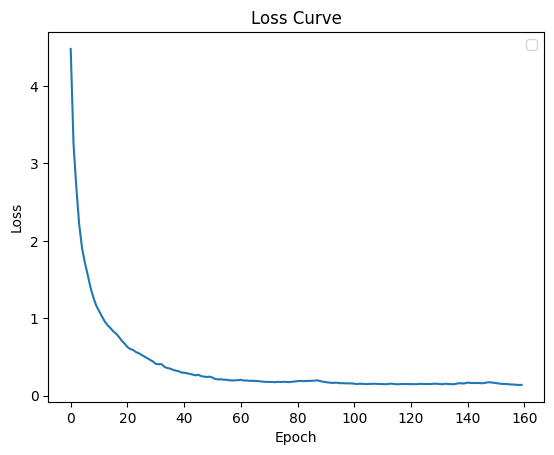

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tabnet_treat_best.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
#plt.savefig('tabnet/day_loss_curve.pdf')  # Save the figure
plt.show()

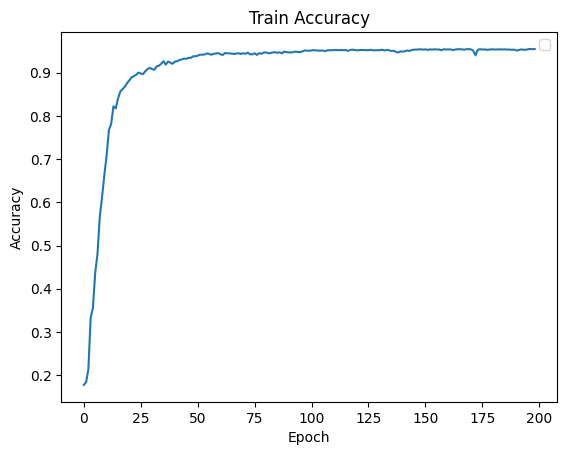

In [ ]:
# plot accuracy
plt.plot(tabnet_treat_best.history['train_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy')
plt.legend()
plt.savefig('tabnet/day_train_accuracy.pdf')  # Save the figure
plt.show()

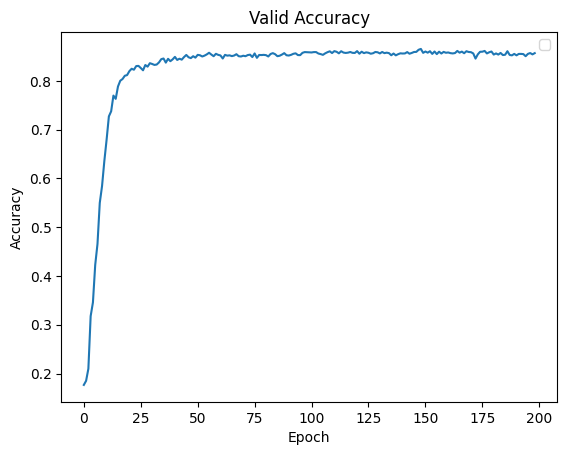

In [ ]:
plt.plot(tabnet_treat_best.history['valid_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Valid Accuracy')
plt.legend()
plt.savefig('tabnet/day_valid_accuracy.pdf')  # Save the figure
plt.show()

In [ ]:
# US
print(f"Best Valid score with Best Parameters: {tabnet_treat_best.best_cost}")
# Evaluate the best model
y_pred_best = tabnet_treat_best.predict(X_test_treat.values)
test_acc = accuracy_score(y_test_treat, y_pred_best)
print(f"Test Accuracy with Best Parameters: {test_acc}")

Best Valid score with Best Parameters: 0.8654223968565815
Test Accuracy with Best Parameters: 0.8601178781925344


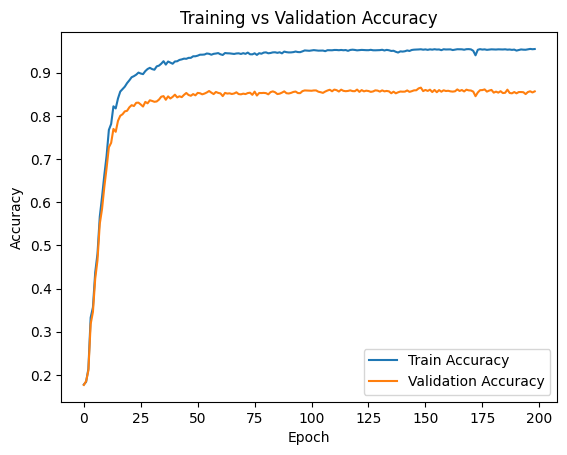

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(tabnet_treat_best.history['train_accuracy'], label='Train Accuracy')
plt.plot(tabnet_treat_best.history['valid_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.savefig('tabnet/day_training_vs_validation_accuracy.pdf')  # Save the figure
plt.show()



In [ ]:
# Save bet treatment model
#saved_filename = tabnet_treat_best.save_model('Day_Imbalanced_treatment_tabnet_test_model')
# define new model and load save parameters
import torch
#import optuna
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
tabnet_treat_best = TabNetClassifier()
tabnet_treat_best.load_model('Day_Imbalanced_treatment_tabnet_test_model.zip')

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:454: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full contro

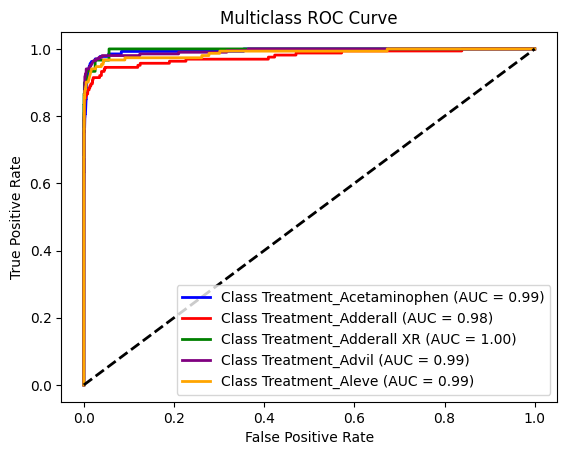

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities
y_proba = tabnet_treat_best.predict_proba(X_test_treat.values)

# Convert true labels to a binary one-vs-rest format
from sklearn.preprocessing import label_binarize
n_classes = len(label_encoder_treatments.classes_)  # Number of classes
y_test_bin = label_binarize(y_test_treat, classes=np.arange(n_classes))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green', 'purple', 'orange']  # Customize colors
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {label_encoder_treatments.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.savefig('tabnet/day_Multiclass_ROC_Curve.pdf')  # Save the figure
plt.show()


In [ ]:
explanations = tabnet_treat_best.explain(X_test_treat.values)
print(type(explanations))
print(explanations)


<class 'tuple'>
(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 4.01156712, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]]), {0: array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05594702, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.   

In [ ]:
masks = explanations[1]  # Extract masks (second element in tuple)
print("Number of feature names:", len(X_test_treat.columns))
print("Number of importance values:", len(feature_importance))


Number of feature names: 200
Number of importance values: 3


In [ ]:
import numpy as np
import pandas as pd

# Sum masks across all decision steps
# Shape of masks: (n_samples, n_features, n_steps)
#feature_importance = np.sum(masks, axis=(0, 2))  # Sum across samples and decision steps
feature_importance = np.sum(masks, axis=0)  # Sum across the valid axis

# Create a DataFrame to rank features
feature_names = X_test_treat.columns  # Ensure feature names match your dataset
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)


ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [ ]:
print(tabnet_treat_best)

TabNetClassifier(n_d=256, n_a=256, n_steps=3, gamma=1.0, cat_idxs=[], cat_dims=[], cat_emb_dim=[], n_independent=2, n_shared=2, epsilon=1e-15, momentum=0.02, lambda_sparse=0.00016422694204387488, seed=0, clip_value=1, verbose=1, optimizer_fn=<class 'torch.optim.adam.Adam'>, optimizer_params={'lr': 0.008271575943098035}, scheduler_fn=<class 'torch.optim.lr_scheduler.StepLR'>, scheduler_params={'gamma': 0.81, 'step_size': 48}, mask_type='sparsemax', input_dim=209, output_dim=100, device_name='auto', n_shared_decoder=1, n_indep_decoder=1, grouped_features=[])


### Main question2: Can we predict the condition based on past symptom and treatment?

In [ ]:
import pandas as pd
import datetime
data = pd.read_csv('data_top100US_CSWT.csv')
# Step 1: find what trackable_type for each user_id
condition_and_symptom_users = data.groupby('user_id')['trackable_type'].apply(lambda x: set(x)).reset_index()
# Step2: select those user_id has both Condition and Symtoms
valid_user_ids = condition_and_symptom_users[
    condition_and_symptom_users['trackable_type'].apply(lambda x: {'Condition', 'Symptom'}.issubset(x))]['user_id']
# Step 3: only keep the dataframe with these selcted user_id
data = data[data['user_id'].isin(valid_user_ids)]
## User-level aggregation
data_US = data[data['country']=='United States']
# Filter out weather entries that are not 'icon'
data_filtered = data_US[
    ~((data_US['trackable_type'] == 'Weather') & (data_US['trackable_name'] != 'icon'))
]
data_filtered.loc[data_filtered['trackable_type'] == 'Weather', 'trackable_name'] = \
    data_filtered.loc[data_filtered['trackable_type'] == 'Weather', 'trackable_value'].astype(str)
# Count the frequency of each trackable_name per user_id
aggregated_data = data_filtered.groupby(['user_id', 'trackable_type', 'trackable_name'])['checkin_date'].count().reset_index()

# Rename for clarity
aggregated_data = aggregated_data.rename(columns={'checkin_date': 'frequency'})


In [ ]:
# Count frequency per user, trackable_type, trackable_name, and checkin_date
aggregated_data_per_day = data_filtered.groupby( ['user_id', 'trackable_type', 'trackable_name', 'checkin_date'])['trackable_name'].count().reset_index(name='count')


In [ ]:
aggregated_data_per_day.head()

,user_id,trackable_type,trackable_name,checkin_date,count
0,QEVuQwEA+/tEquKas1s6wFVgiluL5A==,Condition,Anxiety,2017-02-16,1
1,QEVuQwEA+/tEquKas1s6wFVgiluL5A==,Condition,Diabetes,2017-02-15,1
2,QEVuQwEA+/tEquKas1s6wFVgiluL5A==,Condition,Diabetes,2017-02-16,1
3,QEVuQwEA+/tEquKas1s6wFVgiluL5A==,Condition,Hashimoto's thyroiditis,2017-02-15,1
4,QEVuQwEA+/tEquKas1s6wFVgiluL5A==,Condition,Hashimoto's thyroiditis,2017-02-16,1


In [ ]:
# Step 1: Define the required trackable types
required_types = {'Symptom', 'Treatment', 'Condition', 'Weather'}

# Step 2: Group by user_id and checkin_date, and collect the unique trackable_type values
grouped = data_filtered.groupby(['user_id', 'checkin_date'])['trackable_type'].apply(set).reset_index()

# Step 3: Filter groups where all required trackable types are present
valid_dates = grouped[grouped['trackable_type'].apply(lambda x: required_types.issubset(x))]

# Step 4: Filter the original data to keep only the valid user_id and checkin_date combinations
filtered_data = data_filtered.merge(valid_dates[['user_id', 'checkin_date']], on=['user_id', 'checkin_date'])


In [ ]:
aggregated_data_per_day = filtered_data.groupby( ['user_id', 'trackable_type', 'trackable_name', 'checkin_date'])['trackable_name'].count().reset_index(name='count')


In [ ]:
# Pivot the data to create one row per user with frequencies as values
aggregated_data_pivot = aggregated_data_per_day.pivot_table(
    index=['user_id','checkin_date'],
    columns=['trackable_type', 'trackable_name'],
    values='count',
    fill_value=0  # Fill missing values with 0
).reset_index()

# Flatten multi-level columns
aggregated_data_pivot.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in aggregated_data_pivot.columns]


In [ ]:
# Identify feature columns
symptom_cols = [col for col in aggregated_data_pivot.columns if col.startswith('Symptom_')]
treatment_cols = [col for col in aggregated_data_pivot.columns if col.startswith('Treatment_')]
weather_cols = [col for col in aggregated_data_pivot.columns if col.startswith('Weather_')]

# Identify target columns
condition_cols = [col for col in aggregated_data_pivot.columns if col.startswith('Condition_')]

####Predict Treatments by Conditions, Symptoms, and Weather
# Define X and y
X_condition = aggregated_data_pivot[symptom_cols ]
y_condition = aggregated_data_pivot[condition_cols].idxmax(axis=1)  # Choose the treatment with the highest value


In [ ]:
# TabNet requires numeric targets, so use LabelEncoder to encode y (which currently contains column names as strings) into numeric values.
from sklearn.preprocessing import LabelEncoder
label_encoder_condition = LabelEncoder()
y_condition_encoded = label_encoder_condition.fit_transform(y_condition)

In [ ]:
from collections import Counter

# Check class distribution
print("Class Distribution in y_condition_encoded:")
print(Counter(y_condition_encoded))


Class Distribution in y_condition_encoded:
Counter({8: 6818, 37: 2858, 27: 1978, 0: 1544, 22: 1500, 5: 1323, 10: 1224, 9: 1178, 18: 1133, 57: 962, 59: 953, 1: 783, 34: 641, 36: 597, 2: 527, 11: 471, 41: 468, 56: 463, 44: 445, 61: 443, 4: 374, 33: 371, 19: 355, 7: 354, 21: 313, 25: 311, 95: 297, 38: 282, 26: 272, 81: 253, 3: 240, 35: 231, 12: 217, 17: 212, 52: 190, 15: 182, 84: 178, 42: 175, 48: 135, 74: 126, 6: 125, 49: 118, 76: 117, 78: 114, 88: 109, 53: 107, 40: 103, 70: 98, 28: 92, 69: 88, 85: 88, 13: 84, 58: 82, 20: 78, 29: 77, 39: 76, 92: 74, 94: 71, 14: 67, 23: 54, 51: 52, 30: 51, 31: 50, 24: 45, 77: 42, 45: 41, 16: 40, 87: 40, 54: 39, 80: 37, 32: 36, 50: 36, 79: 33, 47: 24, 65: 20, 43: 18, 64: 17, 75: 11, 67: 11, 46: 11, 55: 11, 66: 9, 60: 9, 62: 8, 82: 8, 73: 7, 91: 5, 71: 4, 72: 3, 90: 3, 93: 3, 83: 2, 68: 2, 89: 1, 96: 1, 86: 1, 63: 1})


In [ ]:
from sklearn.model_selection import train_test_split

# Filter out classes with fewer than 5 samples
min_samples = 5
valid_classes = [cls for cls, count in Counter(y_condition_encoded).items() if count >= min_samples]
valid_mask = [y in valid_classes for y in y_condition_encoded]

# Filter X and y
X_condition_filtered = X_condition[valid_mask]
y_condition_filtered = y_condition_encoded[valid_mask]

# Check distribution again
print("Filtered Class Distribution (Min 5 Samples):")
print(Counter(y_condition_filtered))


from sklearn.model_selection import train_test_split

# Split into training and temporary sets (70% train, 30% temp)
X_train_cond, X_temp_cond, y_train_cond, y_temp_cond = train_test_split(
    X_condition_filtered, y_condition_filtered,  # Or use y_condition_combined
    test_size=0.3,
    random_state=42,
    stratify=y_condition_filtered  # Or y_condition_combined
)

# Split temporary set into validation and test sets (50% each of temp set)
X_valid_cond, X_test_cond, y_valid_cond, y_test_cond = train_test_split(
    X_temp_cond, y_temp_cond,
    test_size=0.5,
    random_state=42,
    stratify=y_temp_cond
)
## becuase of the imbalnce we use train_test_split with stratify
# Split into training and temporary sets (70% train, 30% temp)
#X_train_cond, X_temp_cond, y_train_cond, y_temp_cond = train_test_split(
#    X_condition, y_condition_encoded,
#    test_size=0.3,
#    random_state=42,
#    stratify=y_condition_encoded
#)

# Split temporary set into validation and test sets (50% each of temp set)
#X_valid_cond, X_test_cond, y_valid_cond, y_test_cond = train_test_split(
#    X_temp_cond, y_temp_cond,
#    test_size=0.5,
#    random_state=42,
#    stratify=y_temp_cond
#)


Filtered Class Distribution (Min 5 Samples):
Counter({8: 6818, 37: 2858, 27: 1978, 0: 1544, 22: 1500, 5: 1323, 10: 1224, 9: 1178, 18: 1133, 57: 962, 59: 953, 1: 783, 34: 641, 36: 597, 2: 527, 11: 471, 41: 468, 56: 463, 44: 445, 61: 443, 4: 374, 33: 371, 19: 355, 7: 354, 21: 313, 25: 311, 95: 297, 38: 282, 26: 272, 81: 253, 3: 240, 35: 231, 12: 217, 17: 212, 52: 190, 15: 182, 84: 178, 42: 175, 48: 135, 74: 126, 6: 125, 49: 118, 76: 117, 78: 114, 88: 109, 53: 107, 40: 103, 70: 98, 28: 92, 69: 88, 85: 88, 13: 84, 58: 82, 20: 78, 29: 77, 39: 76, 92: 74, 94: 71, 14: 67, 23: 54, 51: 52, 30: 51, 31: 50, 24: 45, 77: 42, 45: 41, 16: 40, 87: 40, 54: 39, 80: 37, 32: 36, 50: 36, 79: 33, 47: 24, 65: 20, 43: 18, 64: 17, 75: 11, 67: 11, 46: 11, 55: 11, 66: 9, 60: 9, 62: 8, 82: 8, 73: 7, 91: 5})


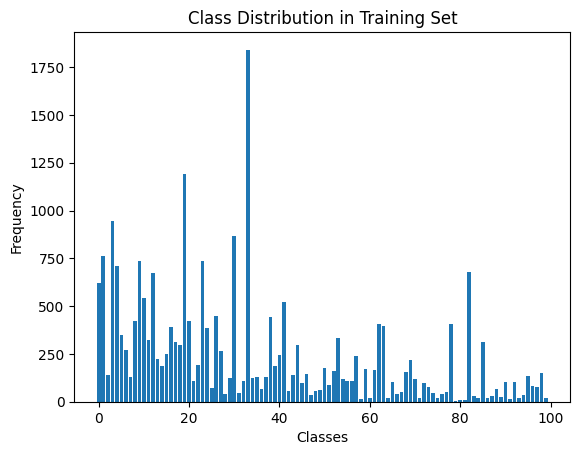

In [ ]:
from collections import Counter

import matplotlib.pyplot as plt

# Plot class distribution
class_counts = Counter(y_train_treat)
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.title("Class Distribution in Training Set")
#plt.savefig('tabnet/train_treat_imbalance.pdf')
plt.show()

In [ ]:
import torch
import optuna
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def objective(trial):
    # Sample hyperparameters
    n_d = trial.suggest_categorical("n_d", [128, 256])
    n_a = trial.suggest_categorical("n_a", [128, 256])
    n_steps = trial.suggest_int("n_steps", 3, 10)
    gamma = trial.suggest_float("gamma", 1.0, 2.0, step=0.1)
    lambda_sparse = trial.suggest_float("lambda_sparse", 1e-5, 1e-3, log=True)
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical("batch_size", [1024,2048,4096, 8192])
    virtual_batch_size = trial.suggest_categorical("virtual_batch_size", [64, 128, 512, 1024])
    scheduler_gamma = trial.suggest_float("scheduler_gamma", 0.8, 0.99, step=0.01)
    step_size = trial.suggest_int("step_size", 10, 50)

    # Initialize TabNetClassifier with sampled hyperparameters
    clf = TabNetClassifier(
        n_d=n_d, n_a=n_a, n_steps=n_steps, gamma=gamma,
        lambda_sparse=lambda_sparse, optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=learning_rate),
        scheduler_params={"gamma": scheduler_gamma, "step_size": step_size},
        scheduler_fn=torch.optim.lr_scheduler.StepLR,
        epsilon=1e-15
    )

    # Train the model with the sampled batch_size and virtual_batch_size
    clf.fit(
        X_train=X_train_cond.values, y_train=y_train_cond,
        eval_set=[(X_valid_cond.values, y_valid_cond)],
        eval_name=["valid"],
        max_epochs=20, patience=5,
        batch_size=batch_size, virtual_batch_size=virtual_batch_size
    )

    # Predict and evaluate performance
    y_pred = clf.predict(X_valid_cond.values)
    accuracy = accuracy_score(y_valid_cond, y_pred)

    return accuracy  # Return validation accuracy as the objective


In [ ]:
# Create a study and optimize the objective function
study_cond = optuna.create_study(direction="maximize")  # Maximize accuracy
study_cond.optimize(objective, n_trials= 50)  # Try 20 different hyperparameter combinations
# Print the best hyperparameters
print("Best Hyperparameters:", study_cond.best_params)

[I 2024-11-26 04:52:07,350] A new study created in memory with name: no-name-5f901116-e5b8-4c29-9e04-aed92d723274
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 6.64712 | valid_accuracy: 0.20429 |  0:00:05s
epoch 1  | loss: 4.34994 | valid_accuracy: 0.20901 |  0:00:07s
epoch 2  | loss: 3.77943 | valid_accuracy: 0.19681 |  0:00:08s
epoch 3  | loss: 3.44992 | valid_accuracy: 0.24184 |  0:00:11s
epoch 4  | loss: 3.16856 | valid_accuracy: 0.2326  |  0:00:12s
epoch 5  | loss: 2.89585 | valid_accuracy: 0.24853 |  0:00:14s
epoch 6  | loss: 2.74524 | valid_accuracy: 0.24086 |  0:00:17s
epoch 7  | loss: 2.69428 | valid_accuracy: 0.27507 |  0:00:19s
epoch 8  | loss: 2.67654 | valid_accuracy: 0.29198 |  0:00:21s
epoch 9  | loss: 2.60811 | valid_accuracy: 0.25206 |  0:00:23s
epoch 10 | loss: 2.54702 | valid_accuracy: 0.28982 |  0:00:25s
epoch 11 | loss: 2.41889 | valid_accuracy: 0.33012 |  0:00:27s
epoch 12 | loss: 2.34532 | valid_accuracy: 0.32442 |  0:00:29s
epoch 13 | loss: 2.3063  | valid_accuracy: 0.33602 |  0:00:32s
epoch 14 | loss: 2.2594  | valid_accuracy: 0.35981 |  0:00:34s
epoch 15 | loss: 2.16784 | valid_accuracy: 0.37652 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:53:03,713] Trial 0 finished with value: 0.4602831301612269 and parameters: {'n_d': 128, 'n_a': 256, 'n_steps': 8, 'gamma': 1.3, 'lambda_sparse': 0.00011222519460429248, 'learning_rate': 0.008961234647816667, 'batch_size': 2048, 'virtual_batch_size': 128, 'scheduler_gamma': 0.8700000000000001, 'step_size': 10}. Best is trial 0 with value: 0.4602831301612269.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 9.86289 | valid_accuracy: 0.00649 |  0:00:01s
epoch 1  | loss: 9.54736 | valid_accuracy: 0.00275 |  0:00:03s
epoch 2  | loss: 9.2341  | valid_accuracy: 0.00315 |  0:00:05s
epoch 3  | loss: 9.00612 | valid_accuracy: 0.02241 |  0:00:06s
epoch 4  | loss: 8.68668 | valid_accuracy: 0.03107 |  0:00:08s
epoch 5  | loss: 8.37719 | valid_accuracy: 0.02241 |  0:00:09s
epoch 6  | loss: 8.09702 | valid_accuracy: 0.02674 |  0:00:10s
epoch 7  | loss: 7.80055 | valid_accuracy: 0.02635 |  0:00:12s
epoch 8  | loss: 7.54088 | valid_accuracy: 0.03126 |  0:00:13s
epoch 9  | loss: 7.28828 | valid_accuracy: 0.03657 |  0:00:14s
epoch 10 | loss: 7.05505 | valid_accuracy: 0.03991 |  0:00:16s
epoch 11 | loss: 6.87511 | valid_accuracy: 0.06626 |  0:00:17s
epoch 12 | loss: 6.61906 | valid_accuracy: 0.09949 |  0:00:19s
epoch 13 | loss: 6.40093 | valid_accuracy: 0.11443 |  0:00:20s
epoch 14 | loss: 6.14963 | valid_accuracy: 0.10873 |  0:00:22s
epoch 15 | loss: 5.99393 | valid_accuracy: 0.12171 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:53:34,319] Trial 1 finished with value: 0.16240660637042864 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 6, 'gamma': 1.5, 'lambda_sparse': 1.4267940118175972e-05, 'learning_rate': 0.00013898611392841744, 'batch_size': 4096, 'virtual_batch_size': 512, 'scheduler_gamma': 0.9500000000000001, 'step_size': 43}. Best is trial 0 with value: 0.4602831301612269.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 7.51298 | valid_accuracy: 0.17361 |  0:00:01s
epoch 1  | loss: 5.14025 | valid_accuracy: 0.20134 |  0:00:02s
epoch 2  | loss: 4.22023 | valid_accuracy: 0.20173 |  0:00:04s
epoch 3  | loss: 3.92512 | valid_accuracy: 0.20094 |  0:00:05s
epoch 4  | loss: 3.60559 | valid_accuracy: 0.20527 |  0:00:06s
epoch 5  | loss: 3.33944 | valid_accuracy: 0.19878 |  0:00:07s
epoch 6  | loss: 3.13312 | valid_accuracy: 0.20094 |  0:00:08s
epoch 7  | loss: 2.98413 | valid_accuracy: 0.20094 |  0:00:09s
epoch 8  | loss: 2.83386 | valid_accuracy: 0.20389 |  0:00:10s
epoch 9  | loss: 2.71316 | valid_accuracy: 0.21097 |  0:00:11s
epoch 10 | loss: 2.60404 | valid_accuracy: 0.21195 |  0:00:12s
epoch 11 | loss: 2.46501 | valid_accuracy: 0.20822 |  0:00:13s
epoch 12 | loss: 2.39244 | valid_accuracy: 0.20134 |  0:00:17s
epoch 13 | loss: 2.33047 | valid_accuracy: 0.2033  |  0:00:20s
epoch 14 | loss: 2.214   | valid_accuracy: 0.21589 |  0:00:22s
epoch 15 | loss: 2.14677 | valid_accuracy: 0.20684 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:54:07,807] Trial 2 finished with value: 0.22453794730633111 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 4, 'gamma': 1.0, 'lambda_sparse': 0.00010428369824850886, 'learning_rate': 0.0089798030482421, 'batch_size': 8192, 'virtual_batch_size': 64, 'scheduler_gamma': 0.8200000000000001, 'step_size': 23}. Best is trial 0 with value: 0.4602831301612269.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 9.40374 | valid_accuracy: 0.18109 |  0:00:01s
epoch 1  | loss: 6.14662 | valid_accuracy: 0.05545 |  0:00:02s
epoch 2  | loss: 5.01869 | valid_accuracy: 0.0989  |  0:00:03s
epoch 3  | loss: 4.31508 | valid_accuracy: 0.21038 |  0:00:04s
epoch 4  | loss: 3.74754 | valid_accuracy: 0.22375 |  0:00:05s
epoch 5  | loss: 3.45827 | valid_accuracy: 0.22395 |  0:00:06s
epoch 6  | loss: 3.1948  | valid_accuracy: 0.21962 |  0:00:07s
epoch 7  | loss: 3.08457 | valid_accuracy: 0.2908  |  0:00:08s
epoch 8  | loss: 2.91582 | valid_accuracy: 0.30672 |  0:00:10s
epoch 9  | loss: 2.76164 | valid_accuracy: 0.30515 |  0:00:13s
epoch 10 | loss: 2.5962  | valid_accuracy: 0.3315  |  0:00:15s
epoch 11 | loss: 2.37922 | valid_accuracy: 0.31243 |  0:00:18s
epoch 12 | loss: 2.36048 | valid_accuracy: 0.33346 |  0:00:19s
epoch 13 | loss: 2.48276 | valid_accuracy: 0.35529 |  0:00:20s
epoch 14 | loss: 2.34277 | valid_accuracy: 0.36453 |  0:00:21s
epoch 15 | loss: 2.28249 | valid_accuracy: 0.39953 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:54:36,994] Trial 3 finished with value: 0.4630357845064884 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 10, 'gamma': 1.1, 'lambda_sparse': 0.00043531070052296494, 'learning_rate': 0.0028942689260908682, 'batch_size': 2048, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.8, 'step_size': 38}. Best is trial 3 with value: 0.4630357845064884.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 5.08069 | valid_accuracy: 0.21215 |  0:00:02s
epoch 1  | loss: 3.44119 | valid_accuracy: 0.25914 |  0:00:03s
epoch 2  | loss: 2.93222 | valid_accuracy: 0.23968 |  0:00:04s
epoch 3  | loss: 2.58676 | valid_accuracy: 0.26799 |  0:00:06s
epoch 4  | loss: 2.3818  | valid_accuracy: 0.28018 |  0:00:08s
epoch 5  | loss: 2.19474 | valid_accuracy: 0.29198 |  0:00:09s
epoch 6  | loss: 1.98982 | valid_accuracy: 0.33366 |  0:00:11s
epoch 7  | loss: 1.84668 | valid_accuracy: 0.3604  |  0:00:13s
epoch 8  | loss: 1.71532 | valid_accuracy: 0.384   |  0:00:15s
epoch 9  | loss: 1.61278 | valid_accuracy: 0.40051 |  0:00:18s
epoch 10 | loss: 1.5118  | valid_accuracy: 0.39796 |  0:00:23s
epoch 11 | loss: 1.43786 | valid_accuracy: 0.42745 |  0:00:26s
epoch 12 | loss: 1.35864 | valid_accuracy: 0.47464 |  0:00:27s
epoch 13 | loss: 1.30977 | valid_accuracy: 0.48309 |  0:00:28s
epoch 14 | loss: 1.2497  | valid_accuracy: 0.50079 |  0:00:30s
epoch 15 | loss: 1.17974 | valid_accuracy: 0.52713 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:55:16,183] Trial 4 finished with value: 0.624852536374361 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 3, 'gamma': 1.9, 'lambda_sparse': 1.21831431099832e-05, 'learning_rate': 0.004555070571260923, 'batch_size': 2048, 'virtual_batch_size': 64, 'scheduler_gamma': 0.8700000000000001, 'step_size': 43}. Best is trial 4 with value: 0.624852536374361.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 9.54236 | valid_accuracy: 0.18423 |  0:00:01s
epoch 1  | loss: 6.64517 | valid_accuracy: 0.20783 |  0:00:02s
epoch 2  | loss: 5.18363 | valid_accuracy: 0.12328 |  0:00:04s
epoch 3  | loss: 4.41386 | valid_accuracy: 0.0932  |  0:00:05s
epoch 4  | loss: 4.00494 | valid_accuracy: 0.12937 |  0:00:06s
epoch 5  | loss: 3.73635 | valid_accuracy: 0.18856 |  0:00:07s
epoch 6  | loss: 3.5334  | valid_accuracy: 0.17007 |  0:00:08s

Early stopping occurred at epoch 6 with best_epoch = 1 and best_valid_accuracy = 0.20783


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:55:26,188] Trial 5 finished with value: 0.20782540306724342 and parameters: {'n_d': 128, 'n_a': 256, 'n_steps': 9, 'gamma': 1.0, 'lambda_sparse': 1.0080361069200087e-05, 'learning_rate': 0.0031853092011040578, 'batch_size': 4096, 'virtual_batch_size': 512, 'scheduler_gamma': 0.9700000000000001, 'step_size': 14}. Best is trial 4 with value: 0.624852536374361.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 11.21981| valid_accuracy: 0.15238 |  0:00:03s
epoch 1  | loss: 9.477   | valid_accuracy: 0.14235 |  0:00:06s
epoch 2  | loss: 8.0093  | valid_accuracy: 0.13763 |  0:00:11s
epoch 3  | loss: 7.02496 | valid_accuracy: 0.1107  |  0:00:14s
epoch 4  | loss: 6.66516 | valid_accuracy: 0.13114 |  0:00:17s
epoch 5  | loss: 6.41409 | valid_accuracy: 0.14471 |  0:00:21s

Early stopping occurred at epoch 5 with best_epoch = 0 and best_valid_accuracy = 0.15238


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:55:53,766] Trial 6 finished with value: 0.15237907982697602 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 10, 'gamma': 1.5, 'lambda_sparse': 3.440632911290632e-05, 'learning_rate': 0.0011897830188696643, 'batch_size': 1024, 'virtual_batch_size': 128, 'scheduler_gamma': 0.9500000000000001, 'step_size': 12}. Best is trial 4 with value: 0.624852536374361.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 12.74915| valid_accuracy: 0.0639  |  0:00:02s
epoch 1  | loss: 8.63058 | valid_accuracy: 0.13744 |  0:00:05s
epoch 2  | loss: 6.49924 | valid_accuracy: 0.20429 |  0:00:08s
epoch 3  | loss: 5.37106 | valid_accuracy: 0.20586 |  0:00:10s
epoch 4  | loss: 4.84729 | valid_accuracy: 0.22061 |  0:00:12s
epoch 5  | loss: 4.41314 | valid_accuracy: 0.21982 |  0:00:16s
epoch 6  | loss: 4.17582 | valid_accuracy: 0.23024 |  0:00:17s
epoch 7  | loss: 3.95907 | valid_accuracy: 0.24617 |  0:00:19s
epoch 8  | loss: 3.74751 | valid_accuracy: 0.26504 |  0:00:22s
epoch 9  | loss: 3.55365 | valid_accuracy: 0.26327 |  0:00:23s
epoch 10 | loss: 3.42489 | valid_accuracy: 0.28647 |  0:00:25s
epoch 11 | loss: 3.30296 | valid_accuracy: 0.31852 |  0:00:28s
epoch 12 | loss: 3.12828 | valid_accuracy: 0.32049 |  0:00:31s
epoch 13 | loss: 3.00387 | valid_accuracy: 0.31046 |  0:00:32s
epoch 14 | loss: 2.90369 | valid_accuracy: 0.33052 |  0:00:34s
epoch 15 | loss: 2.8903  | valid_accuracy: 0.38655 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:56:39,205] Trial 7 finished with value: 0.41977978765237906 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 9, 'gamma': 1.1, 'lambda_sparse': 0.0004287786603161693, 'learning_rate': 0.0008285534651183867, 'batch_size': 2048, 'virtual_batch_size': 512, 'scheduler_gamma': 0.8200000000000001, 'step_size': 39}. Best is trial 4 with value: 0.624852536374361.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 9.57839 | valid_accuracy: 0.03795 |  0:00:01s
epoch 1  | loss: 9.71103 | valid_accuracy: 0.02143 |  0:00:02s
epoch 2  | loss: 9.67052 | valid_accuracy: 0.02025 |  0:00:03s
epoch 3  | loss: 9.70215 | valid_accuracy: 0.01475 |  0:00:04s
epoch 4  | loss: 9.66996 | valid_accuracy: 0.02281 |  0:00:05s
epoch 5  | loss: 9.62888 | valid_accuracy: 0.02556 |  0:00:06s

Early stopping occurred at epoch 5 with best_epoch = 0 and best_valid_accuracy = 0.03795


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:56:46,592] Trial 8 finished with value: 0.03794730633110499 and parameters: {'n_d': 128, 'n_a': 256, 'n_steps': 7, 'gamma': 1.9, 'lambda_sparse': 0.00034420015174836926, 'learning_rate': 0.00010279342240841089, 'batch_size': 8192, 'virtual_batch_size': 512, 'scheduler_gamma': 0.8700000000000001, 'step_size': 47}. Best is trial 4 with value: 0.624852536374361.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.16535 | valid_accuracy: 0.22827 |  0:00:03s
epoch 1  | loss: 2.91238 | valid_accuracy: 0.21982 |  0:00:06s
epoch 2  | loss: 2.52936 | valid_accuracy: 0.23044 |  0:00:08s
epoch 3  | loss: 2.19415 | valid_accuracy: 0.28667 |  0:00:11s
epoch 4  | loss: 1.88114 | valid_accuracy: 0.36138 |  0:00:13s
epoch 5  | loss: 1.64743 | valid_accuracy: 0.43885 |  0:00:15s
epoch 6  | loss: 1.51365 | valid_accuracy: 0.46599 |  0:00:16s
epoch 7  | loss: 1.3777  | valid_accuracy: 0.5173  |  0:00:17s
epoch 8  | loss: 1.24334 | valid_accuracy: 0.55722 |  0:00:18s
epoch 9  | loss: 1.15874 | valid_accuracy: 0.62387 |  0:00:19s
epoch 10 | loss: 1.09062 | valid_accuracy: 0.64215 |  0:00:20s
epoch 11 | loss: 1.02972 | valid_accuracy: 0.69052 |  0:00:21s
epoch 12 | loss: 0.95395 | valid_accuracy: 0.70999 |  0:00:23s
epoch 13 | loss: 0.90324 | valid_accuracy: 0.73653 |  0:00:24s
epoch 14 | loss: 0.86667 | valid_accuracy: 0.74027 |  0:00:25s
epoch 15 | loss: 0.82267 | valid_accuracy: 0.77251 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:57:22,546] Trial 9 finished with value: 0.7911915060951632 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 4, 'gamma': 1.9, 'lambda_sparse': 0.00010945579880533157, 'learning_rate': 0.0064334977332526615, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.88, 'step_size': 11}. Best is trial 9 with value: 0.7911915060951632.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 7.46398 | valid_accuracy: 0.16752 |  0:00:01s
epoch 1  | loss: 5.29836 | valid_accuracy: 0.20684 |  0:00:03s
epoch 2  | loss: 4.40734 | valid_accuracy: 0.20842 |  0:00:04s
epoch 3  | loss: 3.89885 | valid_accuracy: 0.22061 |  0:00:06s
epoch 4  | loss: 3.53046 | valid_accuracy: 0.22552 |  0:00:09s
epoch 5  | loss: 3.2688  | valid_accuracy: 0.21982 |  0:00:12s
epoch 6  | loss: 3.08582 | valid_accuracy: 0.24459 |  0:00:14s
epoch 7  | loss: 3.06171 | valid_accuracy: 0.256   |  0:00:16s
epoch 8  | loss: 2.98008 | valid_accuracy: 0.29257 |  0:00:18s
epoch 9  | loss: 2.85492 | valid_accuracy: 0.32186 |  0:00:19s
epoch 10 | loss: 2.67746 | valid_accuracy: 0.35195 |  0:00:21s
epoch 11 | loss: 2.54495 | valid_accuracy: 0.3547  |  0:00:23s
epoch 12 | loss: 2.40366 | valid_accuracy: 0.39855 |  0:00:25s
epoch 13 | loss: 2.2913  | valid_accuracy: 0.41447 |  0:00:28s
epoch 14 | loss: 2.17222 | valid_accuracy: 0.46677 |  0:00:30s
epoch 15 | loss: 2.07905 | valid_accuracy: 0.48683 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:58:03,651] Trial 10 finished with value: 0.5719622493118364 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 5, 'gamma': 2.0, 'lambda_sparse': 4.043194432243393e-05, 'learning_rate': 0.0004464489600267761, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.91, 'step_size': 25}. Best is trial 9 with value: 0.7911915060951632.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.77337 | valid_accuracy: 0.23319 |  0:00:02s
epoch 1  | loss: 3.39137 | valid_accuracy: 0.20075 |  0:00:03s
epoch 2  | loss: 2.90194 | valid_accuracy: 0.23122 |  0:00:05s
epoch 3  | loss: 2.55165 | valid_accuracy: 0.26347 |  0:00:07s
epoch 4  | loss: 2.27053 | valid_accuracy: 0.28451 |  0:00:08s
epoch 5  | loss: 2.01825 | valid_accuracy: 0.3195  |  0:00:10s
epoch 6  | loss: 1.82296 | valid_accuracy: 0.39776 |  0:00:12s
epoch 7  | loss: 1.67408 | valid_accuracy: 0.50944 |  0:00:14s
epoch 8  | loss: 1.56561 | valid_accuracy: 0.55564 |  0:00:16s
epoch 9  | loss: 1.47326 | valid_accuracy: 0.61227 |  0:00:17s
epoch 10 | loss: 1.3723  | valid_accuracy: 0.65769 |  0:00:19s
epoch 11 | loss: 1.3079  | valid_accuracy: 0.6746  |  0:00:21s
epoch 12 | loss: 1.25167 | valid_accuracy: 0.69799 |  0:00:22s
epoch 13 | loss: 1.18142 | valid_accuracy: 0.71884 |  0:00:24s
epoch 14 | loss: 1.13753 | valid_accuracy: 0.73142 |  0:00:26s
epoch 15 | loss: 1.09226 | valid_accuracy: 0.74381 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:58:40,403] Trial 11 finished with value: 0.7825403067243414 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.8, 'lambda_sparse': 4.693487491503556e-05, 'learning_rate': 0.0034700270158204284, 'batch_size': 1024, 'virtual_batch_size': 64, 'scheduler_gamma': 0.9, 'step_size': 33}. Best is trial 9 with value: 0.7911915060951632.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 5.39855 | valid_accuracy: 0.19505 |  0:00:01s
epoch 1  | loss: 3.76065 | valid_accuracy: 0.21628 |  0:00:04s
epoch 2  | loss: 3.2968  | valid_accuracy: 0.21156 |  0:00:05s
epoch 3  | loss: 2.93873 | valid_accuracy: 0.23987 |  0:00:07s
epoch 4  | loss: 2.60148 | valid_accuracy: 0.25128 |  0:00:09s
epoch 5  | loss: 2.34454 | valid_accuracy: 0.30102 |  0:00:10s
epoch 6  | loss: 2.18036 | valid_accuracy: 0.35843 |  0:00:12s
epoch 7  | loss: 2.01161 | valid_accuracy: 0.43689 |  0:00:13s
epoch 8  | loss: 1.86018 | valid_accuracy: 0.47975 |  0:00:15s
epoch 9  | loss: 1.74952 | valid_accuracy: 0.53854 |  0:00:18s
epoch 10 | loss: 1.6614  | valid_accuracy: 0.58691 |  0:00:20s
epoch 11 | loss: 1.56452 | valid_accuracy: 0.61365 |  0:00:21s
epoch 12 | loss: 1.49706 | valid_accuracy: 0.65415 |  0:00:23s
epoch 13 | loss: 1.4174  | valid_accuracy: 0.67204 |  0:00:24s
epoch 14 | loss: 1.35894 | valid_accuracy: 0.67932 |  0:00:26s
epoch 15 | loss: 1.29101 | valid_accuracy: 0.70861 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:59:22,633] Trial 12 finished with value: 0.7483287455760912 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.7000000000000002, 'lambda_sparse': 4.619497172463102e-05, 'learning_rate': 0.0017940665267926078, 'batch_size': 1024, 'virtual_batch_size': 64, 'scheduler_gamma': 0.9, 'step_size': 32}. Best is trial 9 with value: 0.7911915060951632.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.65275 | valid_accuracy: 0.21864 |  0:00:01s
epoch 1  | loss: 3.12048 | valid_accuracy: 0.25895 |  0:00:05s
epoch 2  | loss: 2.74251 | valid_accuracy: 0.26799 |  0:00:06s
epoch 3  | loss: 2.31618 | valid_accuracy: 0.28982 |  0:00:08s
epoch 4  | loss: 2.0574  | valid_accuracy: 0.36315 |  0:00:10s
epoch 5  | loss: 1.92771 | valid_accuracy: 0.35942 |  0:00:11s
epoch 6  | loss: 1.75933 | valid_accuracy: 0.38262 |  0:00:13s
epoch 7  | loss: 1.62822 | valid_accuracy: 0.42764 |  0:00:16s
epoch 8  | loss: 1.529   | valid_accuracy: 0.47464 |  0:00:18s
epoch 9  | loss: 1.42759 | valid_accuracy: 0.56252 |  0:00:21s
epoch 10 | loss: 1.30294 | valid_accuracy: 0.59713 |  0:00:22s
epoch 11 | loss: 1.16752 | valid_accuracy: 0.66791 |  0:00:24s
epoch 12 | loss: 1.07894 | valid_accuracy: 0.70134 |  0:00:25s
epoch 13 | loss: 1.00648 | valid_accuracy: 0.70527 |  0:00:26s
epoch 14 | loss: 0.9746  | valid_accuracy: 0.7267  |  0:00:27s
epoch 15 | loss: 0.93152 | valid_accuracy: 0.75364 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 04:59:59,183] Trial 13 finished with value: 0.7902084152575698 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 5, 'gamma': 1.7000000000000002, 'lambda_sparse': 0.00016070436770756265, 'learning_rate': 0.005005392060271263, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.92, 'step_size': 30}. Best is trial 9 with value: 0.7911915060951632.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.48857 | valid_accuracy: 0.24872 |  0:00:00s
epoch 1  | loss: 3.10845 | valid_accuracy: 0.25973 |  0:00:02s
epoch 2  | loss: 2.62873 | valid_accuracy: 0.26701 |  0:00:02s
epoch 3  | loss: 2.38668 | valid_accuracy: 0.27586 |  0:00:04s
epoch 4  | loss: 2.11901 | valid_accuracy: 0.32383 |  0:00:05s
epoch 5  | loss: 1.82131 | valid_accuracy: 0.38694 |  0:00:06s
epoch 6  | loss: 1.61823 | valid_accuracy: 0.45615 |  0:00:07s
epoch 7  | loss: 1.46297 | valid_accuracy: 0.52871 |  0:00:08s
epoch 8  | loss: 1.3614  | valid_accuracy: 0.57668 |  0:00:10s
epoch 9  | loss: 1.23784 | valid_accuracy: 0.60873 |  0:00:11s
epoch 10 | loss: 1.14425 | valid_accuracy: 0.6398  |  0:00:12s
epoch 11 | loss: 1.12768 | valid_accuracy: 0.64864 |  0:00:13s
epoch 12 | loss: 1.07025 | valid_accuracy: 0.68482 |  0:00:14s
epoch 13 | loss: 1.03904 | valid_accuracy: 0.71136 |  0:00:15s
epoch 14 | loss: 0.97823 | valid_accuracy: 0.72788 |  0:00:16s
epoch 15 | loss: 0.92342 | valid_accuracy: 0.74577 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:00:22,447] Trial 14 finished with value: 0.7713330711757767 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 5, 'gamma': 1.7000000000000002, 'lambda_sparse': 0.0001711807672128181, 'learning_rate': 0.006195636809356954, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.93, 'step_size': 21}. Best is trial 9 with value: 0.7911915060951632.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 7.69685 | valid_accuracy: 0.10893 |  0:00:01s
epoch 1  | loss: 5.81361 | valid_accuracy: 0.19603 |  0:00:02s
epoch 2  | loss: 4.63422 | valid_accuracy: 0.19367 |  0:00:03s
epoch 3  | loss: 4.02902 | valid_accuracy: 0.20527 |  0:00:04s
epoch 4  | loss: 3.68672 | valid_accuracy: 0.20527 |  0:00:05s
epoch 5  | loss: 3.48906 | valid_accuracy: 0.2151  |  0:00:06s
epoch 6  | loss: 3.1768  | valid_accuracy: 0.24046 |  0:00:07s
epoch 7  | loss: 2.91347 | valid_accuracy: 0.25639 |  0:00:08s
epoch 8  | loss: 2.65177 | valid_accuracy: 0.28588 |  0:00:09s
epoch 9  | loss: 2.49485 | valid_accuracy: 0.33169 |  0:00:10s
epoch 10 | loss: 2.31698 | valid_accuracy: 0.36827 |  0:00:12s
epoch 11 | loss: 2.17438 | valid_accuracy: 0.41762 |  0:00:13s
epoch 12 | loss: 2.06959 | valid_accuracy: 0.47228 |  0:00:14s
epoch 13 | loss: 1.96348 | valid_accuracy: 0.51534 |  0:00:15s
epoch 14 | loss: 1.88717 | valid_accuracy: 0.54345 |  0:00:16s
epoch 15 | loss: 1.83822 | valid_accuracy: 0.56292 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:00:45,711] Trial 15 finished with value: 0.6311443177349587 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 5, 'gamma': 1.6, 'lambda_sparse': 0.0002125081451140817, 'learning_rate': 0.00044700271822660173, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.99, 'step_size': 20}. Best is trial 9 with value: 0.7911915060951632.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 6.78348 | valid_accuracy: 0.19052 |  0:00:01s
epoch 1  | loss: 4.63156 | valid_accuracy: 0.21313 |  0:00:02s
epoch 2  | loss: 3.75313 | valid_accuracy: 0.19976 |  0:00:04s
epoch 3  | loss: 3.48571 | valid_accuracy: 0.21097 |  0:00:05s
epoch 4  | loss: 3.24806 | valid_accuracy: 0.24263 |  0:00:06s
epoch 5  | loss: 3.04209 | valid_accuracy: 0.26013 |  0:00:07s
epoch 6  | loss: 2.86886 | valid_accuracy: 0.28254 |  0:00:09s
epoch 7  | loss: 2.6664  | valid_accuracy: 0.30279 |  0:00:10s
epoch 8  | loss: 2.47014 | valid_accuracy: 0.34939 |  0:00:11s
epoch 9  | loss: 2.31517 | valid_accuracy: 0.40208 |  0:00:12s
epoch 10 | loss: 2.17242 | valid_accuracy: 0.43177 |  0:00:13s
epoch 11 | loss: 1.9931  | valid_accuracy: 0.49135 |  0:00:15s
epoch 12 | loss: 1.91262 | valid_accuracy: 0.54601 |  0:00:16s
epoch 13 | loss: 1.80082 | valid_accuracy: 0.56744 |  0:00:18s
epoch 14 | loss: 1.7167  | valid_accuracy: 0.58828 |  0:00:19s
epoch 15 | loss: 1.6493  | valid_accuracy: 0.60381 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:01:12,537] Trial 16 finished with value: 0.6742036964215493 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 6, 'gamma': 2.0, 'lambda_sparse': 0.00022660708535972402, 'learning_rate': 0.001903984872822578, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.8500000000000001, 'step_size': 17}. Best is trial 9 with value: 0.7911915060951632.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.20036 | valid_accuracy: 0.22906 |  0:00:00s
epoch 1  | loss: 2.64115 | valid_accuracy: 0.23751 |  0:00:02s
epoch 2  | loss: 2.14108 | valid_accuracy: 0.27153 |  0:00:03s
epoch 3  | loss: 1.80414 | valid_accuracy: 0.3372  |  0:00:04s
epoch 4  | loss: 1.6173  | valid_accuracy: 0.36571 |  0:00:05s
epoch 5  | loss: 1.45452 | valid_accuracy: 0.41545 |  0:00:06s
epoch 6  | loss: 1.31463 | valid_accuracy: 0.49607 |  0:00:07s
epoch 7  | loss: 1.19299 | valid_accuracy: 0.53048 |  0:00:08s
epoch 8  | loss: 1.11503 | valid_accuracy: 0.58632 |  0:00:09s
epoch 9  | loss: 1.02893 | valid_accuracy: 0.64019 |  0:00:10s
epoch 10 | loss: 0.94666 | valid_accuracy: 0.66339 |  0:00:11s
epoch 11 | loss: 0.87998 | valid_accuracy: 0.70547 |  0:00:12s
epoch 12 | loss: 0.84349 | valid_accuracy: 0.7501  |  0:00:12s
epoch 13 | loss: 0.78611 | valid_accuracy: 0.78018 |  0:00:13s
epoch 14 | loss: 0.7635  | valid_accuracy: 0.76681 |  0:00:14s
epoch 15 | loss: 0.7422  | valid_accuracy: 0.79532 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:01:33,711] Trial 17 finished with value: 0.8244199764058199 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.4, 'lambda_sparse': 0.000885164954033424, 'learning_rate': 0.006515439473299588, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.92, 'step_size': 27}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 7.08979 | valid_accuracy: 0.20291 |  0:00:00s
epoch 1  | loss: 4.55113 | valid_accuracy: 0.22257 |  0:00:00s
epoch 2  | loss: 3.63644 | valid_accuracy: 0.22257 |  0:00:01s
epoch 3  | loss: 3.18024 | valid_accuracy: 0.22434 |  0:00:01s
epoch 4  | loss: 2.89302 | valid_accuracy: 0.23221 |  0:00:02s
epoch 5  | loss: 2.67888 | valid_accuracy: 0.23417 |  0:00:02s
epoch 6  | loss: 2.48033 | valid_accuracy: 0.23201 |  0:00:03s
epoch 7  | loss: 2.29845 | valid_accuracy: 0.22886 |  0:00:03s
epoch 8  | loss: 2.20312 | valid_accuracy: 0.23634 |  0:00:04s
epoch 9  | loss: 2.07148 | valid_accuracy: 0.23063 |  0:00:04s
epoch 10 | loss: 1.92107 | valid_accuracy: 0.24715 |  0:00:05s
epoch 11 | loss: 1.8151  | valid_accuracy: 0.25206 |  0:00:05s
epoch 12 | loss: 1.71705 | valid_accuracy: 0.23339 |  0:00:06s
epoch 13 | loss: 1.64026 | valid_accuracy: 0.23299 |  0:00:06s
epoch 14 | loss: 1.59986 | valid_accuracy: 0.24046 |  0:00:07s
epoch 15 | loss: 1.52493 | valid_accuracy: 0.221   |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:01:42,844] Trial 18 finished with value: 0.2520644907589461 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.3, 'lambda_sparse': 0.0008412347640132373, 'learning_rate': 0.009875393509827348, 'batch_size': 8192, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.8500000000000001, 'step_size': 26}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 6.83339 | valid_accuracy: 0.08867 |  0:00:00s
epoch 1  | loss: 5.28381 | valid_accuracy: 0.1801  |  0:00:01s
epoch 2  | loss: 4.05307 | valid_accuracy: 0.19996 |  0:00:01s
epoch 3  | loss: 3.36335 | valid_accuracy: 0.20114 |  0:00:02s
epoch 4  | loss: 3.04372 | valid_accuracy: 0.20252 |  0:00:02s
epoch 5  | loss: 2.85554 | valid_accuracy: 0.20193 |  0:00:02s
epoch 6  | loss: 2.71306 | valid_accuracy: 0.20212 |  0:00:03s
epoch 7  | loss: 2.51066 | valid_accuracy: 0.20979 |  0:00:03s
epoch 8  | loss: 2.32982 | valid_accuracy: 0.20959 |  0:00:04s
epoch 9  | loss: 2.17456 | valid_accuracy: 0.21746 |  0:00:04s
epoch 10 | loss: 2.06852 | valid_accuracy: 0.21274 |  0:00:05s
epoch 11 | loss: 1.96641 | valid_accuracy: 0.21353 |  0:00:05s
epoch 12 | loss: 1.90046 | valid_accuracy: 0.21274 |  0:00:06s
epoch 13 | loss: 1.82582 | valid_accuracy: 0.21746 |  0:00:06s
epoch 14 | loss: 1.7466  | valid_accuracy: 0.20566 |  0:00:07s

Early stopping occurred at epoch 14 with best_epoch = 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:01:50,485] Trial 19 finished with value: 0.21745969327565867 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 4, 'gamma': 1.3, 'lambda_sparse': 0.0006932810800232666, 'learning_rate': 0.001808222009330089, 'batch_size': 4096, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.9400000000000001, 'step_size': 16}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 8.59423 | valid_accuracy: 0.18344 |  0:00:02s
epoch 1  | loss: 6.3505  | valid_accuracy: 0.1689  |  0:00:04s
epoch 2  | loss: 5.75593 | valid_accuracy: 0.14589 |  0:00:07s
epoch 3  | loss: 5.27708 | valid_accuracy: 0.17814 |  0:00:09s
epoch 4  | loss: 4.98076 | valid_accuracy: 0.18443 |  0:00:11s
epoch 5  | loss: 4.69305 | valid_accuracy: 0.1917  |  0:00:13s
epoch 6  | loss: 4.49968 | valid_accuracy: 0.2035  |  0:00:16s
epoch 7  | loss: 4.3239  | valid_accuracy: 0.24302 |  0:00:18s
epoch 8  | loss: 4.16543 | valid_accuracy: 0.2442  |  0:00:21s
epoch 9  | loss: 4.07245 | valid_accuracy: 0.24853 |  0:00:23s
epoch 10 | loss: 3.95047 | valid_accuracy: 0.30102 |  0:00:25s
epoch 11 | loss: 3.84127 | valid_accuracy: 0.2788  |  0:00:27s
epoch 12 | loss: 3.7674  | valid_accuracy: 0.34565 |  0:00:29s
epoch 13 | loss: 3.64483 | valid_accuracy: 0.33976 |  0:00:32s
epoch 14 | loss: 3.54956 | valid_accuracy: 0.36355 |  0:00:35s
epoch 15 | loss: 3.47724 | valid_accuracy: 0.33976 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:02:40,947] Trial 20 finished with value: 0.38006291781360596 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 7, 'gamma': 1.4, 'lambda_sparse': 2.340562567688669e-05, 'learning_rate': 0.000659560073068633, 'batch_size': 1024, 'virtual_batch_size': 128, 'scheduler_gamma': 0.88, 'step_size': 28}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.21602 | valid_accuracy: 0.19858 |  0:00:01s
epoch 1  | loss: 2.69858 | valid_accuracy: 0.26425 |  0:00:02s
epoch 2  | loss: 2.28396 | valid_accuracy: 0.2847  |  0:00:02s
epoch 3  | loss: 1.97494 | valid_accuracy: 0.29925 |  0:00:03s
epoch 4  | loss: 1.71887 | valid_accuracy: 0.35175 |  0:00:04s
epoch 5  | loss: 1.52756 | valid_accuracy: 0.42253 |  0:00:05s
epoch 6  | loss: 1.3666  | valid_accuracy: 0.44554 |  0:00:06s
epoch 7  | loss: 1.24984 | valid_accuracy: 0.53539 |  0:00:07s
epoch 8  | loss: 1.16936 | valid_accuracy: 0.58081 |  0:00:08s
epoch 9  | loss: 1.09793 | valid_accuracy: 0.62544 |  0:00:09s
epoch 10 | loss: 1.03261 | valid_accuracy: 0.66968 |  0:00:11s
epoch 11 | loss: 0.97301 | valid_accuracy: 0.69564 |  0:00:12s
epoch 12 | loss: 0.93762 | valid_accuracy: 0.72218 |  0:00:13s
epoch 13 | loss: 0.918   | valid_accuracy: 0.7444  |  0:00:13s
epoch 14 | loss: 0.87105 | valid_accuracy: 0.76249 |  0:00:14s
epoch 15 | loss: 0.85207 | valid_accuracy: 0.76131 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:03:01,232] Trial 21 finished with value: 0.7925678332677939 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.7000000000000002, 'lambda_sparse': 0.00013415406779759232, 'learning_rate': 0.005451753337155136, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.92, 'step_size': 34}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.00646 | valid_accuracy: 0.23142 |  0:00:00s
epoch 1  | loss: 2.67508 | valid_accuracy: 0.24282 |  0:00:02s
epoch 2  | loss: 2.29046 | valid_accuracy: 0.21785 |  0:00:03s
epoch 3  | loss: 2.00273 | valid_accuracy: 0.25973 |  0:00:04s
epoch 4  | loss: 1.77254 | valid_accuracy: 0.32835 |  0:00:05s
epoch 5  | loss: 1.60774 | valid_accuracy: 0.40779 |  0:00:06s
epoch 6  | loss: 1.44589 | valid_accuracy: 0.43453 |  0:00:07s
epoch 7  | loss: 1.29946 | valid_accuracy: 0.4595  |  0:00:08s
epoch 8  | loss: 1.17881 | valid_accuracy: 0.54326 |  0:00:09s
epoch 9  | loss: 1.11403 | valid_accuracy: 0.63232 |  0:00:09s
epoch 10 | loss: 1.06064 | valid_accuracy: 0.64098 |  0:00:10s
epoch 11 | loss: 0.98627 | valid_accuracy: 0.67558 |  0:00:11s
epoch 12 | loss: 0.92798 | valid_accuracy: 0.71077 |  0:00:12s
epoch 13 | loss: 0.88719 | valid_accuracy: 0.75305 |  0:00:13s
epoch 14 | loss: 0.84216 | valid_accuracy: 0.76465 |  0:00:14s
epoch 15 | loss: 0.8083  | valid_accuracy: 0.77133 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:03:22,309] Trial 22 finished with value: 0.8002359418010224 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.8, 'lambda_sparse': 0.00010321462283936045, 'learning_rate': 0.006325803396616094, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.89, 'step_size': 36}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 3.78996 | valid_accuracy: 0.22257 |  0:00:01s
epoch 1  | loss: 2.32454 | valid_accuracy: 0.24459 |  0:00:01s
epoch 2  | loss: 1.82976 | valid_accuracy: 0.24479 |  0:00:02s
epoch 3  | loss: 1.55196 | valid_accuracy: 0.28844 |  0:00:03s
epoch 4  | loss: 1.39318 | valid_accuracy: 0.32894 |  0:00:04s
epoch 5  | loss: 1.24412 | valid_accuracy: 0.41427 |  0:00:04s
epoch 6  | loss: 1.14958 | valid_accuracy: 0.47149 |  0:00:05s
epoch 7  | loss: 1.0881  | valid_accuracy: 0.55033 |  0:00:06s
epoch 8  | loss: 1.00336 | valid_accuracy: 0.58848 |  0:00:07s
epoch 9  | loss: 0.91915 | valid_accuracy: 0.66024 |  0:00:08s
epoch 10 | loss: 0.88975 | valid_accuracy: 0.70271 |  0:00:09s
epoch 11 | loss: 0.83197 | valid_accuracy: 0.72002 |  0:00:10s
epoch 12 | loss: 0.76965 | valid_accuracy: 0.75639 |  0:00:11s
epoch 13 | loss: 0.74567 | valid_accuracy: 0.77605 |  0:00:11s
epoch 14 | loss: 0.71678 | valid_accuracy: 0.76701 |  0:00:12s
epoch 15 | loss: 0.69073 | valid_accuracy: 0.79296 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:03:39,463] Trial 23 finished with value: 0.8189146677152969 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.6, 'lambda_sparse': 7.67692949001764e-05, 'learning_rate': 0.004670142641299782, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.92, 'step_size': 35}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.13557 | valid_accuracy: 0.22768 |  0:00:00s
epoch 1  | loss: 2.61853 | valid_accuracy: 0.24263 |  0:00:01s
epoch 2  | loss: 2.09823 | valid_accuracy: 0.26563 |  0:00:02s
epoch 3  | loss: 1.77807 | valid_accuracy: 0.30613 |  0:00:03s
epoch 4  | loss: 1.57142 | valid_accuracy: 0.32304 |  0:00:03s
epoch 5  | loss: 1.38896 | valid_accuracy: 0.3665  |  0:00:05s
epoch 6  | loss: 1.26217 | valid_accuracy: 0.42784 |  0:00:06s
epoch 7  | loss: 1.14754 | valid_accuracy: 0.49449 |  0:00:07s
epoch 8  | loss: 1.0755  | valid_accuracy: 0.54758 |  0:00:08s
epoch 9  | loss: 1.00836 | valid_accuracy: 0.61306 |  0:00:08s
epoch 10 | loss: 0.94392 | valid_accuracy: 0.65965 |  0:00:09s
epoch 11 | loss: 0.89129 | valid_accuracy: 0.69544 |  0:00:10s
epoch 12 | loss: 0.85471 | valid_accuracy: 0.72552 |  0:00:11s
epoch 13 | loss: 0.8145  | valid_accuracy: 0.72552 |  0:00:11s
epoch 14 | loss: 0.77675 | valid_accuracy: 0.76642 |  0:00:12s
epoch 15 | loss: 0.73994 | valid_accuracy: 0.78156 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:03:56,585] Trial 24 finished with value: 0.8181281950452222 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.6, 'lambda_sparse': 6.992541263908255e-05, 'learning_rate': 0.0029979649686252183, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.9600000000000001, 'step_size': 38}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.25747 | valid_accuracy: 0.20979 |  0:00:01s
epoch 1  | loss: 2.46533 | valid_accuracy: 0.21176 |  0:00:02s
epoch 2  | loss: 2.06116 | valid_accuracy: 0.23299 |  0:00:03s
epoch 3  | loss: 1.79895 | valid_accuracy: 0.25698 |  0:00:04s
epoch 4  | loss: 1.59019 | valid_accuracy: 0.31066 |  0:00:05s
epoch 5  | loss: 1.41449 | valid_accuracy: 0.34251 |  0:00:06s
epoch 6  | loss: 1.29909 | valid_accuracy: 0.3952  |  0:00:06s
epoch 7  | loss: 1.19687 | valid_accuracy: 0.45379 |  0:00:07s
epoch 8  | loss: 1.11869 | valid_accuracy: 0.50904 |  0:00:08s
epoch 9  | loss: 1.04087 | valid_accuracy: 0.56823 |  0:00:09s
epoch 10 | loss: 0.97684 | valid_accuracy: 0.63075 |  0:00:09s
epoch 11 | loss: 0.92752 | valid_accuracy: 0.68285 |  0:00:10s
epoch 12 | loss: 0.87714 | valid_accuracy: 0.70566 |  0:00:11s
epoch 13 | loss: 0.82573 | valid_accuracy: 0.74518 |  0:00:12s
epoch 14 | loss: 0.7945  | valid_accuracy: 0.75423 |  0:00:13s
epoch 15 | loss: 0.75942 | valid_accuracy: 0.79355 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:04:15,447] Trial 25 finished with value: 0.8204876130554464 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.4, 'lambda_sparse': 6.642452138563734e-05, 'learning_rate': 0.0024112835680557172, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.9700000000000001, 'step_size': 41}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.14586 | valid_accuracy: 0.21805 |  0:00:00s
epoch 1  | loss: 2.48944 | valid_accuracy: 0.23869 |  0:00:01s
epoch 2  | loss: 2.02365 | valid_accuracy: 0.25678 |  0:00:02s
epoch 3  | loss: 1.75972 | valid_accuracy: 0.27939 |  0:00:03s
epoch 4  | loss: 1.58491 | valid_accuracy: 0.28903 |  0:00:03s
epoch 5  | loss: 1.44128 | valid_accuracy: 0.32285 |  0:00:04s
epoch 6  | loss: 1.31941 | valid_accuracy: 0.39402 |  0:00:05s
epoch 7  | loss: 1.19256 | valid_accuracy: 0.41663 |  0:00:06s
epoch 8  | loss: 1.1044  | valid_accuracy: 0.51062 |  0:00:06s
epoch 9  | loss: 1.03891 | valid_accuracy: 0.56803 |  0:00:07s
epoch 10 | loss: 0.95775 | valid_accuracy: 0.62682 |  0:00:08s
epoch 11 | loss: 0.92732 | valid_accuracy: 0.66654 |  0:00:09s
epoch 12 | loss: 0.87761 | valid_accuracy: 0.67814 |  0:00:10s
epoch 13 | loss: 0.83712 | valid_accuracy: 0.73732 |  0:00:11s
epoch 14 | loss: 0.81531 | valid_accuracy: 0.75973 |  0:00:12s
epoch 15 | loss: 0.80558 | valid_accuracy: 0.78372 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:04:32,685] Trial 26 finished with value: 0.8094769956744003 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.4, 'lambda_sparse': 6.98313453629553e-05, 'learning_rate': 0.0022802771717157643, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.99, 'step_size': 50}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 6.93722 | valid_accuracy: 0.04837 |  0:00:00s
epoch 1  | loss: 5.77677 | valid_accuracy: 0.15847 |  0:00:01s
epoch 2  | loss: 4.8408  | valid_accuracy: 0.18246 |  0:00:01s
epoch 3  | loss: 4.25615 | valid_accuracy: 0.22238 |  0:00:01s
epoch 4  | loss: 3.79527 | valid_accuracy: 0.21923 |  0:00:02s
epoch 5  | loss: 3.48022 | valid_accuracy: 0.21707 |  0:00:02s
epoch 6  | loss: 3.18539 | valid_accuracy: 0.21687 |  0:00:02s
epoch 7  | loss: 2.99358 | valid_accuracy: 0.21569 |  0:00:03s
epoch 8  | loss: 2.80688 | valid_accuracy: 0.21313 |  0:00:03s

Early stopping occurred at epoch 8 with best_epoch = 3 and best_valid_accuracy = 0.22238


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:04:37,153] Trial 27 finished with value: 0.22237514746362563 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.4, 'lambda_sparse': 7.132930912168334e-05, 'learning_rate': 0.0012595738017140978, 'batch_size': 8192, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.98, 'step_size': 43}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 7.94129 | valid_accuracy: 0.1221  |  0:00:01s
epoch 1  | loss: 5.34367 | valid_accuracy: 0.14019 |  0:00:02s
epoch 2  | loss: 4.69819 | valid_accuracy: 0.21294 |  0:00:04s
epoch 3  | loss: 4.16915 | valid_accuracy: 0.22985 |  0:00:05s
epoch 4  | loss: 3.86412 | valid_accuracy: 0.22631 |  0:00:06s
epoch 5  | loss: 3.57361 | valid_accuracy: 0.24263 |  0:00:08s
epoch 6  | loss: 3.31147 | valid_accuracy: 0.24302 |  0:00:09s
epoch 7  | loss: 3.13514 | valid_accuracy: 0.24204 |  0:00:10s
epoch 8  | loss: 2.94877 | valid_accuracy: 0.24656 |  0:00:11s
epoch 9  | loss: 2.90476 | valid_accuracy: 0.27527 |  0:00:12s
epoch 10 | loss: 2.75236 | valid_accuracy: 0.26249 |  0:00:13s
epoch 11 | loss: 2.67215 | valid_accuracy: 0.24715 |  0:00:15s
epoch 12 | loss: 2.58973 | valid_accuracy: 0.25364 |  0:00:17s
epoch 13 | loss: 2.49055 | valid_accuracy: 0.25816 |  0:00:18s
epoch 14 | loss: 2.37733 | valid_accuracy: 0.26661 |  0:00:20s

Early stopping occurred at epoch 14 with best_epoch = 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:04:58,334] Trial 28 finished with value: 0.2752654345261502 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 6, 'gamma': 1.2, 'lambda_sparse': 2.354241189489561e-05, 'learning_rate': 0.004187846494399973, 'batch_size': 4096, 'virtual_batch_size': 128, 'scheduler_gamma': 0.93, 'step_size': 29}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 5.35799 | valid_accuracy: 0.20881 |  0:00:00s
epoch 1  | loss: 3.52354 | valid_accuracy: 0.20016 |  0:00:01s
epoch 2  | loss: 2.87304 | valid_accuracy: 0.20094 |  0:00:02s
epoch 3  | loss: 2.49239 | valid_accuracy: 0.21392 |  0:00:03s
epoch 4  | loss: 2.23727 | valid_accuracy: 0.2153  |  0:00:04s
epoch 5  | loss: 2.04808 | valid_accuracy: 0.22886 |  0:00:05s
epoch 6  | loss: 1.88808 | valid_accuracy: 0.23044 |  0:00:06s
epoch 7  | loss: 1.77466 | valid_accuracy: 0.27645 |  0:00:07s
epoch 8  | loss: 1.64582 | valid_accuracy: 0.27468 |  0:00:08s
epoch 9  | loss: 1.54746 | valid_accuracy: 0.29296 |  0:00:09s
epoch 10 | loss: 1.47282 | valid_accuracy: 0.30967 |  0:00:11s
epoch 11 | loss: 1.40771 | valid_accuracy: 0.32776 |  0:00:12s
epoch 12 | loss: 1.33519 | valid_accuracy: 0.37652 |  0:00:12s
epoch 13 | loss: 1.28053 | valid_accuracy: 0.39776 |  0:00:13s
epoch 14 | loss: 1.22627 | valid_accuracy: 0.4359  |  0:00:15s
epoch 15 | loss: 1.17464 | valid_accuracy: 0.48938 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:05:18,858] Trial 29 finished with value: 0.5784506488399528 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 3, 'gamma': 1.6, 'lambda_sparse': 6.331569674645103e-05, 'learning_rate': 0.002372852827325158, 'batch_size': 2048, 'virtual_batch_size': 128, 'scheduler_gamma': 0.9600000000000001, 'step_size': 46}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.46832 | valid_accuracy: 0.25855 |  0:00:01s
epoch 1  | loss: 2.79499 | valid_accuracy: 0.28018 |  0:00:02s
epoch 2  | loss: 2.35113 | valid_accuracy: 0.27861 |  0:00:04s
epoch 3  | loss: 2.00436 | valid_accuracy: 0.35804 |  0:00:05s
epoch 4  | loss: 1.68729 | valid_accuracy: 0.38282 |  0:00:06s
epoch 5  | loss: 1.51488 | valid_accuracy: 0.44711 |  0:00:07s
epoch 6  | loss: 1.38765 | valid_accuracy: 0.51888 |  0:00:08s
epoch 7  | loss: 1.26265 | valid_accuracy: 0.5173  |  0:00:09s
epoch 8  | loss: 1.18696 | valid_accuracy: 0.57137 |  0:00:10s
epoch 9  | loss: 1.115   | valid_accuracy: 0.62977 |  0:00:11s
epoch 10 | loss: 1.00482 | valid_accuracy: 0.6919  |  0:00:12s
epoch 11 | loss: 0.9445  | valid_accuracy: 0.70901 |  0:00:13s
epoch 12 | loss: 0.8808  | valid_accuracy: 0.74086 |  0:00:14s
epoch 13 | loss: 0.8597  | valid_accuracy: 0.74695 |  0:00:16s
epoch 14 | loss: 0.8462  | valid_accuracy: 0.76543 |  0:00:17s
epoch 15 | loss: 0.80665 | valid_accuracy: 0.77723 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:05:42,894] Trial 30 finished with value: 0.8171451042076288 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 5, 'gamma': 1.2, 'lambda_sparse': 2.8719404303235046e-05, 'learning_rate': 0.007231171768538582, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.9400000000000001, 'step_size': 40}. Best is trial 17 with value: 0.8244199764058199.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 3.75561 | valid_accuracy: 0.23024 |  0:00:00s
epoch 1  | loss: 2.32506 | valid_accuracy: 0.25639 |  0:00:01s
epoch 2  | loss: 1.90446 | valid_accuracy: 0.2908  |  0:00:02s
epoch 3  | loss: 1.63043 | valid_accuracy: 0.33052 |  0:00:03s
epoch 4  | loss: 1.41392 | valid_accuracy: 0.41329 |  0:00:03s
epoch 5  | loss: 1.28642 | valid_accuracy: 0.44947 |  0:00:04s
epoch 6  | loss: 1.16661 | valid_accuracy: 0.48388 |  0:00:06s
epoch 7  | loss: 1.05984 | valid_accuracy: 0.52733 |  0:00:07s
epoch 8  | loss: 0.97836 | valid_accuracy: 0.58081 |  0:00:08s
epoch 9  | loss: 0.90857 | valid_accuracy: 0.61817 |  0:00:08s
epoch 10 | loss: 0.84317 | valid_accuracy: 0.67814 |  0:00:09s
epoch 11 | loss: 0.7978  | valid_accuracy: 0.72926 |  0:00:10s
epoch 12 | loss: 0.75866 | valid_accuracy: 0.7385  |  0:00:11s
epoch 13 | loss: 0.72556 | valid_accuracy: 0.78608 |  0:00:11s
epoch 14 | loss: 0.68383 | valid_accuracy: 0.79276 |  0:00:12s
epoch 15 | loss: 0.66626 | valid_accuracy: 0.80967 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:06:00,116] Trial 31 finished with value: 0.8301219032638616 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.6, 'lambda_sparse': 7.459417397240094e-05, 'learning_rate': 0.0037519736837042707, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.9700000000000001, 'step_size': 35}. Best is trial 31 with value: 0.8301219032638616.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.14649 | valid_accuracy: 0.25541 |  0:00:01s
epoch 1  | loss: 2.62804 | valid_accuracy: 0.25423 |  0:00:02s
epoch 2  | loss: 2.16193 | valid_accuracy: 0.26602 |  0:00:03s
epoch 3  | loss: 1.83333 | valid_accuracy: 0.28864 |  0:00:04s
epoch 4  | loss: 1.59264 | valid_accuracy: 0.35195 |  0:00:05s
epoch 5  | loss: 1.45668 | valid_accuracy: 0.36335 |  0:00:06s
epoch 6  | loss: 1.3501  | valid_accuracy: 0.42902 |  0:00:07s
epoch 7  | loss: 1.19558 | valid_accuracy: 0.47346 |  0:00:08s
epoch 8  | loss: 1.11935 | valid_accuracy: 0.54542 |  0:00:09s
epoch 9  | loss: 1.0609  | valid_accuracy: 0.59634 |  0:00:09s
epoch 10 | loss: 1.01328 | valid_accuracy: 0.64923 |  0:00:10s
epoch 11 | loss: 0.94451 | valid_accuracy: 0.6685  |  0:00:11s
epoch 12 | loss: 0.90854 | valid_accuracy: 0.71117 |  0:00:12s
epoch 13 | loss: 0.87141 | valid_accuracy: 0.7499  |  0:00:13s
epoch 14 | loss: 0.82101 | valid_accuracy: 0.76878 |  0:00:14s
epoch 15 | loss: 0.79211 | valid_accuracy: 0.77782 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:06:21,010] Trial 32 finished with value: 0.8084939048368069 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.5, 'lambda_sparse': 5.6324874523382616e-05, 'learning_rate': 0.0038994475028195706, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.9600000000000001, 'step_size': 35}. Best is trial 31 with value: 0.8301219032638616.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 3.45208 | valid_accuracy: 0.21333 |  0:00:00s
epoch 1  | loss: 2.12467 | valid_accuracy: 0.27133 |  0:00:01s
epoch 2  | loss: 1.74487 | valid_accuracy: 0.32383 |  0:00:02s
epoch 3  | loss: 1.44137 | valid_accuracy: 0.36276 |  0:00:03s
epoch 4  | loss: 1.24124 | valid_accuracy: 0.41408 |  0:00:03s
epoch 5  | loss: 1.11068 | valid_accuracy: 0.47424 |  0:00:04s
epoch 6  | loss: 1.00497 | valid_accuracy: 0.53303 |  0:00:05s
epoch 7  | loss: 0.90754 | valid_accuracy: 0.59202 |  0:00:06s
epoch 8  | loss: 0.83179 | valid_accuracy: 0.6571  |  0:00:07s
epoch 9  | loss: 0.79921 | valid_accuracy: 0.71058 |  0:00:08s
epoch 10 | loss: 0.74597 | valid_accuracy: 0.73044 |  0:00:09s
epoch 11 | loss: 0.69096 | valid_accuracy: 0.75344 |  0:00:10s
epoch 12 | loss: 0.65059 | valid_accuracy: 0.7788  |  0:00:11s
epoch 13 | loss: 0.61314 | valid_accuracy: 0.79611 |  0:00:11s
epoch 14 | loss: 0.57259 | valid_accuracy: 0.79847 |  0:00:12s
epoch 15 | loss: 0.55185 | valid_accuracy: 0.81931 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:06:38,200] Trial 33 finished with value: 0.8434919386551317 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 8.598799323487559e-05, 'learning_rate': 0.0076642758766442024, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.9700000000000001, 'step_size': 31}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 3.95887 | valid_accuracy: 0.25875 |  0:00:00s
epoch 1  | loss: 2.61958 | valid_accuracy: 0.27743 |  0:00:01s
epoch 2  | loss: 2.11699 | valid_accuracy: 0.29709 |  0:00:02s
epoch 3  | loss: 1.76928 | valid_accuracy: 0.38459 |  0:00:04s
epoch 4  | loss: 1.51734 | valid_accuracy: 0.35116 |  0:00:05s
epoch 5  | loss: 1.36274 | valid_accuracy: 0.45753 |  0:00:06s
epoch 6  | loss: 1.23088 | valid_accuracy: 0.48978 |  0:00:07s
epoch 7  | loss: 1.14477 | valid_accuracy: 0.56803 |  0:00:08s
epoch 8  | loss: 1.04737 | valid_accuracy: 0.58101 |  0:00:09s
epoch 9  | loss: 0.95923 | valid_accuracy: 0.66732 |  0:00:10s
epoch 10 | loss: 0.89371 | valid_accuracy: 0.70665 |  0:00:10s
epoch 11 | loss: 0.87647 | valid_accuracy: 0.7035  |  0:00:11s
epoch 12 | loss: 0.88664 | valid_accuracy: 0.72926 |  0:00:12s
epoch 13 | loss: 0.81779 | valid_accuracy: 0.73987 |  0:00:13s
epoch 14 | loss: 0.76964 | valid_accuracy: 0.76366 |  0:00:14s
epoch 15 | loss: 0.72389 | valid_accuracy: 0.78018 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:06:59,225] Trial 34 finished with value: 0.8069209594966575 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.5, 'lambda_sparse': 8.911897567618952e-05, 'learning_rate': 0.008372811331751466, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.98, 'step_size': 31}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 5.14154 | valid_accuracy: 0.21982 |  0:00:00s
epoch 1  | loss: 3.03975 | valid_accuracy: 0.24518 |  0:00:01s
epoch 2  | loss: 2.50679 | valid_accuracy: 0.22749 |  0:00:02s
epoch 3  | loss: 2.1685  | valid_accuracy: 0.22336 |  0:00:02s
epoch 4  | loss: 1.93943 | valid_accuracy: 0.21864 |  0:00:03s
epoch 5  | loss: 1.79832 | valid_accuracy: 0.23476 |  0:00:03s
epoch 6  | loss: 1.66709 | valid_accuracy: 0.23299 |  0:00:04s

Early stopping occurred at epoch 6 with best_epoch = 1 and best_valid_accuracy = 0.24518


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:07:04,358] Trial 35 finished with value: 0.24518285489579236 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 3, 'gamma': 1.4, 'lambda_sparse': 0.00028973214355233377, 'learning_rate': 0.008101058352465471, 'batch_size': 4096, 'virtual_batch_size': 512, 'scheduler_gamma': 0.9700000000000001, 'step_size': 27}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 6.46604 | valid_accuracy: 0.20055 |  0:00:01s
epoch 1  | loss: 4.5289  | valid_accuracy: 0.21136 |  0:00:03s
epoch 2  | loss: 3.92526 | valid_accuracy: 0.21136 |  0:00:05s
epoch 3  | loss: 3.51048 | valid_accuracy: 0.20901 |  0:00:07s
epoch 4  | loss: 3.34049 | valid_accuracy: 0.21805 |  0:00:09s
epoch 5  | loss: 3.14018 | valid_accuracy: 0.24774 |  0:00:10s
epoch 6  | loss: 2.94468 | valid_accuracy: 0.24794 |  0:00:12s
epoch 7  | loss: 2.81952 | valid_accuracy: 0.26622 |  0:00:14s
epoch 8  | loss: 2.66024 | valid_accuracy: 0.28864 |  0:00:15s
epoch 9  | loss: 2.55106 | valid_accuracy: 0.28549 |  0:00:17s
epoch 10 | loss: 2.42208 | valid_accuracy: 0.34212 |  0:00:20s
epoch 11 | loss: 2.28694 | valid_accuracy: 0.3431  |  0:00:21s
epoch 12 | loss: 2.15472 | valid_accuracy: 0.36768 |  0:00:23s
epoch 13 | loss: 2.00145 | valid_accuracy: 0.37849 |  0:00:25s
epoch 14 | loss: 1.89907 | valid_accuracy: 0.40602 |  0:00:26s
epoch 15 | loss: 1.80133 | valid_accuracy: 0.46284 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:07:41,820] Trial 36 finished with value: 0.5884781753834054 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 4, 'gamma': 1.3, 'lambda_sparse': 0.00012859529453089345, 'learning_rate': 0.0026331385047376637, 'batch_size': 2048, 'virtual_batch_size': 64, 'scheduler_gamma': 0.9500000000000001, 'step_size': 41}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 6.88092 | valid_accuracy: 0.0753  |  0:00:00s
epoch 1  | loss: 5.64335 | valid_accuracy: 0.16359 |  0:00:00s
epoch 2  | loss: 4.6463  | valid_accuracy: 0.19328 |  0:00:01s
epoch 3  | loss: 4.06982 | valid_accuracy: 0.20468 |  0:00:01s
epoch 4  | loss: 3.63287 | valid_accuracy: 0.20193 |  0:00:02s
epoch 5  | loss: 3.27964 | valid_accuracy: 0.20075 |  0:00:02s
epoch 6  | loss: 3.04156 | valid_accuracy: 0.20173 |  0:00:02s
epoch 7  | loss: 2.88139 | valid_accuracy: 0.20193 |  0:00:03s
epoch 8  | loss: 2.71199 | valid_accuracy: 0.20094 |  0:00:03s

Early stopping occurred at epoch 8 with best_epoch = 3 and best_valid_accuracy = 0.20468


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:07:46,025] Trial 37 finished with value: 0.20467951238694454 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 1.7443351621733448e-05, 'learning_rate': 0.0014635419879676444, 'batch_size': 8192, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.98, 'step_size': 23}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 3.80655 | valid_accuracy: 0.25482 |  0:00:00s
epoch 1  | loss: 2.52234 | valid_accuracy: 0.34526 |  0:00:02s
epoch 2  | loss: 2.00011 | valid_accuracy: 0.33995 |  0:00:03s
epoch 3  | loss: 1.65555 | valid_accuracy: 0.38242 |  0:00:04s
epoch 4  | loss: 1.43765 | valid_accuracy: 0.41152 |  0:00:05s
epoch 5  | loss: 1.28402 | valid_accuracy: 0.47464 |  0:00:06s
epoch 6  | loss: 1.18213 | valid_accuracy: 0.54463 |  0:00:07s
epoch 7  | loss: 1.09465 | valid_accuracy: 0.6046  |  0:00:08s
epoch 8  | loss: 1.00933 | valid_accuracy: 0.61168 |  0:00:09s
epoch 9  | loss: 0.96704 | valid_accuracy: 0.66201 |  0:00:10s
epoch 10 | loss: 0.88278 | valid_accuracy: 0.69898 |  0:00:11s
epoch 11 | loss: 0.83411 | valid_accuracy: 0.7151  |  0:00:12s
epoch 12 | loss: 0.84952 | valid_accuracy: 0.72572 |  0:00:13s
epoch 13 | loss: 0.89181 | valid_accuracy: 0.72886 |  0:00:15s
epoch 14 | loss: 0.78921 | valid_accuracy: 0.7501  |  0:00:16s
epoch 15 | loss: 0.76202 | valid_accuracy: 0.7615  |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:08:09,272] Trial 38 finished with value: 0.8104600865119937 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 4, 'gamma': 1.4, 'lambda_sparse': 5.2996004174383806e-05, 'learning_rate': 0.009938516987072604, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.9700000000000001, 'step_size': 37}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 11.74984| valid_accuracy: 0.04031 |  0:00:01s
epoch 1  | loss: 10.01345| valid_accuracy: 0.07727 |  0:00:03s
epoch 2  | loss: 8.32378 | valid_accuracy: 0.13547 |  0:00:04s
epoch 3  | loss: 7.04981 | valid_accuracy: 0.17538 |  0:00:06s
epoch 4  | loss: 6.2673  | valid_accuracy: 0.18541 |  0:00:08s
epoch 5  | loss: 5.78039 | valid_accuracy: 0.18659 |  0:00:10s
epoch 6  | loss: 5.51638 | valid_accuracy: 0.2037  |  0:00:12s
epoch 7  | loss: 5.26125 | valid_accuracy: 0.20901 |  0:00:13s
epoch 8  | loss: 5.11458 | valid_accuracy: 0.23692 |  0:00:15s
epoch 9  | loss: 4.93155 | valid_accuracy: 0.24558 |  0:00:16s
epoch 10 | loss: 4.72236 | valid_accuracy: 0.22945 |  0:00:18s
epoch 11 | loss: 4.62627 | valid_accuracy: 0.23673 |  0:00:20s
epoch 12 | loss: 4.52468 | valid_accuracy: 0.27703 |  0:00:22s
epoch 13 | loss: 4.45164 | valid_accuracy: 0.27487 |  0:00:24s
epoch 14 | loss: 4.40719 | valid_accuracy: 0.2906  |  0:00:25s
epoch 15 | loss: 4.34637 | valid_accuracy: 0.29198 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:08:45,589] Trial 39 finished with value: 0.3214707038930397 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 8, 'gamma': 1.2, 'lambda_sparse': 0.0006141141983309599, 'learning_rate': 0.0002153857856309347, 'batch_size': 1024, 'virtual_batch_size': 512, 'scheduler_gamma': 0.9500000000000001, 'step_size': 42}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 5.24176 | valid_accuracy: 0.21077 |  0:00:01s
epoch 1  | loss: 3.57491 | valid_accuracy: 0.22218 |  0:00:02s
epoch 2  | loss: 3.03804 | valid_accuracy: 0.22414 |  0:00:03s
epoch 3  | loss: 2.68751 | valid_accuracy: 0.2324  |  0:00:05s
epoch 4  | loss: 2.37742 | valid_accuracy: 0.22414 |  0:00:06s
epoch 5  | loss: 2.14657 | valid_accuracy: 0.2385  |  0:00:08s
epoch 6  | loss: 1.95835 | valid_accuracy: 0.24381 |  0:00:09s
epoch 7  | loss: 1.82696 | valid_accuracy: 0.28136 |  0:00:11s
epoch 8  | loss: 1.70474 | valid_accuracy: 0.31538 |  0:00:13s
epoch 9  | loss: 1.61147 | valid_accuracy: 0.35824 |  0:00:14s
epoch 10 | loss: 1.53176 | valid_accuracy: 0.37377 |  0:00:15s
epoch 11 | loss: 1.45374 | valid_accuracy: 0.37515 |  0:00:17s
epoch 12 | loss: 1.39038 | valid_accuracy: 0.44554 |  0:00:18s
epoch 13 | loss: 1.33915 | valid_accuracy: 0.45399 |  0:00:19s
epoch 14 | loss: 1.28412 | valid_accuracy: 0.48702 |  0:00:21s
epoch 15 | loss: 1.22178 | valid_accuracy: 0.52654 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:09:16,169] Trial 40 finished with value: 0.6376327172630751 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 3, 'gamma': 1.6, 'lambda_sparse': 3.487320461096285e-05, 'learning_rate': 0.0036202349882847764, 'batch_size': 2048, 'virtual_batch_size': 64, 'scheduler_gamma': 0.9400000000000001, 'step_size': 24}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 3.7175  | valid_accuracy: 0.23358 |  0:00:00s
epoch 1  | loss: 2.25718 | valid_accuracy: 0.24892 |  0:00:01s
epoch 2  | loss: 1.81722 | valid_accuracy: 0.30279 |  0:00:02s
epoch 3  | loss: 1.5711  | valid_accuracy: 0.28746 |  0:00:02s
epoch 4  | loss: 1.36141 | valid_accuracy: 0.34271 |  0:00:03s
epoch 5  | loss: 1.22078 | valid_accuracy: 0.3897  |  0:00:04s
epoch 6  | loss: 1.10604 | valid_accuracy: 0.4707  |  0:00:05s
epoch 7  | loss: 1.00442 | valid_accuracy: 0.56606 |  0:00:05s
epoch 8  | loss: 0.91917 | valid_accuracy: 0.58042 |  0:00:06s
epoch 9  | loss: 0.849   | valid_accuracy: 0.6335  |  0:00:07s
epoch 10 | loss: 0.79585 | valid_accuracy: 0.68227 |  0:00:08s
epoch 11 | loss: 0.76365 | valid_accuracy: 0.73103 |  0:00:09s
epoch 12 | loss: 0.73198 | valid_accuracy: 0.75914 |  0:00:10s
epoch 13 | loss: 0.68256 | valid_accuracy: 0.78529 |  0:00:11s
epoch 14 | loss: 0.65543 | valid_accuracy: 0.79237 |  0:00:12s
epoch 15 | loss: 0.62504 | valid_accuracy: 0.80436 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:09:33,184] Trial 41 finished with value: 0.8313016122689737 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.6, 'lambda_sparse': 8.652139897348005e-05, 'learning_rate': 0.004710220222653715, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.92, 'step_size': 34}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 3.73482 | valid_accuracy: 0.22316 |  0:00:00s
epoch 1  | loss: 2.25086 | valid_accuracy: 0.24518 |  0:00:01s
epoch 2  | loss: 1.79376 | valid_accuracy: 0.33268 |  0:00:02s
epoch 3  | loss: 1.52811 | valid_accuracy: 0.33858 |  0:00:03s
epoch 4  | loss: 1.33757 | valid_accuracy: 0.39363 |  0:00:04s
epoch 5  | loss: 1.20888 | valid_accuracy: 0.42981 |  0:00:05s
epoch 6  | loss: 1.11639 | valid_accuracy: 0.47405 |  0:00:06s
epoch 7  | loss: 1.04229 | valid_accuracy: 0.5293  |  0:00:07s
epoch 8  | loss: 0.97738 | valid_accuracy: 0.60853 |  0:00:07s
epoch 9  | loss: 0.90884 | valid_accuracy: 0.62977 |  0:00:08s
epoch 10 | loss: 0.85524 | valid_accuracy: 0.70429 |  0:00:09s
epoch 11 | loss: 0.80168 | valid_accuracy: 0.71333 |  0:00:10s
epoch 12 | loss: 0.76458 | valid_accuracy: 0.74971 |  0:00:10s
epoch 13 | loss: 0.71446 | valid_accuracy: 0.77389 |  0:00:11s
epoch 14 | loss: 0.65222 | valid_accuracy: 0.79375 |  0:00:12s
epoch 15 | loss: 0.64511 | valid_accuracy: 0.80712 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:09:50,122] Trial 42 finished with value: 0.8399528116397955 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.00012899386969028096, 'learning_rate': 0.004977481607277967, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.9600000000000001, 'step_size': 32}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 3.65028 | valid_accuracy: 0.23024 |  0:00:01s
epoch 1  | loss: 2.24965 | valid_accuracy: 0.26602 |  0:00:02s
epoch 2  | loss: 1.82014 | valid_accuracy: 0.24361 |  0:00:03s
epoch 3  | loss: 1.52837 | valid_accuracy: 0.3374  |  0:00:03s
epoch 4  | loss: 1.36389 | valid_accuracy: 0.34526 |  0:00:04s
epoch 5  | loss: 1.2391  | valid_accuracy: 0.3895  |  0:00:05s
epoch 6  | loss: 1.12833 | valid_accuracy: 0.50669 |  0:00:06s
epoch 7  | loss: 1.02199 | valid_accuracy: 0.56803 |  0:00:06s
epoch 8  | loss: 0.94766 | valid_accuracy: 0.62996 |  0:00:07s
epoch 9  | loss: 0.87296 | valid_accuracy: 0.64215 |  0:00:08s
epoch 10 | loss: 0.81165 | valid_accuracy: 0.70035 |  0:00:09s
epoch 11 | loss: 0.77228 | valid_accuracy: 0.73378 |  0:00:09s
epoch 12 | loss: 0.7317  | valid_accuracy: 0.76229 |  0:00:10s
epoch 13 | loss: 0.69959 | valid_accuracy: 0.77605 |  0:00:11s
epoch 14 | loss: 0.67381 | valid_accuracy: 0.80476 |  0:00:12s
epoch 15 | loss: 0.63052 | valid_accuracy: 0.81695 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:10:08,179] Trial 43 finished with value: 0.8332677939441604 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 8.602552780338385e-05, 'learning_rate': 0.005462111665000668, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.91, 'step_size': 32}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 3.5557  | valid_accuracy: 0.21471 |  0:00:00s
epoch 1  | loss: 2.20798 | valid_accuracy: 0.25285 |  0:00:01s
epoch 2  | loss: 1.76961 | valid_accuracy: 0.24833 |  0:00:02s
epoch 3  | loss: 1.51366 | valid_accuracy: 0.31243 |  0:00:02s
epoch 4  | loss: 1.31997 | valid_accuracy: 0.33032 |  0:00:03s
epoch 5  | loss: 1.19233 | valid_accuracy: 0.4127  |  0:00:04s
epoch 6  | loss: 1.07717 | valid_accuracy: 0.47424 |  0:00:05s
epoch 7  | loss: 0.9849  | valid_accuracy: 0.51455 |  0:00:05s
epoch 8  | loss: 0.91956 | valid_accuracy: 0.58514 |  0:00:06s
epoch 9  | loss: 0.85959 | valid_accuracy: 0.65513 |  0:00:07s
epoch 10 | loss: 0.79136 | valid_accuracy: 0.69996 |  0:00:08s
epoch 11 | loss: 0.75321 | valid_accuracy: 0.73889 |  0:00:09s
epoch 12 | loss: 0.71648 | valid_accuracy: 0.76583 |  0:00:10s
epoch 13 | loss: 0.68552 | valid_accuracy: 0.78392 |  0:00:11s
epoch 14 | loss: 0.66858 | valid_accuracy: 0.78726 |  0:00:12s
epoch 15 | loss: 0.6379  | valid_accuracy: 0.81026 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:10:25,015] Trial 44 finished with value: 0.8381832481321274 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.6, 'lambda_sparse': 9.333356884824976e-05, 'learning_rate': 0.005172907061072002, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.91, 'step_size': 32}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 3.68816 | valid_accuracy: 0.20901 |  0:00:00s
epoch 1  | loss: 2.26167 | valid_accuracy: 0.28274 |  0:00:01s
epoch 2  | loss: 1.84805 | valid_accuracy: 0.30102 |  0:00:02s
epoch 3  | loss: 1.57964 | valid_accuracy: 0.36787 |  0:00:02s
epoch 4  | loss: 1.36828 | valid_accuracy: 0.39992 |  0:00:03s
epoch 5  | loss: 1.20606 | valid_accuracy: 0.43728 |  0:00:04s
epoch 6  | loss: 1.0903  | valid_accuracy: 0.47601 |  0:00:05s
epoch 7  | loss: 1.01544 | valid_accuracy: 0.54345 |  0:00:06s
epoch 8  | loss: 0.91643 | valid_accuracy: 0.59969 |  0:00:07s
epoch 9  | loss: 0.87514 | valid_accuracy: 0.63232 |  0:00:08s
epoch 10 | loss: 0.82958 | valid_accuracy: 0.68089 |  0:00:09s
epoch 11 | loss: 0.78174 | valid_accuracy: 0.71549 |  0:00:09s
epoch 12 | loss: 0.72879 | valid_accuracy: 0.75757 |  0:00:10s
epoch 13 | loss: 0.69947 | valid_accuracy: 0.78254 |  0:00:11s
epoch 14 | loss: 0.66735 | valid_accuracy: 0.78962 |  0:00:12s
epoch 15 | loss: 0.63276 | valid_accuracy: 0.80987 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:10:42,042] Trial 45 finished with value: 0.8314982304364923 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.00014326199103090434, 'learning_rate': 0.005339372594469084, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.91, 'step_size': 32}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 10.19532| valid_accuracy: 0.17007 |  0:00:01s
epoch 1  | loss: 7.37514 | valid_accuracy: 0.17951 |  0:00:03s
epoch 2  | loss: 6.57499 | valid_accuracy: 0.15926 |  0:00:05s
epoch 3  | loss: 6.27418 | valid_accuracy: 0.1219  |  0:00:07s
epoch 4  | loss: 5.89041 | valid_accuracy: 0.16713 |  0:00:08s
epoch 5  | loss: 5.52539 | valid_accuracy: 0.1805  |  0:00:10s
epoch 6  | loss: 5.02227 | valid_accuracy: 0.18541 |  0:00:11s
epoch 7  | loss: 4.74439 | valid_accuracy: 0.1978  |  0:00:13s
epoch 8  | loss: 4.47296 | valid_accuracy: 0.1626  |  0:00:14s
epoch 9  | loss: 4.22207 | valid_accuracy: 0.17342 |  0:00:17s
epoch 10 | loss: 4.03066 | valid_accuracy: 0.15474 |  0:00:19s
epoch 11 | loss: 3.89147 | valid_accuracy: 0.16595 |  0:00:20s
epoch 12 | loss: 3.75295 | valid_accuracy: 0.19229 |  0:00:22s

Early stopping occurred at epoch 12 with best_epoch = 7 and best_valid_accuracy = 0.1978


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:11:05,738] Trial 46 finished with value: 0.1977978765237908 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 9, 'gamma': 1.5, 'lambda_sparse': 0.0001518612421947003, 'learning_rate': 0.005550056092791772, 'batch_size': 4096, 'virtual_batch_size': 128, 'scheduler_gamma': 0.9, 'step_size': 32}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.47485 | valid_accuracy: 0.27566 |  0:00:01s
epoch 1  | loss: 2.88487 | valid_accuracy: 0.22061 |  0:00:02s
epoch 2  | loss: 2.37548 | valid_accuracy: 0.24164 |  0:00:03s
epoch 3  | loss: 2.01449 | valid_accuracy: 0.29827 |  0:00:04s
epoch 4  | loss: 1.77941 | valid_accuracy: 0.31656 |  0:00:05s
epoch 5  | loss: 1.57901 | valid_accuracy: 0.3429  |  0:00:07s
epoch 6  | loss: 1.3946  | valid_accuracy: 0.41683 |  0:00:08s
epoch 7  | loss: 1.26862 | valid_accuracy: 0.47759 |  0:00:10s
epoch 8  | loss: 1.17949 | valid_accuracy: 0.53185 |  0:00:11s
epoch 9  | loss: 1.10443 | valid_accuracy: 0.60834 |  0:00:12s
epoch 10 | loss: 1.02436 | valid_accuracy: 0.66064 |  0:00:13s
epoch 11 | loss: 0.95165 | valid_accuracy: 0.66182 |  0:00:14s
epoch 12 | loss: 0.88532 | valid_accuracy: 0.71766 |  0:00:15s
epoch 13 | loss: 0.85242 | valid_accuracy: 0.74558 |  0:00:16s
epoch 14 | loss: 0.8548  | valid_accuracy: 0.76524 |  0:00:17s
epoch 15 | loss: 0.79728 | valid_accuracy: 0.78687 |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:11:31,387] Trial 47 finished with value: 0.810853322847031 and parameters: {'n_d': 256, 'n_a': 128, 'n_steps': 5, 'gamma': 1.5, 'lambda_sparse': 0.00021151302440900943, 'learning_rate': 0.007382136393253703, 'batch_size': 1024, 'virtual_batch_size': 512, 'scheduler_gamma': 0.91, 'step_size': 30}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 4.36162 | valid_accuracy: 0.2385  |  0:00:01s
epoch 1  | loss: 2.81401 | valid_accuracy: 0.23535 |  0:00:02s
epoch 2  | loss: 2.28106 | valid_accuracy: 0.27821 |  0:00:03s
epoch 3  | loss: 2.02713 | valid_accuracy: 0.32186 |  0:00:04s
epoch 4  | loss: 1.76106 | valid_accuracy: 0.36256 |  0:00:05s
epoch 5  | loss: 1.58383 | valid_accuracy: 0.37298 |  0:00:06s
epoch 6  | loss: 1.41385 | valid_accuracy: 0.47562 |  0:00:07s
epoch 7  | loss: 1.31351 | valid_accuracy: 0.52792 |  0:00:09s
epoch 8  | loss: 1.21504 | valid_accuracy: 0.5928  |  0:00:10s
epoch 9  | loss: 1.12741 | valid_accuracy: 0.61777 |  0:00:11s
epoch 10 | loss: 1.06221 | valid_accuracy: 0.64432 |  0:00:12s
epoch 11 | loss: 1.0097  | valid_accuracy: 0.68266 |  0:00:13s
epoch 12 | loss: 0.9573  | valid_accuracy: 0.71707 |  0:00:14s
epoch 13 | loss: 0.93538 | valid_accuracy: 0.74577 |  0:00:15s
epoch 14 | loss: 0.90149 | valid_accuracy: 0.75737 |  0:00:16s
epoch 15 | loss: 0.87743 | valid_accuracy: 0.7558  |  0

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:11:54,635] Trial 48 finished with value: 0.7963035784506488 and parameters: {'n_d': 256, 'n_a': 256, 'n_steps': 4, 'gamma': 1.7000000000000002, 'lambda_sparse': 9.627617560945525e-05, 'learning_rate': 0.003180914987456549, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.8500000000000001, 'step_size': 32}. Best is trial 33 with value: 0.8434919386551317.
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 5.60329 | valid_accuracy: 0.12937 |  0:00:00s
epoch 1  | loss: 4.2218  | valid_accuracy: 0.20566 |  0:00:00s
epoch 2  | loss: 3.49293 | valid_accuracy: 0.21176 |  0:00:00s
epoch 3  | loss: 3.03925 | valid_accuracy: 0.20566 |  0:00:01s
epoch 4  | loss: 2.78359 | valid_accuracy: 0.20094 |  0:00:01s
epoch 5  | loss: 2.60575 | valid_accuracy: 0.2033  |  0:00:02s
epoch 6  | loss: 2.43715 | valid_accuracy: 0.20901 |  0:00:02s
epoch 7  | loss: 2.31994 | valid_accuracy: 0.20704 |  0:00:02s

Early stopping occurred at epoch 7 with best_epoch = 2 and best_valid_accuracy = 0.21176


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

[I 2024-11-26 05:11:57,751] Trial 49 finished with value: 0.21175776641761698 and parameters: {'n_d': 128, 'n_a': 128, 'n_steps': 3, 'gamma': 1.8, 'lambda_sparse': 0.00012104807344544517, 'learning_rate': 0.0056097803955774735, 'batch_size': 8192, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.88, 'step_size': 29}. Best is trial 33 with value: 0.8434919386551317.


Best Hyperparameters: {'n_d': 256, 'n_a': 128, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 8.598799323487559e-05, 'learning_rate': 0.0076642758766442024, 'batch_size': 1024, 'virtual_batch_size': 1024, 'scheduler_gamma': 0.9700000000000001, 'step_size': 31}


In [ ]:
best_params = study_cond.best_params

# Initialize the TabNetClassifier with the best parameters
tabnet_cond_best = TabNetClassifier(
    n_d=best_params["n_d"], n_a=best_params["n_a"], n_steps=best_params["n_steps"],
    gamma=best_params["gamma"], lambda_sparse=best_params["lambda_sparse"],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=best_params["learning_rate"]),
    scheduler_params={"gamma": best_params["scheduler_gamma"], "step_size": best_params["step_size"]},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    epsilon=1e-15
)

#from pytorch_tabnet.augmentations import ClassificationSMOTE
#aug = ClassificationSMOTE(p=0.2)

# Train the best model
tabnet_cond_best.fit(
    X_train=X_train_cond.values, y_train=y_train_cond,
    eval_set=[(X_train_cond.values, y_train_cond), (X_valid_cond.values, y_valid_cond)],
    eval_name=['train',"valid"],
    max_epochs=200, patience=50,
    batch_size=best_params["batch_size"],
    virtual_batch_size=best_params["virtual_batch_size"],
    #augmentations=aug
)


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cuda



epoch 0  | loss: 3.45208 | train_accuracy: 0.21776 | valid_accuracy: 0.21333 |  0:00:01s
epoch 1  | loss: 2.13208 | train_accuracy: 0.30231 | valid_accuracy: 0.29119 |  0:00:02s
epoch 2  | loss: 1.69308 | train_accuracy: 0.30851 | valid_accuracy: 0.30672 |  0:00:03s
epoch 3  | loss: 1.45087 | train_accuracy: 0.38708 | valid_accuracy: 0.38321 |  0:00:04s
epoch 4  | loss: 1.27467 | train_accuracy: 0.42655 | valid_accuracy: 0.42096 |  0:00:05s
epoch 5  | loss: 1.14654 | train_accuracy: 0.50487 | valid_accuracy: 0.50629 |  0:00:06s
epoch 6  | loss: 1.02725 | train_accuracy: 0.54278 | valid_accuracy: 0.53401 |  0:00:07s
epoch 7  | loss: 0.95292 | train_accuracy: 0.59287 | valid_accuracy: 0.58199 |  0:00:08s
epoch 8  | loss: 0.89264 | train_accuracy: 0.64831 | valid_accuracy: 0.64196 |  0:00:10s
epoch 9  | loss: 0.81948 | train_accuracy: 0.68202 | valid_accuracy: 0.66555 |  0:00:11s
epoch 10 | loss: 0.76559 | train_accuracy: 0.73447 | valid_accuracy: 0.71038 |  0:00:13s
epoch 11 | loss: 0.73

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!



In [ ]:
import optuna.visualization as vis
# Plot optimization history
vis.plot_optimization_history(study_cond).show()
# Plot parameter importance
vis.plot_param_importances(study_cond).show()

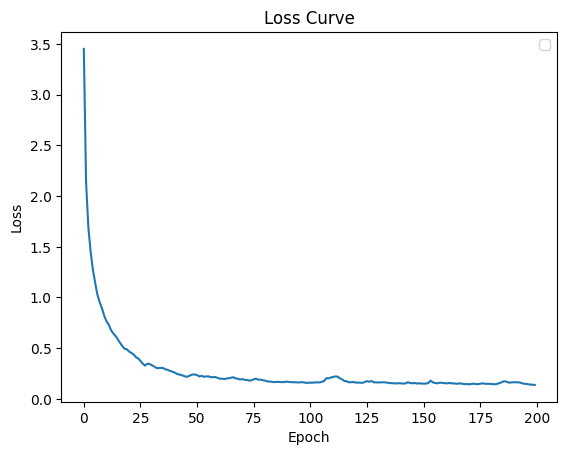

In [ ]:
plt.plot(tabnet_cond_best.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.savefig('tabnet/MainQ2/day_loss_curve.pdf')  # Save the figure
plt.show()

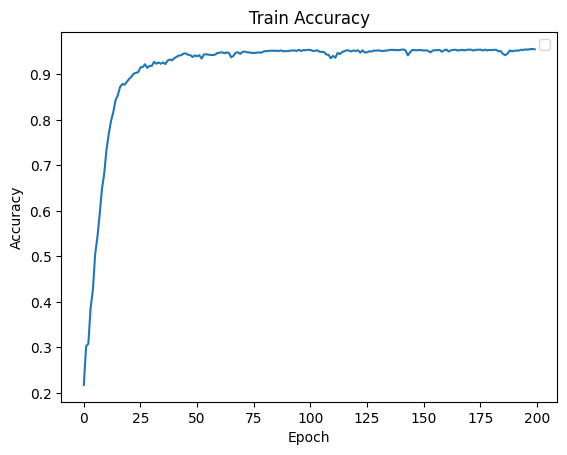

In [ ]:
# plot accuracy
plt.plot(tabnet_cond_best.history['train_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy')
plt.legend()
plt.savefig('tabnet/MainQ2/day_train_accuracy.pdf')  # Save the figure
plt.show()

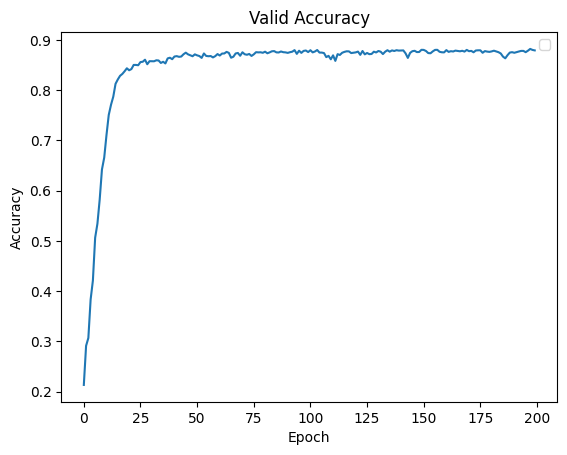

In [ ]:
plt.plot(tabnet_cond_best.history['valid_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Valid Accuracy')
plt.legend()
plt.savefig('tabnet/MainQ2/day_valid_accuracy.pdf')  # Save the figure
plt.show()

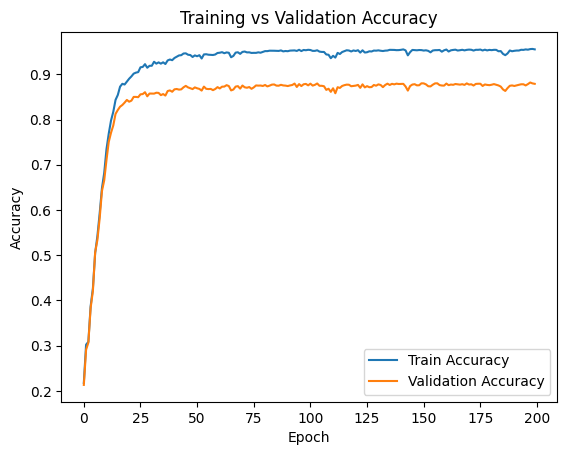

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(tabnet_cond_best.history['train_accuracy'], label='Train Accuracy')
plt.plot(tabnet_cond_best.history['valid_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.savefig('tabnet/MainQ2/day_training_vs_validation_accuracy.pdf')  # Save the figure
plt.show()

In [ ]:
# US
print(f"Best Valid score with Best Parameters: {tabnet_cond_best.best_cost}")
# Evaluate the best model
y_pred_best = tabnet_cond_best.predict(X_test_cond.values)
test_acc = accuracy_score(y_test_cond, y_pred_best)
print(f"Test Accuracy with Best Parameters: {test_acc}")

Best Valid score with Best Parameters: 0.8818324813212741
Test Accuracy with Best Parameters: 0.8812659720857087


In [ ]:
# Save bet treatment model
saved_filename = tabnet_cond_best.save_model('Day_Imbalanced_condition_tabnet_test_model')
# define new model and load save parameters
#tabnet_treat_best = TabNetClassifier()
#tabnet_treat_best.load_model('Imbalanced_condition_tabnet_test_model.zip')

Successfully saved model at Day_Imbalanced_condition_tabnet_test_model.zip


Shape of y_test_bin_adjusted: (5087, 87)
Shape of y_proba_adjusted: (5087, 87)


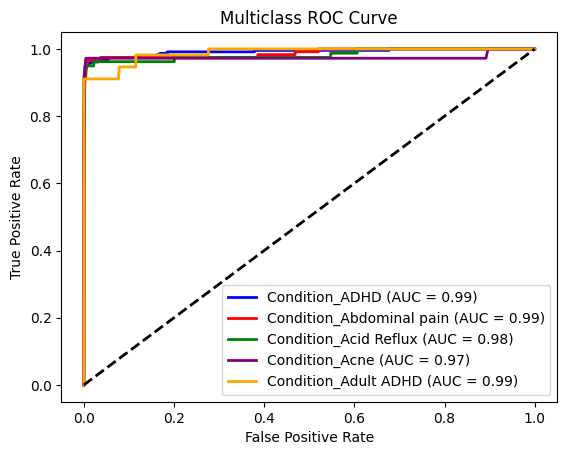

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities
y_proba = tabnet_cond_best.predict_proba(X_test_cond.values)

# Convert true labels to a binary one-vs-rest format
from sklearn.preprocessing import label_binarize
n_classes = len(label_encoder_condition.classes_)  # Number of classes
y_test_bin = label_binarize(y_test_cond, classes=np.arange(n_classes))

# Get the classes present in y_test_cond
unique_classes_in_test = np.unique(y_test_cond)

# Adjust y_test_bin to only include present classes
y_test_bin_adjusted = label_binarize(y_test_cond, classes=unique_classes_in_test)

# Adjust y_proba to match the present classes
y_proba_adjusted = y_proba[:, :len(unique_classes_in_test)]  # Slice to match unique classes

# Verify dimensions
print("Shape of y_test_bin_adjusted:", y_test_bin_adjusted.shape)
print("Shape of y_proba_adjusted:", y_proba_adjusted.shape)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()


# Get the actual class names using the label encoder
class_names = label_encoder_condition.inverse_transform(np.arange(len(unique_classes_in_test)))

for i, class_name in enumerate(class_names):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_adjusted[:, i], y_proba_adjusted[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green', 'purple', 'orange']  # Add more colors if needed
for i, (class_name, color) in enumerate(zip(class_names, colors)):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_name} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.savefig('tabnet/MainQ2/day_Multiclass_ROC_Curve.pdf')  # Save the figure
plt.show()
